In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.decomposition import PCA
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [8]:
df = pd.read_csv(r'C:\Users\alex1\Desktop\ACDC\Extracted_radiomics\Results_full_clinical.csv')
df.head()

,diagnostics_Versions_PyRadiomics_LV_ED,diagnostics_Versions_Numpy_LV_ED,diagnostics_Versions_SimpleITK_LV_ED,diagnostics_Versions_PyWavelet_LV_ED,diagnostics_Versions_Python_LV_ED,diagnostics_Configuration_Settings_LV_ED,diagnostics_Configuration_EnabledImageTypes_LV_ED,diagnostics_Image-original_Hash_LV_ED,diagnostics_Image-original_Dimensionality_LV_ED,diagnostics_Image-original_Spacing_LV_ED,...,original_glszm_ZonePercentage_MYO_ED,original_glszm_ZoneVariance_MYO_ED,original_ngtdm_Busyness_MYO_ED,original_ngtdm_Coarseness_MYO_ED,original_ngtdm_Complexity_MYO_ED,original_ngtdm_Contrast_MYO_ED,original_ngtdm_Strength_MYO_ED,height,weight,class
0,v3.0,1.16.5,1.2.4,1.0.0,3.7.4,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},3918f0729b5ccb4905400dcb225e0b51ca57235e,3D,"(1.0, 1.0, 1.0)",...,0.059750,29079.791169,24.021586,0.001155,21.582022,0.012887,0.060004,184.0,95.0,DCM
1,v3.0,1.16.5,1.2.4,1.0.0,3.7.4,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},4ffa684fe9abc8dda5f56e90edda8b7fe1382520,3D,"(1.0, 1.0, 1.0)",...,0.042642,56252.340477,24.681346,0.000922,17.484198,0.009942,0.045036,160.0,70.0,DCM
2,v3.0,1.16.5,1.2.4,1.0.0,3.7.4,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},2c4a63450c4a706e97b2d76e155bff4b87e32d47,3D,"(1.0, 1.0, 1.0)",...,0.043268,95950.463979,23.364467,0.001166,10.371746,0.004206,0.050217,165.0,77.0,DCM
3,v3.0,1.16.5,1.2.4,1.0.0,3.7.4,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},c954422fd7665e338b42a5b6d9c6aaede2a783de,3D,"(1.0, 1.0, 1.0)",...,0.172881,3315.187123,4.208894,0.000890,311.808816,0.026590,0.282488,159.0,46.0,DCM
4,v3.0,1.16.5,1.2.4,1.0.0,3.7.4,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},eb9b30e31903147d0587ea887821c46655629328,3D,"(1.0, 1.0, 1.0)",...,0.056658,37145.128739,15.526879,0.000920,36.894365,0.010873,0.083935,165.0,77.0,DCM


In [9]:
df.describe()

,diagnostics_Image-original_Mean_LV_ED,diagnostics_Image-original_Minimum_LV_ED,diagnostics_Image-original_Maximum_LV_ED,diagnostics_Mask-original_VoxelNum_LV_ED,diagnostics_Mask-original_VolumeNum_LV_ED,original_shape_Elongation_LV_ED,original_shape_Flatness_LV_ED,original_shape_LeastAxisLength_LV_ED,original_shape_MajorAxisLength_LV_ED,original_shape_Maximum2DDiameterColumn_LV_ED,...,original_glszm_ZoneEntropy_MYO_ED,original_glszm_ZonePercentage_MYO_ED,original_glszm_ZoneVariance_MYO_ED,original_ngtdm_Busyness_MYO_ED,original_ngtdm_Coarseness_MYO_ED,original_ngtdm_Complexity_MYO_ED,original_ngtdm_Contrast_MYO_ED,original_ngtdm_Strength_MYO_ED,height,weight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,67.837219,8.450000,577.040000,7886.450000,1.030000,0.559329,0.116327,7.027303,61.907922,48.331549,...,4.319037,0.044955,1.220578e+05,42.692607,0.001674,35.319626,0.014939,0.068902,170.840000,74.960000
std,35.176195,9.380159,720.550518,4345.642344,0.171447,0.086312,0.044954,2.421983,11.241951,11.736217,...,0.678586,0.046538,2.244571e+05,37.987578,0.000822,158.883279,0.009629,0.182279,9.710683,16.632037
min,42.639798,0.000000,184.000000,2016.000000,1.000000,0.374291,0.046936,3.365035,41.204891,21.095023,...,2.663865,0.005826,3.826256e+01,0.628486,0.000417,0.671764,0.002928,0.003404,140.000000,35.000000
25%,51.897369,0.000000,255.000000,5251.250000,1.000000,0.496768,0.090354,5.547015,55.335903,41.403462,...,3.824551,0.022241,3.085875e+04,19.583868,0.001151,2.308904,0.008244,0.011560,165.000000,62.750000
50%,56.203523,5.500000,255.000000,6800.500000,1.000000,0.562325,0.105700,6.572642,61.729255,45.951022,...,4.251377,0.031110,7.121595e+04,32.779079,0.001508,5.059602,0.012735,0.024761,171.500000,75.000000
75%,65.430700,15.000000,546.000000,9344.000000,1.000000,0.603154,0.123933,7.438589,66.349397,53.235327,...,4.748395,0.045895,1.443390e+05,56.187522,0.002045,16.465777,0.018431,0.060950,178.000000,85.000000
max,241.590712,32.000000,4025.000000,26474.000000,2.000000,0.791923,0.286265,16.244584,131.551946,90.138782,...,6.208841,0.352640,2.061308e+06,255.583372,0.004543,1546.637657,0.054731,1.716227,192.000000,123.000000


In [ ]:
# seg_path= r'C:\Users\alex1\Documents\Fundamentals of Data Science @UB\PFM\Datasets\ACDC Dataset\training_acdc\training'

# mylines = []
# for file in os.walk(seg_path):
#     cont = 0
#     if file[0] == seg_path:
#         continue
#     #print(os.path.join(file[0], file[2][0]))
#     search_string = os.path.join(seg_path, os.path.basename(file[0]),  os.path.basename(file[0]) + ".nii.gz")
# #     print(file[1])
# #     print(os.path.basename(file[0]))
# #     #print(search_string)
# #     print(file[2][0])
# #     print(file[2][4],  "\n")
    
    
#     with open ((os.path.join(file[0], file[2][0]))) as myfile:
#         for myline in myfile:
#             cont += 1
#             if cont==3:
#                 classs = myline.lstrip("Group: ")
#                 classs = classs.rstrip("\n")
#                 mylines.append(classs)
# #             print(cont)

In [11]:
df = df.loc[:,~ df.columns.str.startswith('diagnostics')]

In [12]:
df.head()

,original_shape_Elongation_LV_ED,original_shape_Flatness_LV_ED,original_shape_LeastAxisLength_LV_ED,original_shape_MajorAxisLength_LV_ED,original_shape_Maximum2DDiameterColumn_LV_ED,original_shape_Maximum2DDiameterRow_LV_ED,original_shape_Maximum2DDiameterSlice_LV_ED,original_shape_Maximum3DDiameter_LV_ED,original_shape_MeshVolume_LV_ED,original_shape_MinorAxisLength_LV_ED,...,original_glszm_ZonePercentage_MYO_ED,original_glszm_ZoneVariance_MYO_ED,original_ngtdm_Busyness_MYO_ED,original_ngtdm_Coarseness_MYO_ED,original_ngtdm_Complexity_MYO_ED,original_ngtdm_Contrast_MYO_ED,original_ngtdm_Strength_MYO_ED,height,weight,class
0,0.560917,0.110560,6.592758,59.630582,45.398238,64.776539,64.007812,65.199693,5674.000000,33.447817,...,0.059750,29079.791169,24.021586,0.001155,21.582022,0.012887,0.060004,184.0,95.0,DCM
1,0.454960,0.088323,5.730218,64.877933,40.311289,64.140471,61.000000,67.446275,5015.833333,29.516875,...,0.042642,56252.340477,24.681346,0.000922,17.484198,0.009942,0.045036,160.0,70.0,DCM
2,0.541682,0.105418,6.711577,63.666027,48.041649,66.843100,59.135438,68.080834,7817.666667,34.486772,...,0.043268,95950.463979,23.364467,0.001166,10.371746,0.004206,0.050217,165.0,77.0,DCM
3,0.487949,0.105906,6.726159,63.510529,44.407207,66.370174,66.007575,66.475559,5629.166667,30.989912,...,0.172881,3315.187123,4.208894,0.000890,311.808816,0.026590,0.282488,159.0,46.0,DCM
4,0.442150,0.095225,7.186765,75.471150,68.066144,77.472576,50.487622,77.472576,8550.083333,33.369563,...,0.056658,37145.128739,15.526879,0.000920,36.894365,0.010873,0.083935,165.0,77.0,DCM


### Class Labels

20 healthy patients $\textbf{NOR}$

20 patients with previous myocardial infarction; $\textbf{MINF}$

20 patients with dilated cardiomyopathy; $\textbf{DCM}$

20 patients with an hypertrophic cardiomyopathy; $\textbf{HCM}$

20 patients with abnormal right ventricle; $\textbf{RV}$

In [13]:
rp.summary_cont(df['original_shape_MinorAxisLength_RV_ED'].groupby(df['class']))

,N,Mean,SD,SE,95% Conf.,Interval
class,,,,,,
DCM,20,42.743751,4.091559,0.914901,40.903961,44.583540
HCM,20,31.378553,7.433006,1.662071,28.036265,34.720840
MINF,20,37.138880,8.906179,1.991482,33.134173,41.143586
NOR,20,31.270275,3.827634,0.855885,29.549161,32.991389
RV,20,28.939005,4.880834,1.091388,26.744314,31.133695


Checking the F-statistic and p-value for all the classes 

In [14]:
s, p = stats.f_oneway(df['original_shape_Flatness_LV_ED'][df['class'] == 'DCM'], 
                df['original_shape_Flatness_LV_ED'][df['class'] == 'HCM'],
               df['original_shape_Flatness_LV_ED'][df['class'] == 'MINF'],
               df['original_shape_Flatness_LV_ED'][df['class'] == 'NOR'],
               df['original_shape_Flatness_LV_ED'][df['class'] == 'RV'])

Checking for only two classes

In [16]:
f, p = stats.f_oneway(df['original_shape_MinorAxisLength_RV_ED'][df['class'] == 'HCM'], 
               df['original_shape_MinorAxisLength_RV_ED'][df['class'] == 'NOR'])

In [17]:
p

0.9541175143552846

In [18]:
f

0.0033544842484480707

##### Anova Test for all the features

We end up getting a list of the most "significant" features

In [19]:
p_sign = []
features = []
for i in df.columns:
    if df[i].dtype != 'float64':
        continue 
    
    s, p = stats.f_oneway(df[i][df['class'] == 'DCM'], 
                df[i][df['class'] == 'HCM'],
               df[i][df['class'] == 'MINF'],
               df[i][df['class'] == 'NOR'],
               df[i][df['class'] == 'RV'])
    
    if p < 0.05:
        p_sign.append(p)
        features.append(i)
        print(i, "p-value:---------- ", p)
    

original_shape_Elongation_LV_ED p-value:----------  0.009682513264871113
original_shape_Flatness_LV_ED p-value:----------  1.5523224004725813e-05
original_shape_LeastAxisLength_LV_ED p-value:----------  3.720720135114985e-09
original_shape_MeshVolume_LV_ED p-value:----------  1.3530838927091074e-06
original_shape_Sphericity_LV_ED p-value:----------  2.110894136255125e-05
original_shape_SurfaceVolumeRatio_LV_ED p-value:----------  8.909186113422047e-10
original_shape_VoxelVolume_LV_ED p-value:----------  1.4293857478287202e-06
original_firstorder_90Percentile_LV_ED p-value:----------  0.046978171434206614
original_firstorder_Entropy_LV_ED p-value:----------  0.013533056089638625
original_firstorder_InterquartileRange_LV_ED p-value:----------  0.01504749841637649
original_firstorder_MeanAbsoluteDeviation_LV_ED p-value:----------  0.019927154918565566
original_firstorder_Mean_LV_ED p-value:----------  0.04591602073109391
original_firstorder_Median_LV_ED p-value:----------  0.0304541007707

original_glszm_ZoneEntropy_RV_ED p-value:----------  0.0043096264375774105
original_glszm_ZonePercentage_RV_ED p-value:----------  0.009506287089585503
original_ngtdm_Busyness_RV_ED p-value:----------  0.019349964331255055
original_ngtdm_Coarseness_RV_ED p-value:----------  0.00011146560052794187
original_ngtdm_Contrast_RV_ED p-value:----------  4.309705372608871e-05
original_shape_Elongation_MYO_ED p-value:----------  4.757505829187591e-05
original_shape_Flatness_MYO_ED p-value:----------  2.2147932736183662e-05
original_shape_LeastAxisLength_MYO_ED p-value:----------  0.0036349029717067543
original_shape_MajorAxisLength_MYO_ED p-value:----------  1.07339120845278e-06
original_shape_Maximum2DDiameterColumn_MYO_ED p-value:----------  1.5696982405562485e-05
original_shape_Maximum2DDiameterRow_MYO_ED p-value:----------  4.1492132467135604e-05
original_shape_Maximum2DDiameterSlice_MYO_ED p-value:----------  3.714625853905425e-05
original_shape_Maximum3DDiameter_MYO_ED p-value:----------  

In [20]:
df_sig = pd.DataFrame(data = p_sign, index = features)
df_sig.rename(columns= {0:'p-value'}, inplace = True)

In [21]:
df_sig = df_sig.sort_values(by =['p-value'])

We sort the last list by the p-value

https://pythonfordatascience.org/anova-python/

### Post Hoc

Tukey’s HSD

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['original_ngtdm_Coarseness_MYO_ED'], df['class'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0001    0.9 -0.0006 0.0007  False
   DCM   MINF   0.0005 0.1659 -0.0001 0.0012  False
   DCM    NOR   0.0009 0.0025  0.0002 0.0015   True
   DCM     RV   0.0009  0.001  0.0003 0.0016   True
   HCM   MINF   0.0005 0.2523 -0.0002 0.0011  False
   HCM    NOR   0.0008 0.0052  0.0002 0.0015   True
   HCM     RV   0.0009 0.0019  0.0003 0.0015   True
  MINF    NOR   0.0004 0.5505 -0.0003  0.001  False
  MINF     RV   0.0004 0.3732 -0.0002 0.0011  False
   NOR     RV   0.0001    0.9 -0.0006 0.0007  False
---------------------------------------------------


In [24]:
mc = MultiComparison(df['original_shape_MinorAxisLength_RV_ED'], df['class'])
mc_results = mc.tukeyhsd()
a = mc_results.summary()

In [25]:
p_values = mc_results.pvalues

In [26]:
p_values = p_values.tolist()

In [27]:
p_values

[0.001,
 0.03890306631133067,
 0.001,
 0.001,
 0.031350404513040275,
 0.9,
 0.6957597119042943,
 0.026878033712283922,
 0.001,
 0.726951445826985]

##### Significant Difference 

In [28]:
box_paris = [("DCM", "HCM"), ("DCM", "MINF"), ("DCM", "NOR"), ("DCM", "RV"), ("HCM", "MINF"), ("HCM", "NOR"),
             ("HCM", "RV"),("MINF", "NOR"), ("MINF", "RV"), ("NOR", "RV")]

### Obtaining statistical difference for every feature

In [30]:
    print("p-value annotation legend: \n",
    "ns: 5.00e-02 < p <= 1.00e+00 \n",
    "*: 1.00e-02 < p <= 5.00e-02 \n",
    "**: 1.00e-03 < p <= 1.00e-02 \n",
    "**: 1.00e-04 < p <= 1.00e-03 \n",
    "****: p <= 1.00e-04 ")

p-value annotation legend: 
 ns: 5.00e-02 < p <= 1.00e+00 
 *: 1.00e-02 < p <= 5.00e-02 
 **: 1.00e-03 < p <= 1.00e-02 
 **: 1.00e-04 < p <= 1.00e-03 
 ****: p <= 1.00e-04 


----------   original_shape_Elongation_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0341 0.6625 -0.0382 0.1064  False
   DCM   MINF   0.0286 0.7802 -0.0436 0.1009  False
   DCM    NOR   0.0839 0.0145  0.0116 0.1562   True
   DCM     RV   0.0745 0.0401  0.0022 0.1467   True
   HCM   MINF  -0.0054    0.9 -0.0777 0.0668  False
   HCM    NOR   0.0498 0.3162 -0.0225 0.1221  False
   HCM     RV   0.0404 0.5265 -0.0319 0.1127  False
  MINF    NOR   0.0552  0.218  -0.017 0.1275  False
  MINF     RV   0.0458 0.4024 -0.0264 0.1181  False
   NOR     RV  -0.0094    0.9 -0.0817 0.0629  False
---------------------------------------------------


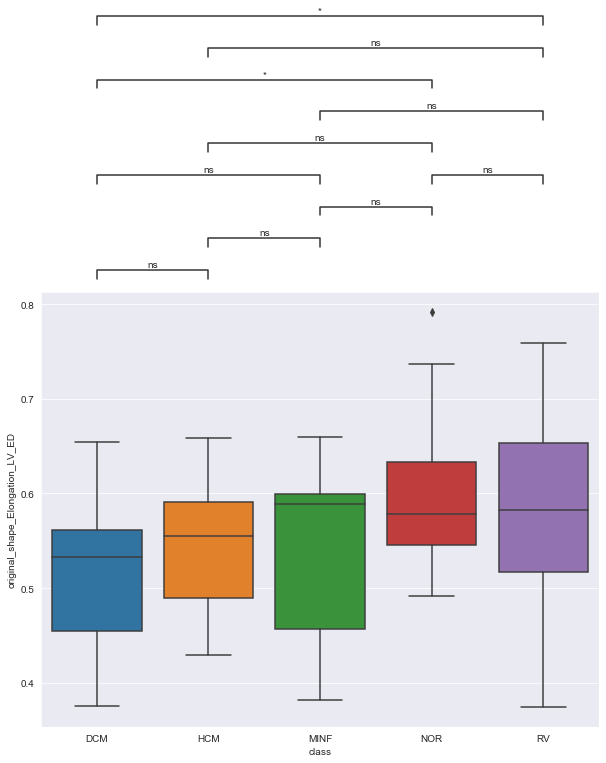

----------   original_shape_Flatness_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0086    0.9 -0.0435 0.0264  False
   DCM   MINF  -0.0073    0.9 -0.0423 0.0276  False
   DCM    NOR   0.0053    0.9 -0.0296 0.0403  False
   DCM     RV   0.0517  0.001  0.0168 0.0867   True
   HCM   MINF   0.0012    0.9 -0.0337 0.0362  False
   HCM    NOR   0.0139 0.7781 -0.0211 0.0489  False
   HCM     RV   0.0603  0.001  0.0254 0.0953   True
  MINF    NOR   0.0127 0.8336 -0.0223 0.0476  False
  MINF     RV   0.0591  0.001  0.0241  0.094   True
   NOR     RV   0.0464 0.0033  0.0115 0.0814   True
---------------------------------------------------


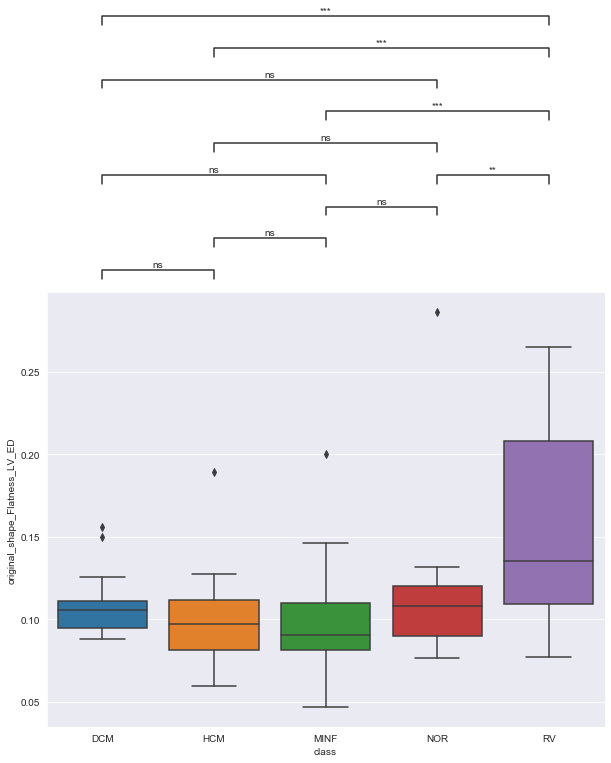

----------   original_shape_LeastAxisLength_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -1.2276 0.2806 -2.9461  0.491  False
   DCM   MINF  -1.2503 0.2631 -2.9688 0.4683  False
   DCM    NOR  -0.6006 0.8531 -2.3191  1.118  False
   DCM     RV   2.7366  0.001   1.018 4.4551   True
   HCM   MINF  -0.0227    0.9 -1.7412 1.6959  False
   HCM    NOR    0.627 0.8291 -1.0916 2.3455  False
   HCM     RV   3.9641  0.001  2.2456 5.6827   True
  MINF    NOR   0.6497 0.8085 -1.0689 2.3682  False
  MINF     RV   3.9868  0.001  2.2683 5.7054   True
   NOR     RV   3.3371  0.001  1.6186 5.0557   True
---------------------------------------------------


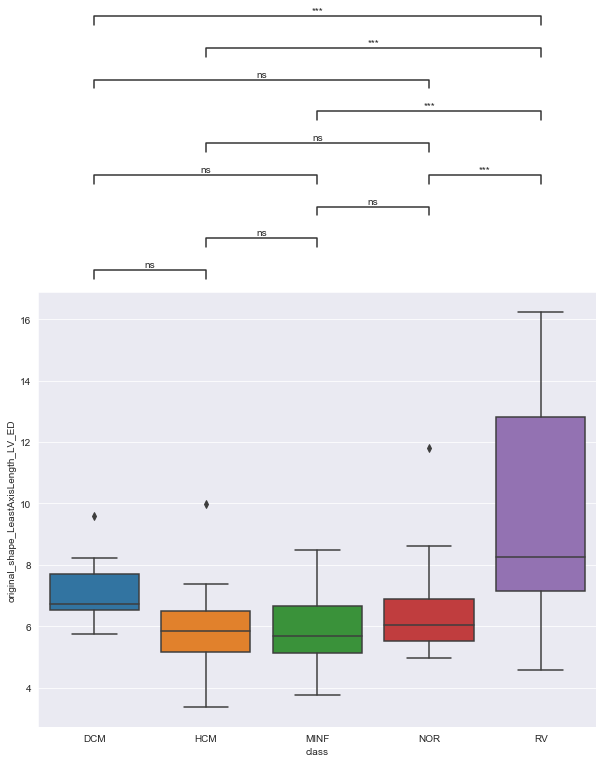

----------   original_shape_MeshVolume_LV_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   DCM    HCM -1748.9604 0.5667 -5030.6272 1532.7064  False
   DCM   MINF  -1451.675 0.7081 -4733.3418 1829.9918  False
   DCM    NOR  -667.0625    0.9 -3948.7293 2614.6043  False
   DCM     RV  4625.3062 0.0015  1343.6394 7906.9731   True
   HCM   MINF   297.2854    0.9 -2984.3814 3578.9522  False
   HCM    NOR  1081.8979  0.884 -2199.7689 4363.5647  False
   HCM     RV  6374.2667  0.001  3092.5998 9655.9335   True
  MINF    NOR   784.6125    0.9 -2497.0543 4066.2793  False
  MINF     RV  6076.9812  0.001  2795.3144 9358.6481   True
   NOR     RV  5292.3688  0.001  2010.7019 8574.0356   True
-----------------------------------------------------------


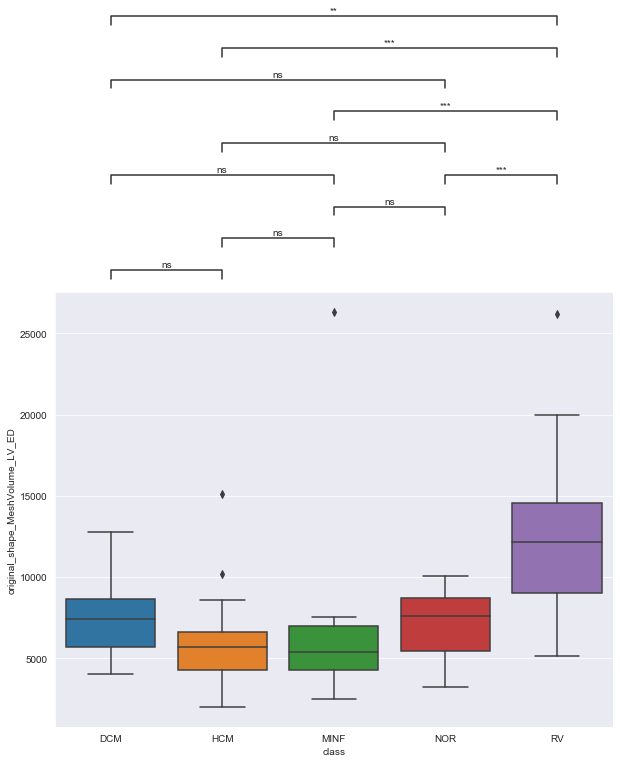

----------   original_shape_Sphericity_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0038    0.9 -0.0417 0.0494  False
   DCM   MINF   0.0097    0.9 -0.0359 0.0552  False
   DCM    NOR   0.0268 0.4782 -0.0187 0.0724  False
   DCM     RV    0.078  0.001  0.0325 0.1236   True
   HCM   MINF   0.0058    0.9 -0.0397 0.0514  False
   HCM    NOR    0.023 0.6103 -0.0225 0.0685  False
   HCM     RV   0.0742  0.001  0.0287 0.1197   True
  MINF    NOR   0.0172 0.8106 -0.0284 0.0627  False
  MINF     RV   0.0684  0.001  0.0228 0.1139   True
   NOR     RV   0.0512 0.0194  0.0057 0.0968   True
---------------------------------------------------


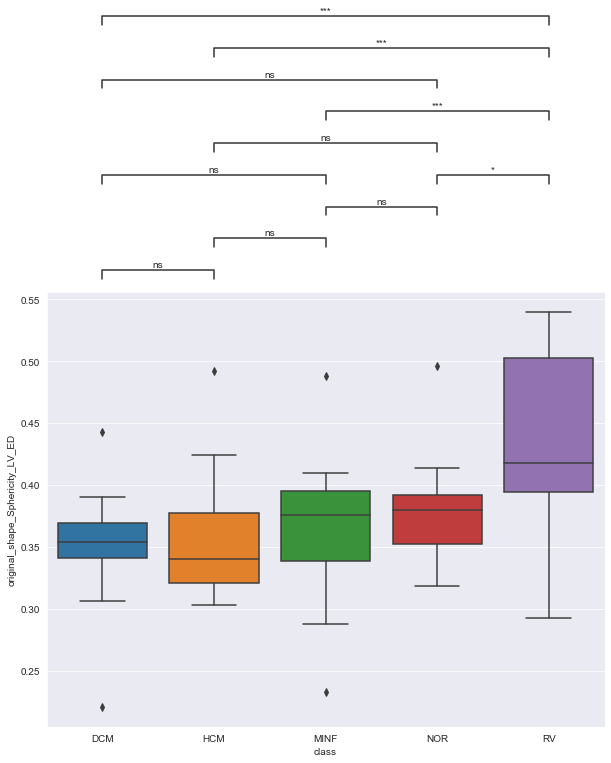

----------   original_shape_SurfaceVolumeRatio_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0726 0.3648 -0.0379  0.1831  False
   DCM   MINF   0.0645  0.486 -0.0459   0.175  False
   DCM    NOR  -0.0347    0.9 -0.1452  0.0758  False
   DCM     RV  -0.2002  0.001 -0.3107 -0.0898   True
   HCM   MINF  -0.0081    0.9 -0.1186  0.1024  False
   HCM    NOR  -0.1073 0.0614 -0.2178  0.0032  False
   HCM     RV  -0.2729  0.001 -0.3833 -0.1624   True
  MINF    NOR  -0.0992 0.0998 -0.2097  0.0113  False
  MINF     RV  -0.2648  0.001 -0.3753 -0.1543   True
   NOR     RV  -0.1656  0.001  -0.276 -0.0551   True
----------------------------------------------------


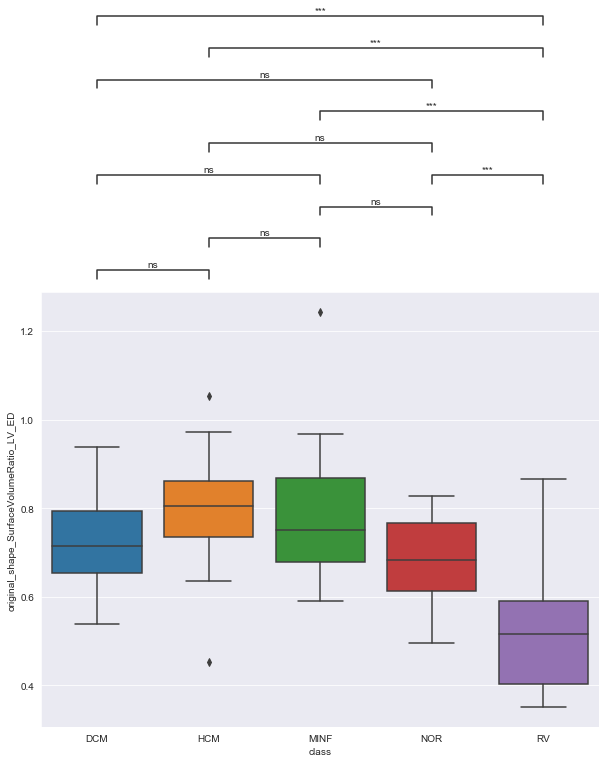

----------   original_shape_VoxelVolume_LV_ED --------- 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
   DCM    HCM -1757.15 0.5653 -5048.5894 1534.2894  False
   DCM   MINF -1456.75 0.7078 -4748.1894 1834.6894  False
   DCM    NOR  -673.85    0.9 -3965.2894 2617.5894  False
   DCM     RV   4624.0 0.0016  1332.5606 7915.4394   True
   HCM   MINF    300.4    0.9 -2991.0394 3591.8394  False
   HCM    NOR   1083.3 0.8848 -2208.1394 4374.7394  False
   HCM     RV  6381.15  0.001  3089.7106 9672.5894   True
  MINF    NOR    782.9    0.9 -2508.5394 4074.3394  False
  MINF     RV  6080.75  0.001  2789.3106 9372.1894   True
   NOR     RV  5297.85  0.001  2006.4106 8589.2894   True
---------------------------------------------------------


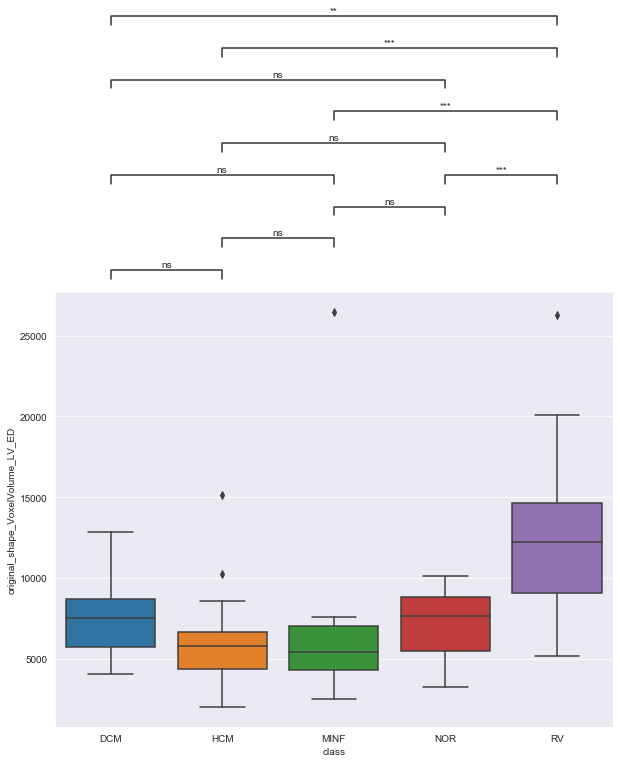

----------   original_firstorder_90Percentile_LV_ED --------- 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   DCM    HCM   33.185 0.8569  -62.4352 128.8052  False
   DCM   MINF   -36.18  0.808 -131.8002  59.4402  False
   DCM    NOR    17.72    0.9  -77.9002 113.3402  False
   DCM     RV  -60.175 0.4103 -155.7952  35.4452  False
   HCM   MINF  -69.365 0.2658 -164.9852  26.2552  False
   HCM    NOR  -15.465    0.9 -111.0852  80.1552  False
   HCM     RV   -93.36 0.0592 -188.9802   2.2602  False
  MINF    NOR     53.9 0.5188  -41.7202 149.5202  False
  MINF     RV  -23.995    0.9 -119.6152  71.6252  False
   NOR     RV  -77.895 0.1655 -173.5152  17.7252  False
-------------------------------------------------------


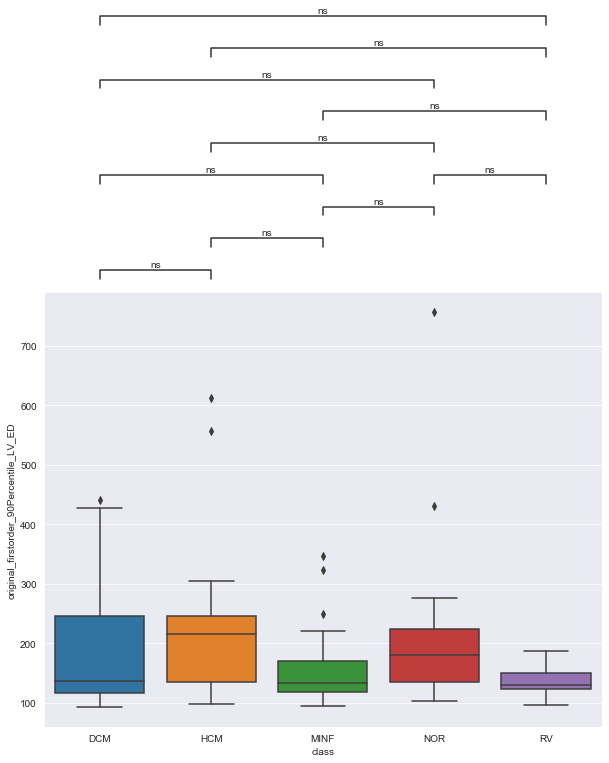

----------   original_firstorder_Entropy_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.3446 0.5222 -0.2691  0.9582  False
   DCM   MINF  -0.2164 0.8481   -0.83  0.3972  False
   DCM    NOR    0.115    0.9 -0.4986  0.7286  False
   DCM     RV  -0.3862 0.4103 -0.9998  0.2275  False
   HCM   MINF   -0.561 0.0898 -1.1746  0.0527  False
   HCM    NOR  -0.2296 0.8147 -0.8432  0.3841  False
   HCM     RV  -0.7307 0.0112 -1.3444 -0.1171   True
  MINF    NOR   0.3314 0.5556 -0.2822  0.9451  False
  MINF     RV  -0.1698    0.9 -0.7834  0.4439  False
   NOR     RV  -0.5012 0.1635 -1.1148  0.1124  False
----------------------------------------------------


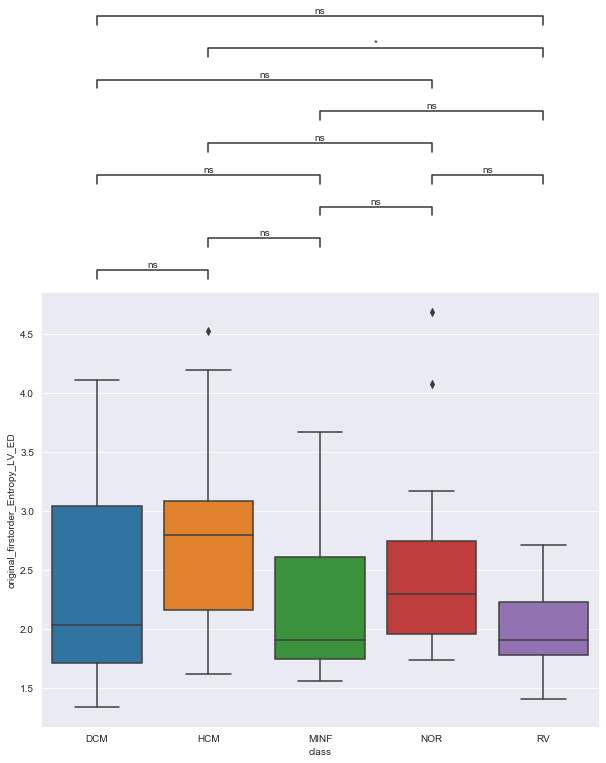

----------   original_firstorder_InterquartileRange_LV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM     15.8  0.578 -14.2529 45.8529  False
   DCM   MINF   -9.225    0.9 -39.2779 20.8279  False
   DCM    NOR   1.4625    0.9 -28.5904 31.5154  False
   DCM     RV -21.4375  0.282 -51.4904  8.6154  False
   HCM   MINF  -25.025  0.149 -55.0779  5.0279  False
   HCM    NOR -14.3375 0.6539 -44.3904 15.7154  False
   HCM     RV -37.2375 0.0074 -67.2904 -7.1846   True
  MINF    NOR  10.6875 0.8435 -19.3654 40.7404  False
  MINF     RV -12.2125 0.7643 -42.2654 17.8404  False
   NOR     RV    -22.9 0.2207 -52.9529  7.1529  False
-----------------------------------------------------


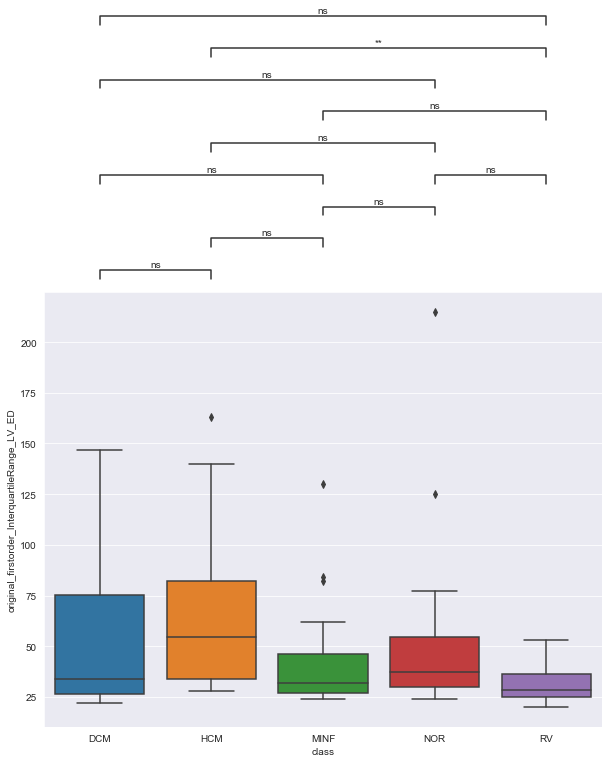

----------   original_firstorder_MeanAbsoluteDeviation_LV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM   9.7841 0.5813   -8.901 28.4693  False
   DCM   MINF  -6.0964 0.8893 -24.7815 12.5888  False
   DCM    NOR   2.8314    0.9 -15.8538 21.5166  False
   DCM     RV -11.9309 0.3951 -30.6161  6.7542  False
   HCM   MINF -15.8805 0.1343 -34.5657  2.8047  False
   HCM    NOR  -6.9527 0.8178 -25.6379 11.7324  False
   HCM     RV -21.7151 0.0143 -40.4002 -3.0299   True
  MINF    NOR   8.9278 0.6528  -9.7574 27.6129  False
  MINF     RV  -5.8346    0.9 -24.5197 12.8506  False
   NOR     RV -14.7623 0.1897 -33.4475  3.9228  False
-----------------------------------------------------


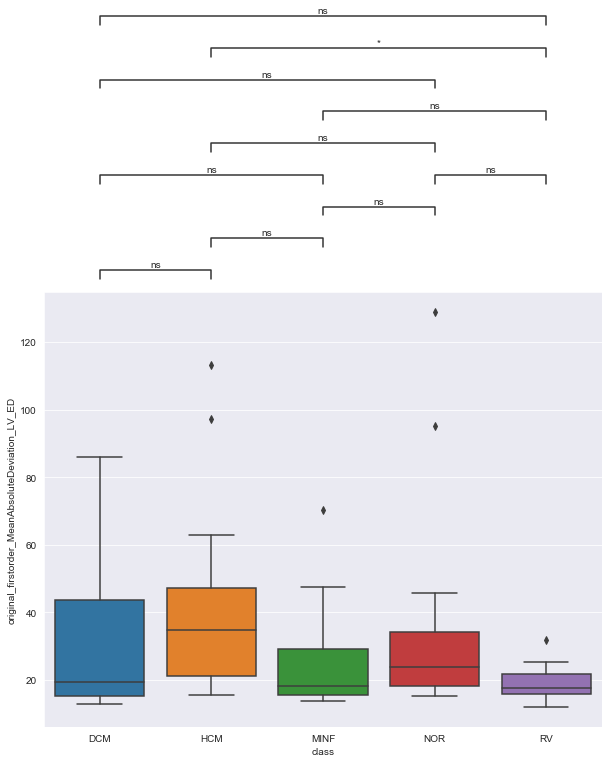

----------   original_firstorder_Mean_LV_ED --------- 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   DCM    HCM  21.4704 0.8955  -45.1417  88.0825  False
   DCM   MINF -24.8532 0.8162  -91.4653  41.7589  False
   DCM    NOR  14.0612    0.9  -52.5508  80.6733  False
   DCM     RV -42.7217 0.3904 -109.3338  23.8903  False
   HCM   MINF -46.3236 0.3069 -112.9357  20.2885  False
   HCM    NOR  -7.4092    0.9  -74.0212  59.2029  False
   HCM     RV -64.1921 0.0647 -130.8042   2.4199  False
  MINF    NOR  38.9144  0.486  -27.6976 105.5265  False
  MINF     RV -17.8685    0.9  -84.4806  48.7435  False
   NOR     RV  -56.783 0.1323 -123.3951   9.8291  False
-------------------------------------------------------


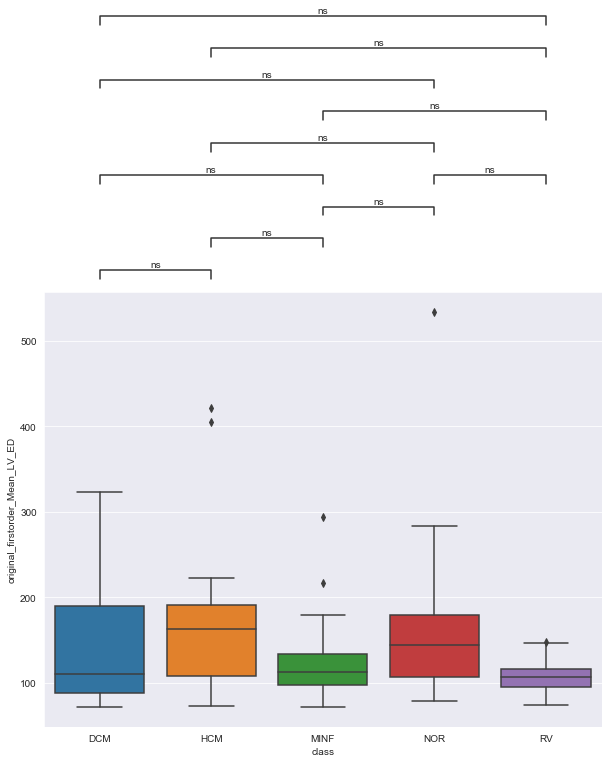

----------   original_firstorder_Median_LV_ED --------- 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   DCM    HCM    26.05  0.784  -40.1133  92.2133  False
   DCM   MINF    -23.2 0.8513  -89.3633  42.9633  False
   DCM    NOR     13.0    0.9  -53.1633  79.1633  False
   DCM     RV    -44.0 0.3523 -110.1633  22.1633  False
   HCM   MINF   -49.25 0.2416 -115.4133  16.9133  False
   HCM    NOR   -13.05    0.9  -79.2133  53.1133  False
   HCM     RV   -70.05 0.0324 -136.2133  -3.8867   True
  MINF    NOR     36.2 0.5446  -29.9633 102.3633  False
  MINF     RV    -20.8    0.9  -86.9633  45.3633  False
   NOR     RV    -57.0 0.1252 -123.1633   9.1633  False
-------------------------------------------------------


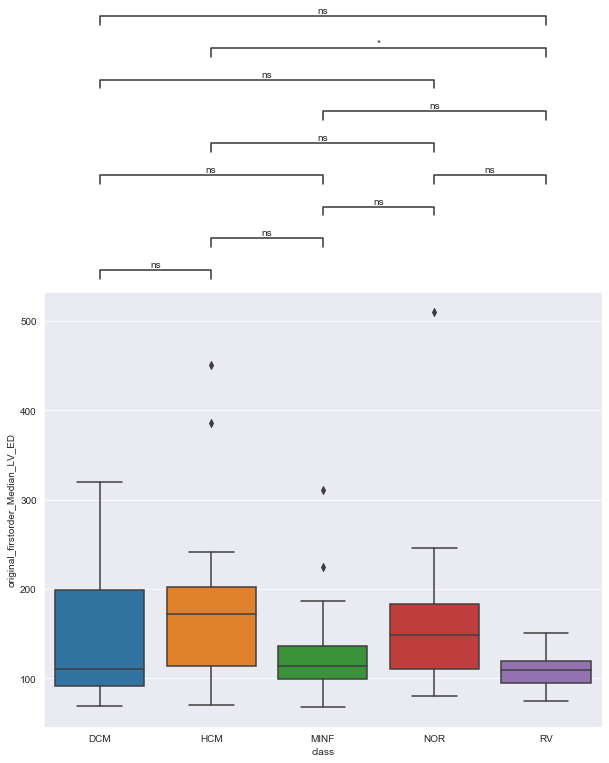

----------   original_firstorder_RobustMeanAbsoluteDeviation_LV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM   7.1202 0.5239  -5.5851 19.8256  False
   DCM   MINF  -3.8471    0.9 -16.5525  8.8583  False
   DCM    NOR   0.9516    0.9 -11.7537  13.657  False
   DCM     RV  -8.7825 0.3128 -21.4879  3.9228  False
   HCM   MINF -10.9673 0.1244 -23.6727   1.738  False
   HCM    NOR  -6.1686 0.6408  -18.874  6.5368  False
   HCM     RV -15.9028 0.0066 -28.6081 -3.1974   True
  MINF    NOR   4.7987  0.809  -7.9066 17.5041  False
  MINF     RV  -4.9354 0.7923 -17.6408    7.77  False
   NOR     RV  -9.7342 0.2159 -22.4395  2.9712  False
-----------------------------------------------------


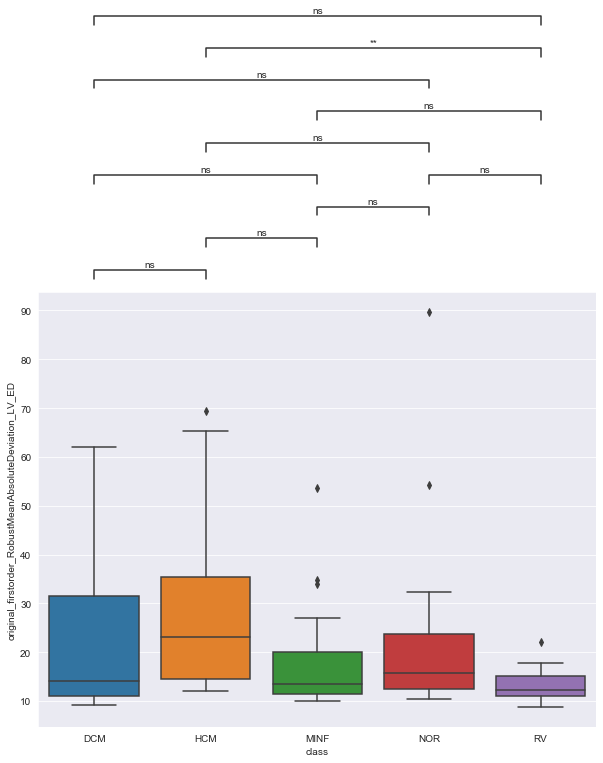

----------   original_firstorder_RootMeanSquared_LV_ED --------- 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   DCM    HCM  23.8311 0.8709  -46.6573  94.3194  False
   DCM   MINF -26.0709 0.8213  -96.5593  44.4175  False
   DCM    NOR   15.071    0.9  -55.4173  85.5594  False
   DCM     RV -45.0444 0.3942 -115.5328   25.444  False
   HCM   MINF  -49.902 0.2894 -120.3903  20.5864  False
   HCM    NOR  -8.7601    0.9  -79.2484  61.7283  False
   HCM     RV -68.8755 0.0589 -139.3638   1.6129  False
  MINF    NOR  41.1419 0.4868  -29.3465 111.6303  False
  MINF     RV -18.9735    0.9  -89.4619  51.5149  False
   NOR     RV -60.1154  0.132 -130.6038   10.373  False
-------------------------------------------------------


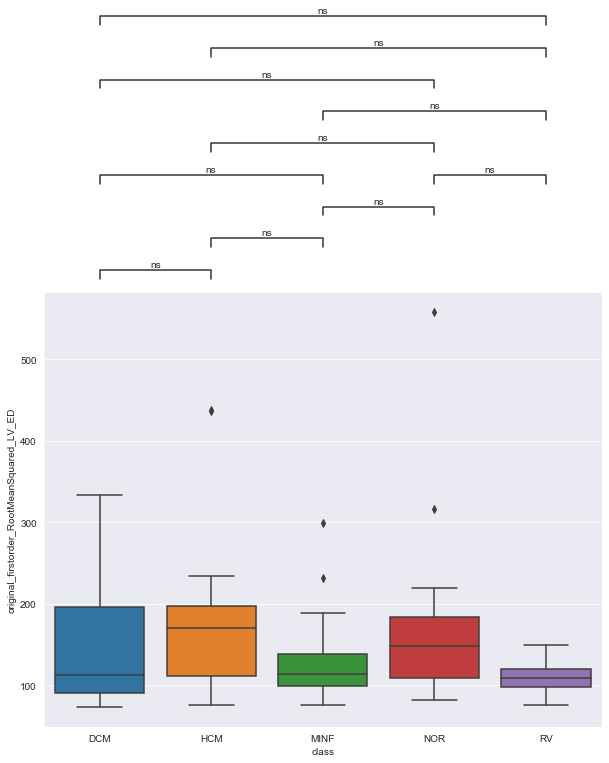

----------   original_firstorder_Uniformity_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0556 0.3502 -0.1391 0.0279  False
   DCM   MINF   0.0191    0.9 -0.0644 0.1026  False
   DCM    NOR  -0.0191    0.9 -0.1026 0.0644  False
   DCM     RV   0.0478 0.5044 -0.0357 0.1313  False
   HCM   MINF   0.0747  0.102 -0.0088 0.1582  False
   HCM    NOR   0.0366 0.7147 -0.0469 0.1201  False
   HCM     RV   0.1035 0.0074    0.02  0.187   True
  MINF    NOR  -0.0381  0.686 -0.1216 0.0454  False
  MINF     RV   0.0288 0.8607 -0.0547 0.1123  False
   NOR     RV   0.0669 0.1784 -0.0166 0.1504  False
---------------------------------------------------


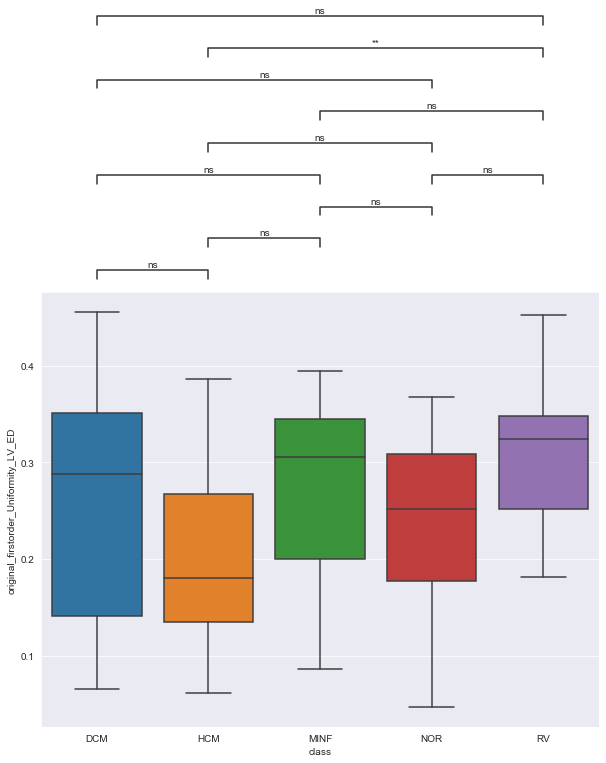

----------   original_glcm_Contrast_LV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM   3.2061 0.3722  -1.7074  8.1196  False
   DCM   MINF  -0.9678    0.9  -5.8814  3.9457  False
   DCM    NOR   0.6236    0.9  -4.2899  5.5371  False
   DCM     RV  -2.0051 0.7616  -6.9186  2.9085  False
   HCM   MINF   -4.174 0.1347  -9.0875  0.7395  False
   HCM    NOR  -2.5826 0.5782  -7.4961  2.3309  False
   HCM     RV  -5.2112  0.032 -10.1247 -0.2977   True
  MINF    NOR   1.5914  0.893  -3.3221  6.5049  False
  MINF     RV  -1.0372    0.9  -5.9507  3.8763  False
   NOR     RV  -2.6286 0.5636  -7.5421  2.2849  False
-----------------------------------------------------


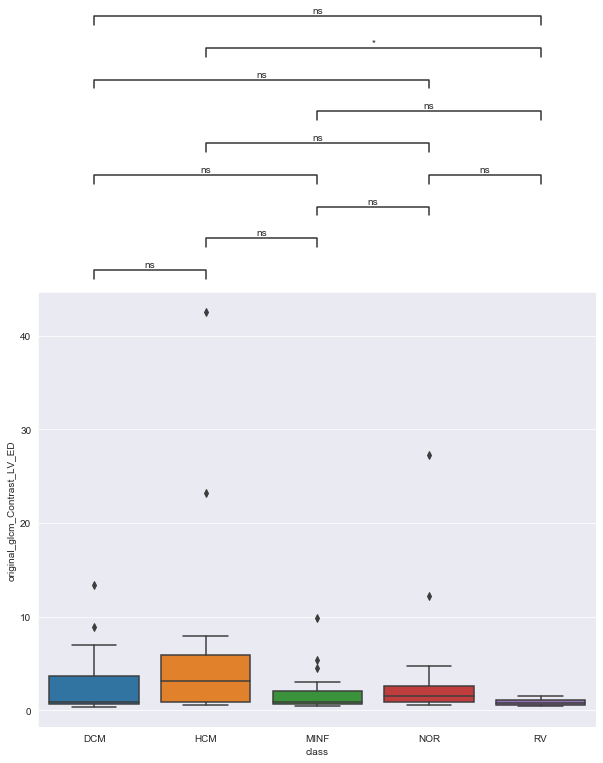

----------   original_glcm_DifferenceAverage_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.4111 0.3343 -0.1965  1.0187  False
   DCM   MINF  -0.1466    0.9 -0.7541   0.461  False
   DCM    NOR   0.0632    0.9 -0.5444  0.6708  False
   DCM     RV   -0.402 0.3576 -1.0096  0.2056  False
   HCM   MINF  -0.5577 0.0877 -1.1652  0.0499  False
   HCM    NOR  -0.3479 0.5048 -0.9555  0.2597  False
   HCM     RV  -0.8131  0.003 -1.4207 -0.2056   True
  MINF    NOR   0.2097 0.8597 -0.3978  0.8173  False
  MINF     RV  -0.2555 0.7423 -0.8631  0.3521  False
   NOR     RV  -0.4652 0.2164 -1.0728  0.1424  False
----------------------------------------------------


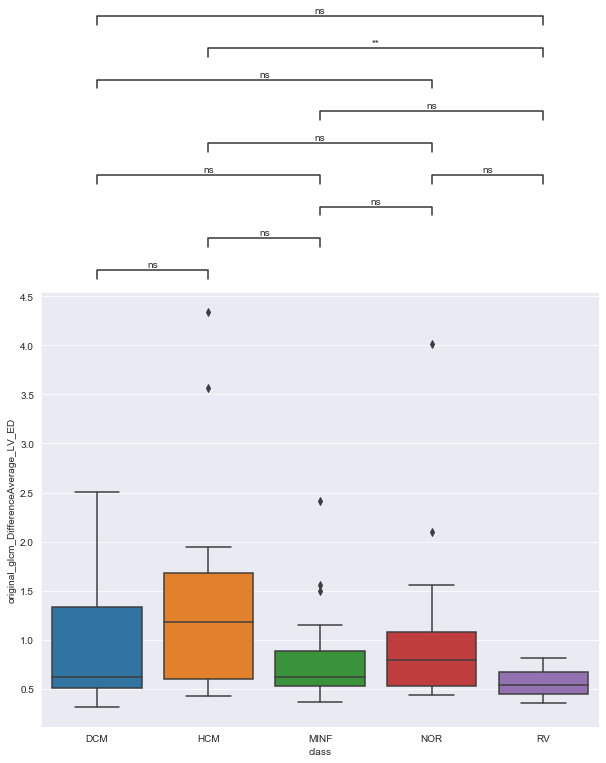

----------   original_glcm_DifferenceEntropy_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.3129 0.3154 -0.1409  0.7667  False
   DCM   MINF  -0.1469 0.8934 -0.6007   0.307  False
   DCM    NOR   0.0679    0.9  -0.386  0.5217  False
   DCM     RV  -0.3419 0.2309 -0.7957  0.1119  False
   HCM   MINF  -0.4597 0.0455 -0.9136 -0.0059   True
   HCM    NOR   -0.245 0.5559 -0.6988  0.2088  False
   HCM     RV  -0.6548 0.0011 -1.1086 -0.2009   True
  MINF    NOR   0.2147 0.6601 -0.2391  0.6685  False
  MINF     RV   -0.195 0.7278 -0.6488  0.2588  False
   NOR     RV  -0.4097 0.0968 -0.8636  0.0441  False
----------------------------------------------------


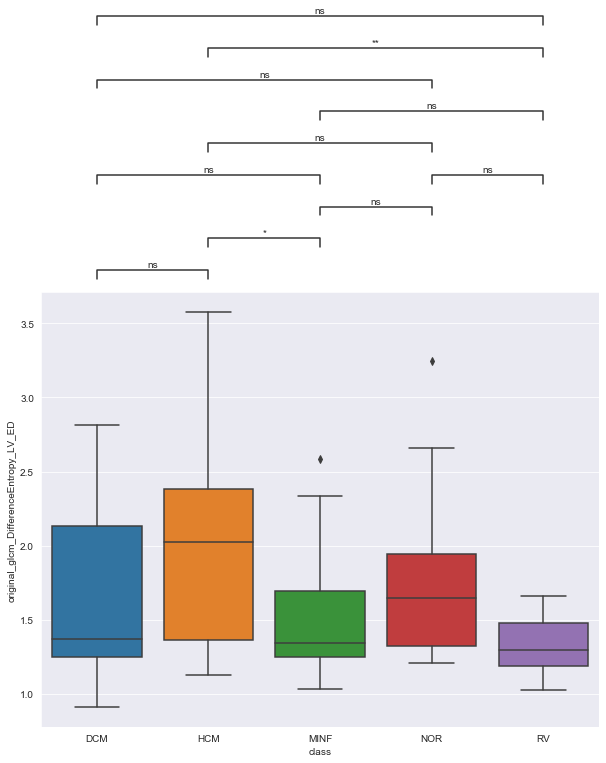

----------   original_glcm_DifferenceVariance_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   1.4471 0.3812 -0.7895  3.6837  False
   DCM   MINF  -0.5471    0.9 -2.7837  1.6895  False
   DCM    NOR   0.1758    0.9 -2.0608  2.4124  False
   DCM     RV  -0.9217 0.7553 -3.1583  1.3148  False
   HCM   MINF  -1.9942  0.104 -4.2308  0.2424  False
   HCM    NOR  -1.2713 0.5114 -3.5079  0.9653  False
   HCM     RV  -2.3688 0.0323 -4.6054 -0.1322   True
  MINF    NOR   0.7229 0.8941 -1.5137  2.9595  False
  MINF     RV  -0.3746    0.9 -2.6112   1.862  False
   NOR     RV  -1.0975 0.6327 -3.3341  1.1391  False
----------------------------------------------------


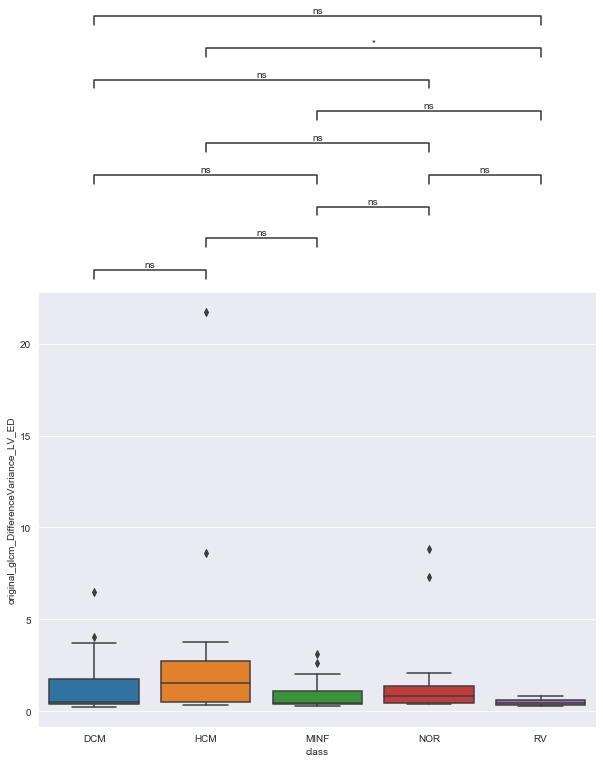

----------   original_glcm_Id_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   -0.061 0.3672  -0.154  0.032  False
   DCM   MINF   0.0211    0.9  -0.072 0.1141  False
   DCM    NOR  -0.0074    0.9 -0.1004 0.0856  False
   DCM     RV   0.0801 0.1259  -0.013 0.1731  False
   HCM   MINF   0.0821 0.1106  -0.011 0.1751  False
   HCM    NOR   0.0536 0.4997 -0.0395 0.1466  False
   HCM     RV    0.141  0.001   0.048 0.2341   True
  MINF    NOR  -0.0285    0.9 -0.1215 0.0645  False
  MINF     RV    0.059 0.4025  -0.034  0.152  False
   NOR     RV   0.0875 0.0759 -0.0056 0.1805  False
---------------------------------------------------


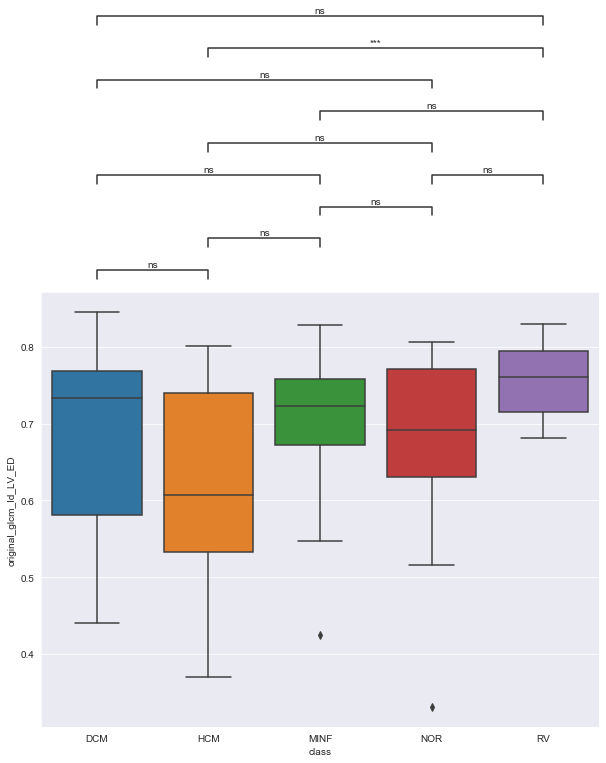

----------   original_glcm_Idm_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0707 0.3902 -0.1809 0.0395  False
   DCM   MINF   0.0261    0.9 -0.0841 0.1363  False
   DCM    NOR  -0.0083    0.9 -0.1185  0.102  False
   DCM     RV   0.0949 0.1257 -0.0153 0.2051  False
   HCM   MINF   0.0968 0.1132 -0.0134  0.207  False
   HCM    NOR   0.0624 0.5143 -0.0478 0.1727  False
   HCM     RV   0.1656  0.001  0.0554 0.2758   True
  MINF    NOR  -0.0344    0.9 -0.1446 0.0758  False
  MINF     RV   0.0688 0.4194 -0.0415  0.179  False
   NOR     RV   0.1031 0.0782 -0.0071 0.2134  False
---------------------------------------------------


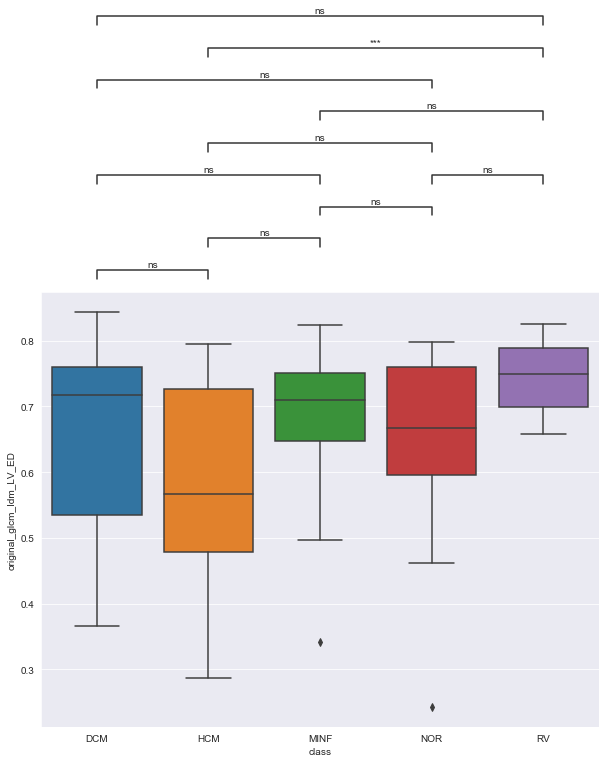

----------   original_glcm_Idmn_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.0067 0.0154 -0.0126 -0.0009   True
   DCM   MINF   -0.003 0.5995 -0.0088  0.0029  False
   DCM    NOR    0.002 0.8757 -0.0039  0.0078  False
   DCM     RV   0.0032 0.5557 -0.0027   0.009  False
   HCM   MINF   0.0037 0.3913 -0.0021  0.0096  False
   HCM    NOR   0.0087  0.001  0.0029  0.0145   True
   HCM     RV   0.0099  0.001   0.004  0.0157   True
  MINF    NOR    0.005 0.1368 -0.0009  0.0108  False
  MINF     RV   0.0062 0.0341  0.0003   0.012   True
   NOR     RV   0.0012    0.9 -0.0046   0.007  False
----------------------------------------------------


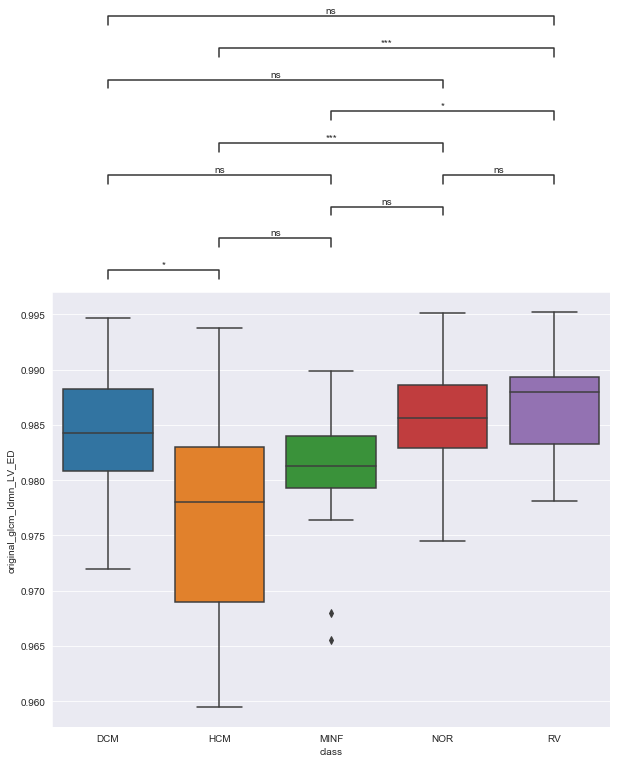

----------   original_glcm_Idn_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.0161 0.0114 -0.0297 -0.0026   True
   DCM   MINF  -0.0079 0.4877 -0.0214  0.0056  False
   DCM    NOR   0.0026    0.9 -0.0109  0.0162  False
   DCM     RV   0.0091  0.342 -0.0044  0.0226  False
   HCM   MINF   0.0082 0.4488 -0.0053  0.0218  False
   HCM    NOR   0.0187  0.002  0.0052  0.0323   True
   HCM     RV   0.0252  0.001  0.0117  0.0388   True
  MINF    NOR   0.0105 0.2049  -0.003  0.0241  False
  MINF     RV    0.017 0.0065  0.0035  0.0305   True
   NOR     RV   0.0065 0.6512 -0.0071    0.02  False
----------------------------------------------------


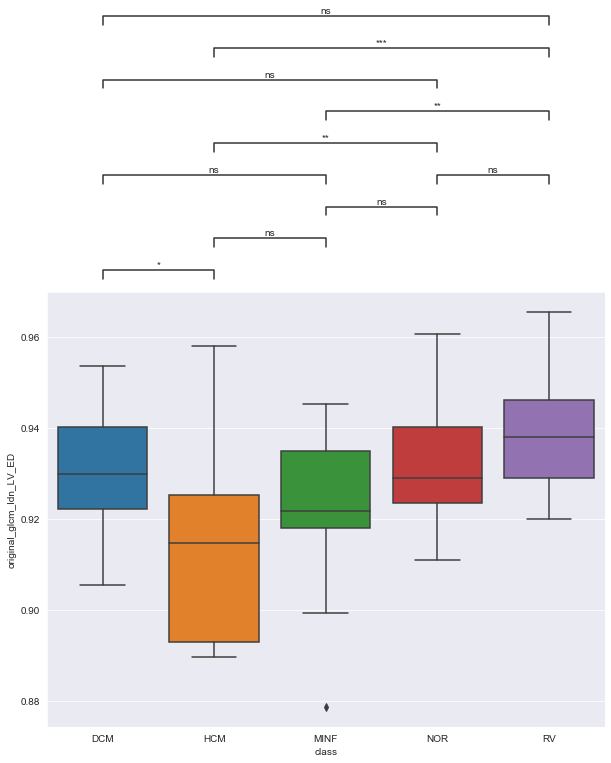

----------   original_glcm_Imc1_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0057    0.9 -0.0354 0.0468  False
   DCM   MINF   0.0028    0.9 -0.0383 0.0439  False
   DCM    NOR  -0.0026    0.9 -0.0437 0.0385  False
   DCM     RV  -0.0354 0.1263 -0.0765 0.0058  False
   HCM   MINF  -0.0029    0.9  -0.044 0.0382  False
   HCM    NOR  -0.0083    0.9 -0.0494 0.0328  False
   HCM     RV   -0.041 0.0508 -0.0821 0.0001  False
  MINF    NOR  -0.0054    0.9 -0.0465 0.0357  False
  MINF     RV  -0.0381 0.0827 -0.0792  0.003  False
   NOR     RV  -0.0327 0.1835 -0.0738 0.0084  False
---------------------------------------------------


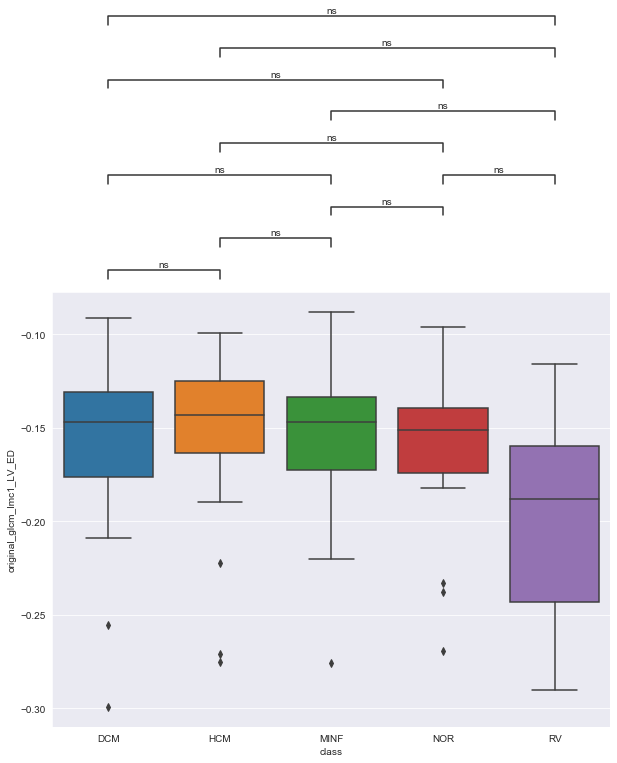

----------   original_glcm_JointAverage_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   1.0734 0.7857 -1.6601  3.807  False
   DCM   MINF  -1.0039 0.8253 -3.7375 1.7296  False
   DCM    NOR   0.7211    0.9 -2.0124 3.4547  False
   DCM     RV   -1.537  0.521 -4.2706 1.1965  False
   HCM   MINF  -2.0773 0.2231 -4.8109 0.6562  False
   HCM    NOR  -0.3523    0.9 -3.0858 2.3813  False
   HCM     RV  -2.6104 0.0687  -5.344 0.1231  False
  MINF    NOR   1.7251 0.4074 -1.0085 4.4586  False
  MINF     RV  -0.5331    0.9 -3.2666 2.2004  False
   NOR     RV  -2.2582 0.1549 -4.9917 0.4754  False
---------------------------------------------------


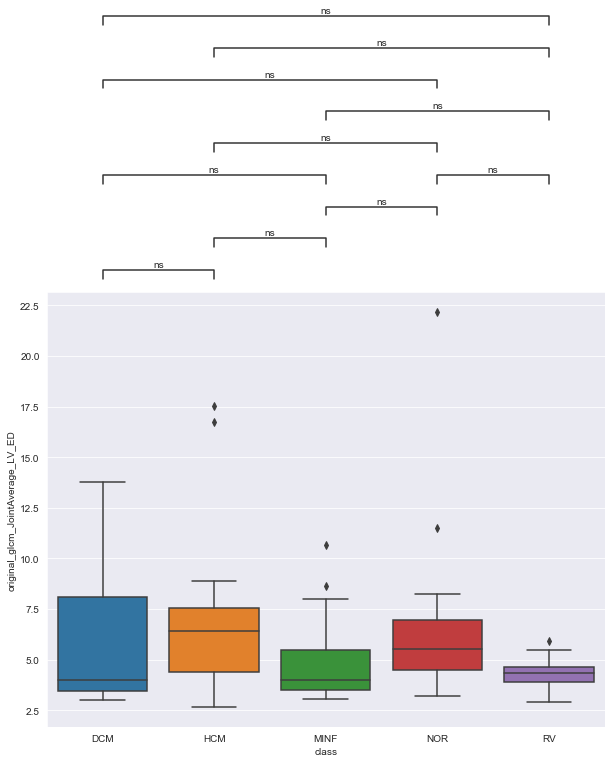

----------   original_glcm_JointEnergy_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0417 0.2741 -0.0996 0.0163  False
   DCM   MINF   0.0077    0.9 -0.0502 0.0657  False
   DCM    NOR  -0.0147    0.9 -0.0727 0.0432  False
   DCM     RV   0.0307 0.5721 -0.0273 0.0886  False
   HCM   MINF   0.0494 0.1319 -0.0085 0.1073  False
   HCM    NOR   0.0269 0.6733  -0.031 0.0848  False
   HCM     RV   0.0723 0.0068  0.0144 0.1303   True
  MINF    NOR  -0.0225 0.7926 -0.0804 0.0354  False
  MINF     RV   0.0229 0.7808  -0.035 0.0809  False
   NOR     RV   0.0454 0.1961 -0.0125 0.1033  False
---------------------------------------------------


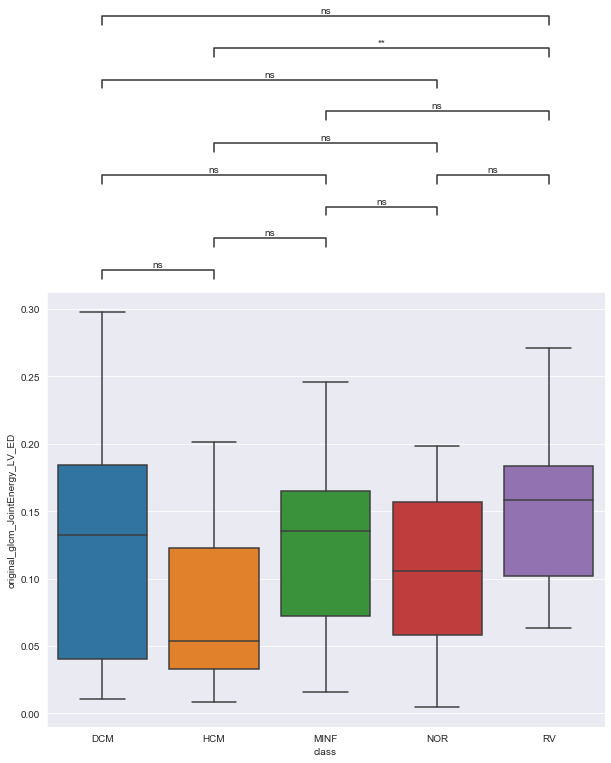

----------   original_glcm_JointEntropy_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.6467 0.5034 -0.4809  1.7744  False
   DCM   MINF  -0.4135 0.8262 -1.5412  0.7141  False
   DCM    NOR   0.1405    0.9 -0.9871  1.2682  False
   DCM     RV  -0.7553 0.3449 -1.8829  0.3724  False
   HCM   MINF  -1.0603 0.0759 -2.1879  0.0674  False
   HCM    NOR  -0.5062 0.6979 -1.6339  0.6215  False
   HCM     RV   -1.402 0.0071 -2.5297 -0.2743   True
  MINF    NOR    0.554 0.6317 -0.5736  1.6817  False
  MINF     RV  -0.3418    0.9 -1.4694  0.7859  False
   NOR     RV  -0.8958 0.1852 -2.0235  0.2319  False
----------------------------------------------------


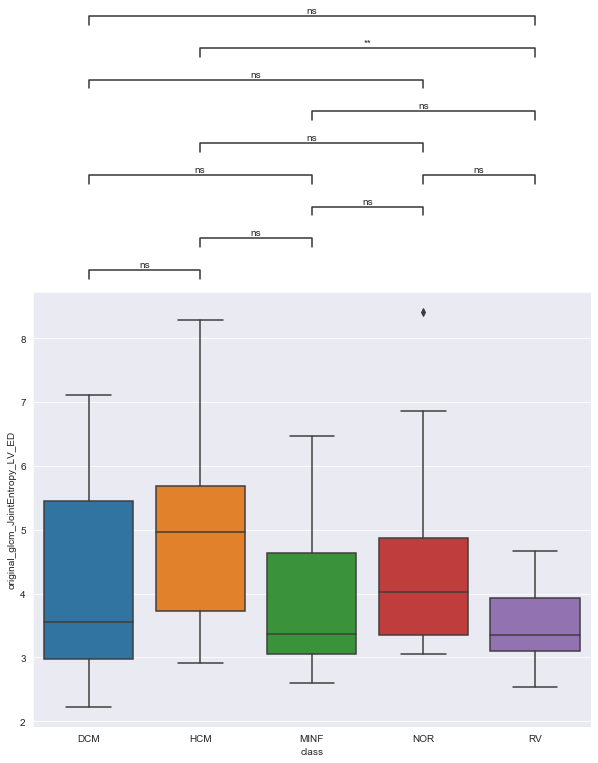

----------   original_glcm_MaximumProbability_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0551 0.5004 -0.1508 0.0406  False
   DCM   MINF   0.0197    0.9  -0.076 0.1155  False
   DCM    NOR   -0.006    0.9 -0.1018 0.0897  False
   DCM     RV    0.069 0.2725 -0.0268 0.1647  False
   HCM   MINF   0.0748 0.1985 -0.0209 0.1706  False
   HCM    NOR   0.0491 0.5985 -0.0467 0.1448  False
   HCM     RV   0.1241 0.0045  0.0283 0.2198   True
  MINF    NOR  -0.0258    0.9 -0.1215   0.07  False
  MINF     RV   0.0492 0.5962 -0.0465 0.1449  False
   NOR     RV    0.075 0.1969 -0.0207 0.1707  False
---------------------------------------------------


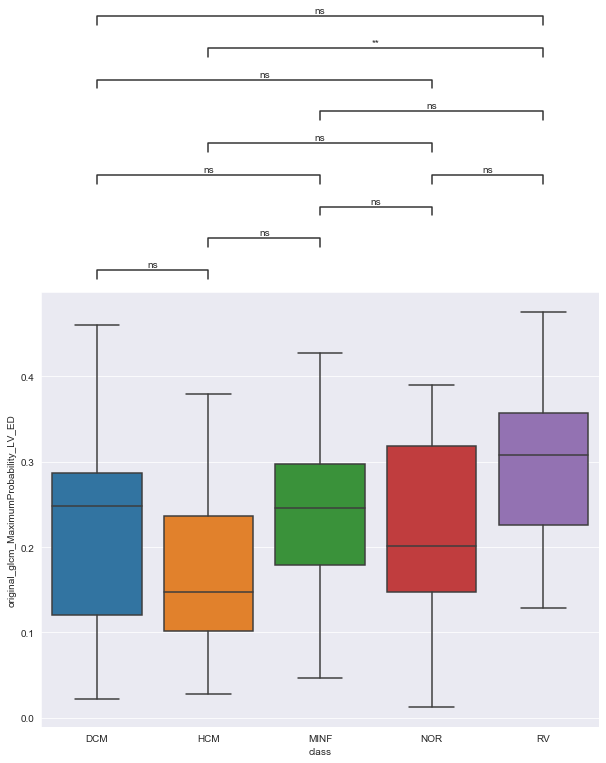

----------   original_glcm_SumAverage_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   2.1468 0.7857  -3.3203 7.6139  False
   DCM   MINF  -2.0078 0.8253  -7.4749 3.4593  False
   DCM    NOR   1.4423    0.9  -4.0248 6.9094  False
   DCM     RV   -3.074  0.521  -8.5411 2.3931  False
   HCM   MINF  -4.1547 0.2231  -9.6218 1.3124  False
   HCM    NOR  -0.7045    0.9  -6.1716 4.7626  False
   HCM     RV  -5.2209 0.0687 -10.6879 0.2462  False
  MINF    NOR   3.4501 0.4074   -2.017 8.9172  False
  MINF     RV  -1.0662    0.9  -6.5333 4.4009  False
   NOR     RV  -4.5163 0.1549  -9.9834 0.9508  False
----------------------------------------------------


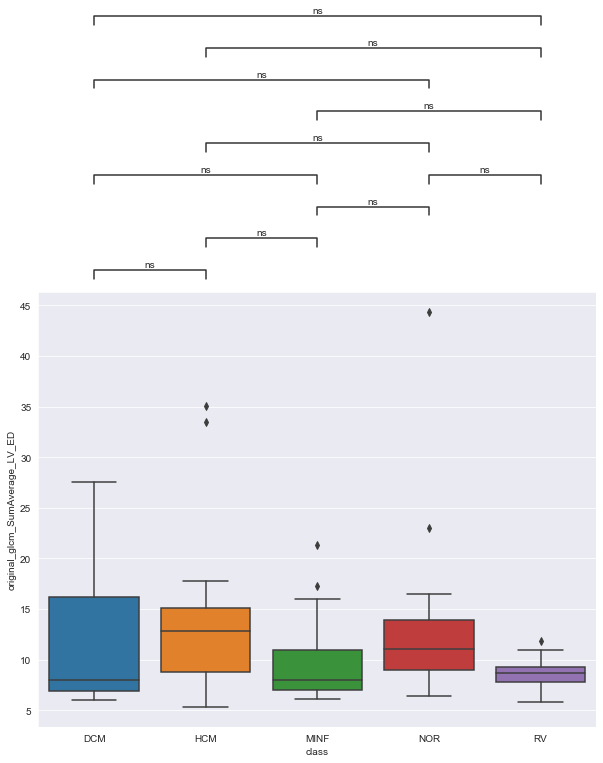

----------   original_glcm_SumEntropy_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.3819 0.4856 -0.2716  1.0353  False
   DCM   MINF  -0.2392 0.8271 -0.8927  0.4142  False
   DCM    NOR   0.1068    0.9 -0.5467  0.7602  False
   DCM     RV  -0.3564 0.5473 -1.0099   0.297  False
   HCM   MINF  -0.6211 0.0708 -1.2746  0.0324  False
   HCM    NOR  -0.2751 0.7415 -0.9286  0.3783  False
   HCM     RV  -0.7383 0.0186 -1.3917 -0.0848   True
  MINF    NOR    0.346 0.5721 -0.3075  0.9994  False
  MINF     RV  -0.1172    0.9 -0.7706  0.5363  False
   NOR     RV  -0.4632 0.2882 -1.1166  0.1903  False
----------------------------------------------------


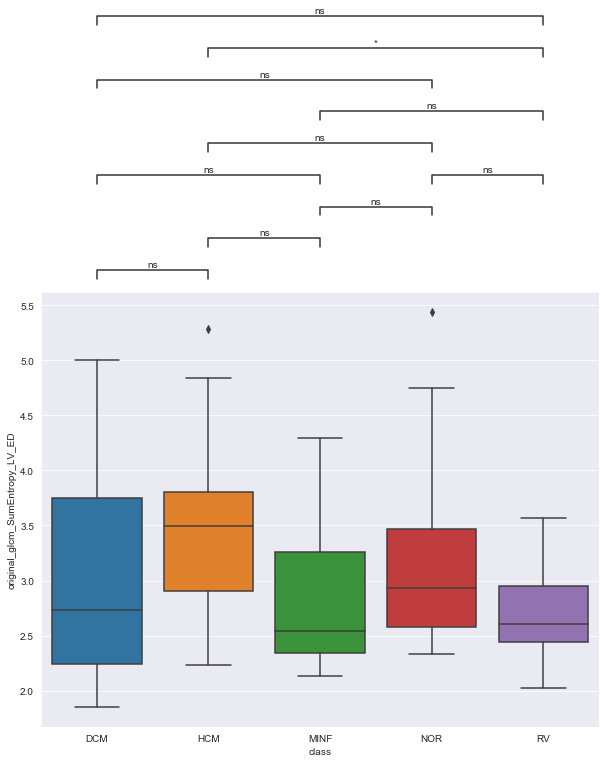

----------   original_gldm_DependenceNonUniformityNormalized_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0095 0.5873 -0.0088  0.0279  False
   DCM   MINF  -0.0022    0.9 -0.0206  0.0162  False
   DCM    NOR  -0.0037    0.9  -0.022  0.0147  False
   DCM     RV  -0.0173 0.0756 -0.0356  0.0011  False
   HCM   MINF  -0.0117 0.3928 -0.0301  0.0066  False
   HCM    NOR  -0.0132 0.2741 -0.0316  0.0052  False
   HCM     RV  -0.0268  0.001 -0.0452 -0.0085   True
  MINF    NOR  -0.0015    0.9 -0.0198  0.0169  False
  MINF     RV  -0.0151 0.1599 -0.0334  0.0033  False
   NOR     RV  -0.0136 0.2454  -0.032  0.0048  False
----------------------------------------------------


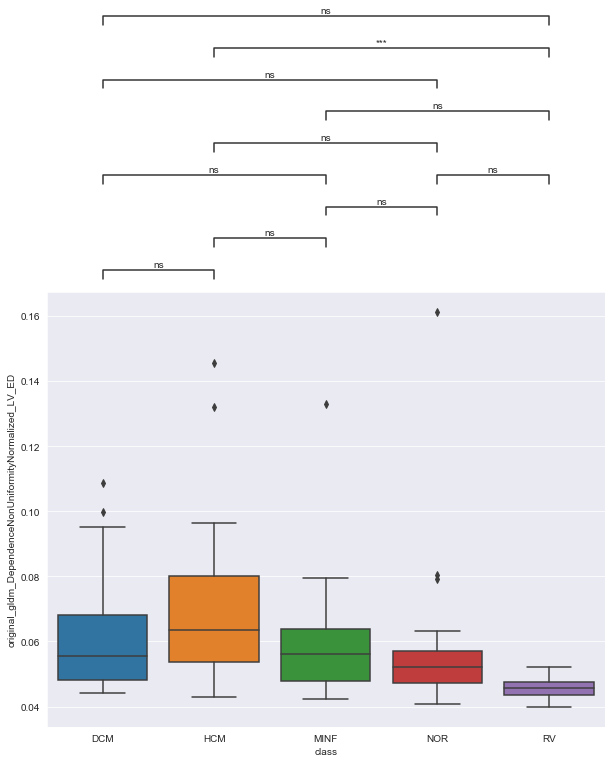

----------   original_gldm_DependenceVariance_LV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  -6.1954 0.3366 -15.3716  2.9807  False
   DCM   MINF   -0.698    0.9  -9.8742  8.4781  False
   DCM    NOR    2.833    0.9  -6.3432 12.0092  False
   DCM     RV  11.7368 0.0052   2.5606  20.913   True
   HCM   MINF   5.4974  0.461  -3.6788 14.6736  False
   HCM    NOR   9.0284 0.0561  -0.1478 18.2046  False
   HCM     RV  17.9323  0.001   8.7561 27.1084   True
  MINF    NOR    3.531 0.7979  -5.6452 12.7072  False
  MINF     RV  12.4349 0.0026   3.2587  21.611   True
   NOR     RV   8.9038 0.0617  -0.2723   18.08  False
-----------------------------------------------------


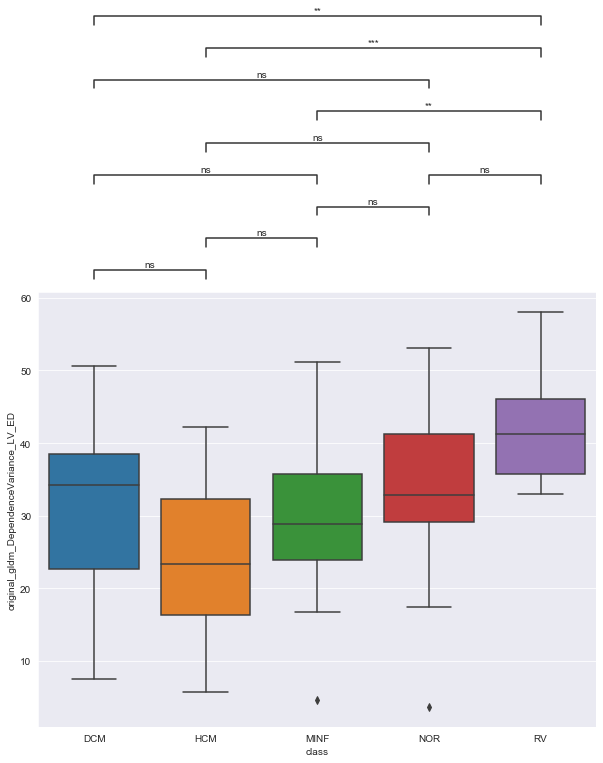

----------   original_gldm_GrayLevelNonUniformity_LV_ED --------- 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
   DCM    HCM -777.8193 0.1849 -1756.5913  200.9527  False
   DCM   MINF -373.3531 0.8032  -1352.125  605.4189  False
   DCM    NOR -354.9635 0.8325 -1333.7355  623.8084  False
   DCM     RV 1694.6645  0.001   715.8925 2673.4365   True
   HCM   MINF  404.4662 0.7536  -574.3058 1383.2382  False
   HCM    NOR  422.8557 0.7242  -555.9162 1401.6277  False
   HCM     RV 2472.4838  0.001  1493.7118 3451.2558   True
  MINF    NOR   18.3895    0.9  -960.3824  997.1615  False
  MINF     RV 2068.0176  0.001  1089.2456 3046.7895   True
   NOR     RV  2049.628  0.001  1070.8561    3028.4   True
----------------------------------------------------------


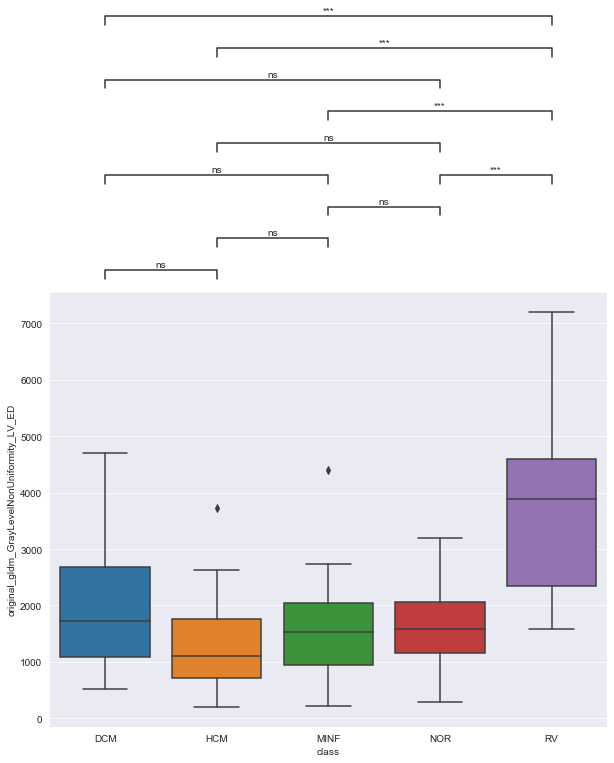

----------   original_gldm_LargeDependenceEmphasis_LV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   DCM    HCM -36.5874 0.3524 -91.6105  18.4356  False
   DCM   MINF   3.3761    0.9 -51.6469  58.3992  False
   DCM    NOR  -0.8626    0.9 -55.8856  54.1605  False
   DCM     RV  71.5184 0.0043  16.4954 126.5415   True
   HCM   MINF  39.9635 0.2646 -15.0595  94.9866  False
   HCM    NOR  35.7249 0.3775 -19.2982  90.7479  False
   HCM     RV 108.1059  0.001  53.0828 163.1289   True
  MINF    NOR  -4.2387    0.9 -59.2617  50.7844  False
  MINF     RV  68.1423 0.0075  13.1193 123.1654   True
   NOR     RV   72.381 0.0037   17.358  127.404   True
------------------------------------------------------


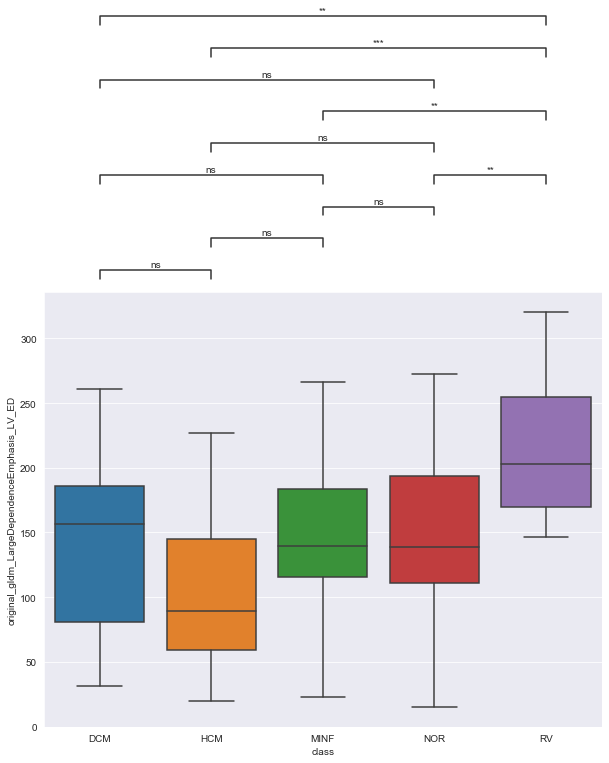

----------   original_gldm_LargeDependenceLowGrayLevelEmphasis_LV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  -4.9015 0.2864 -11.8045  2.0015  False
   DCM   MINF  -0.4679    0.9  -7.3709  6.4351  False
   DCM    NOR  -3.6962 0.5628 -10.5992  3.2068  False
   DCM     RV   2.4812 0.8375  -4.4218  9.3842  False
   HCM   MINF   4.4336 0.3889  -2.4694 11.3366  False
   HCM    NOR   1.2053    0.9  -5.6977  8.1083  False
   HCM     RV   7.3827 0.0299   0.4797 14.2857   True
  MINF    NOR  -3.2283 0.6686 -10.1313  3.6747  False
  MINF     RV   2.9491 0.7317  -3.9539  9.8521  False
   NOR     RV   6.1774 0.1019  -0.7256 13.0804  False
-----------------------------------------------------


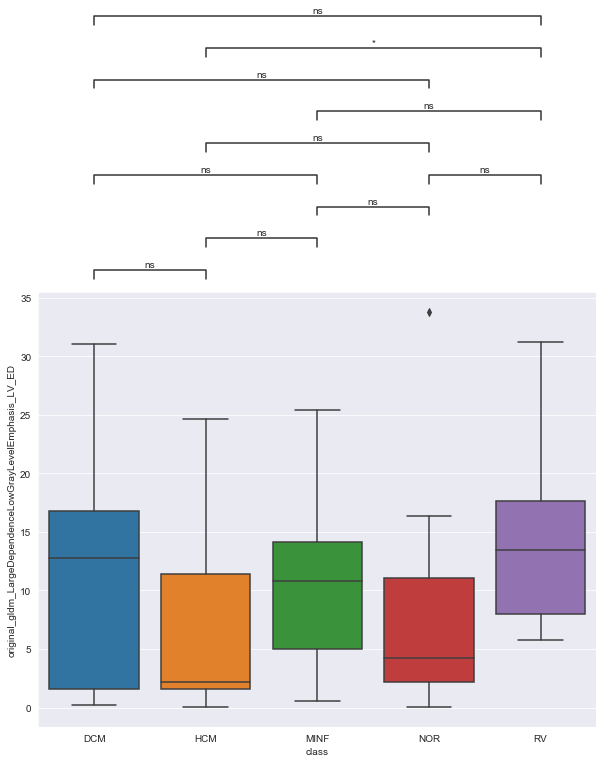

----------   original_gldm_SmallDependenceEmphasis_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0248 0.5014 -0.0183  0.0679  False
   DCM   MINF  -0.0163 0.8098 -0.0594  0.0269  False
   DCM    NOR    0.004    0.9 -0.0391  0.0472  False
   DCM     RV  -0.0342  0.187 -0.0773  0.0089  False
   HCM   MINF  -0.0411   0.07 -0.0842  0.0021  False
   HCM    NOR  -0.0208 0.6468 -0.0639  0.0224  False
   HCM     RV   -0.059 0.0023 -0.1021 -0.0159   True
  MINF    NOR   0.0203 0.6644 -0.0228  0.0634  False
  MINF     RV  -0.0179 0.7502 -0.0611  0.0252  False
   NOR     RV  -0.0382  0.108 -0.0813  0.0049  False
----------------------------------------------------


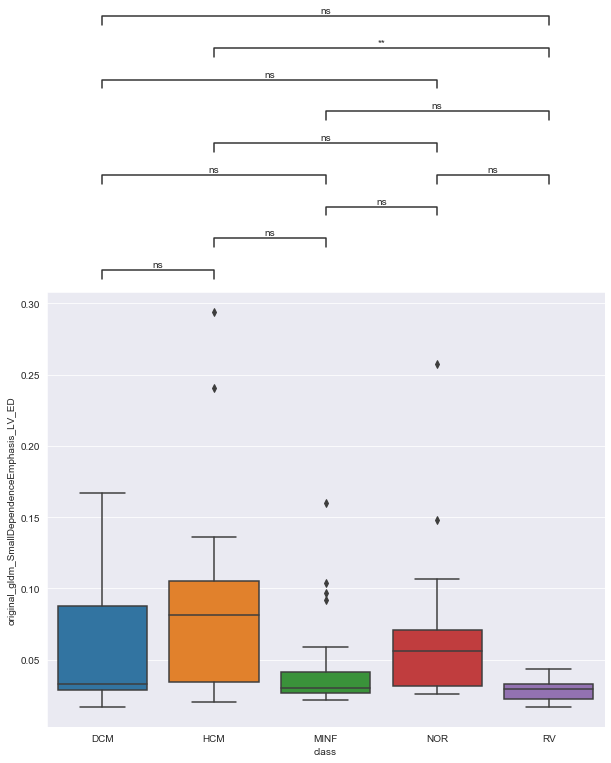

----------   original_glrlm_GrayLevelNonUniformity_LV_ED --------- 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   DCM    HCM -347.0748  0.172 -776.6662   82.5166  False
   DCM   MINF -180.9442 0.7411 -610.5357  248.6472  False
   DCM    NOR   -184.85  0.727 -614.4415  244.7414  False
   DCM     RV   601.583 0.0017  171.9916 1031.1745   True
   HCM   MINF  166.1306  0.795 -263.4609   595.722  False
   HCM    NOR  162.2248 0.8091 -267.3667  591.8162  False
   HCM     RV  948.6578  0.001  519.0664 1378.2493   True
  MINF    NOR   -3.9058    0.9 -433.4972  425.6856  False
  MINF     RV  782.5273  0.001  352.9358 1212.1187   True
   NOR     RV  786.4331  0.001  356.8416 1216.0245   True
---------------------------------------------------------


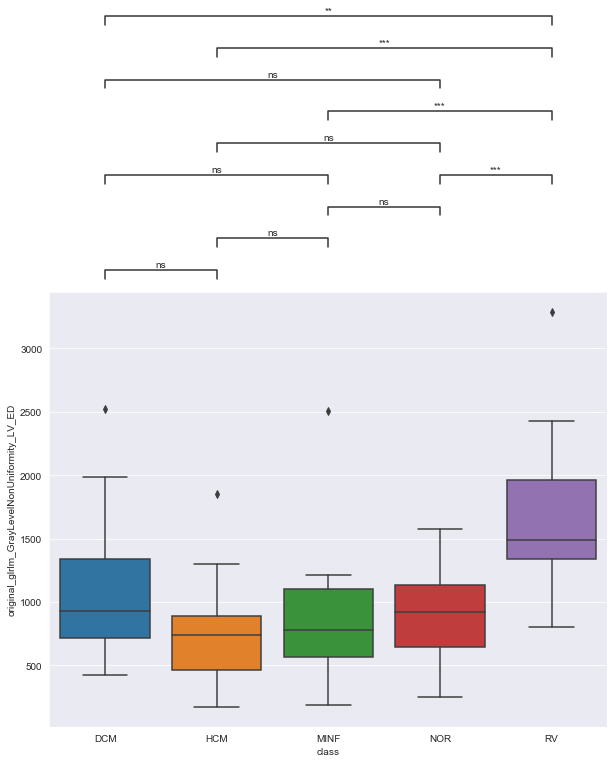

----------   original_glrlm_GrayLevelNonUniformityNormalized_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0482 0.3123  -0.118 0.0215  False
   DCM   MINF   0.0197    0.9   -0.05 0.0895  False
   DCM    NOR  -0.0244 0.8518 -0.0942 0.0453  False
   DCM     RV   0.0321 0.6801 -0.0376 0.1019  False
   HCM   MINF    0.068   0.06 -0.0018 0.1377  False
   HCM    NOR   0.0238 0.8658 -0.0459 0.0936  False
   HCM     RV   0.0804 0.0155  0.0106 0.1501   True
  MINF    NOR  -0.0442 0.4039 -0.1139 0.0256  False
  MINF     RV   0.0124    0.9 -0.0574 0.0821  False
   NOR     RV   0.0565 0.1693 -0.0132 0.1263  False
---------------------------------------------------


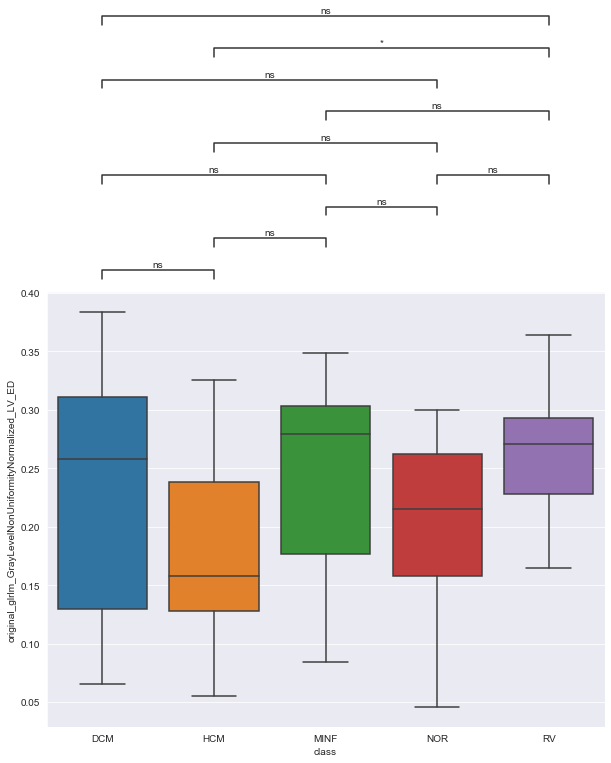

----------   original_glrlm_LongRunEmphasis_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -2.6472 0.2334 -6.1711 0.8766  False
   DCM   MINF  -0.6357    0.9 -4.1595 2.8882  False
   DCM    NOR  -1.8455 0.5812 -5.3693 1.6784  False
   DCM     RV   1.5244 0.7234 -1.9995 5.0482  False
   HCM   MINF   2.0116 0.5076 -1.5123 5.5354  False
   HCM    NOR   0.8018    0.9 -2.7221 4.3256  False
   HCM     RV   4.1716 0.0119  0.6477 7.6955   True
  MINF    NOR  -1.2098 0.8627 -4.7337 2.3141  False
  MINF     RV     2.16 0.4377 -1.3638 5.6839  False
   NOR     RV   3.3698  0.068  -0.154 6.8937  False
---------------------------------------------------


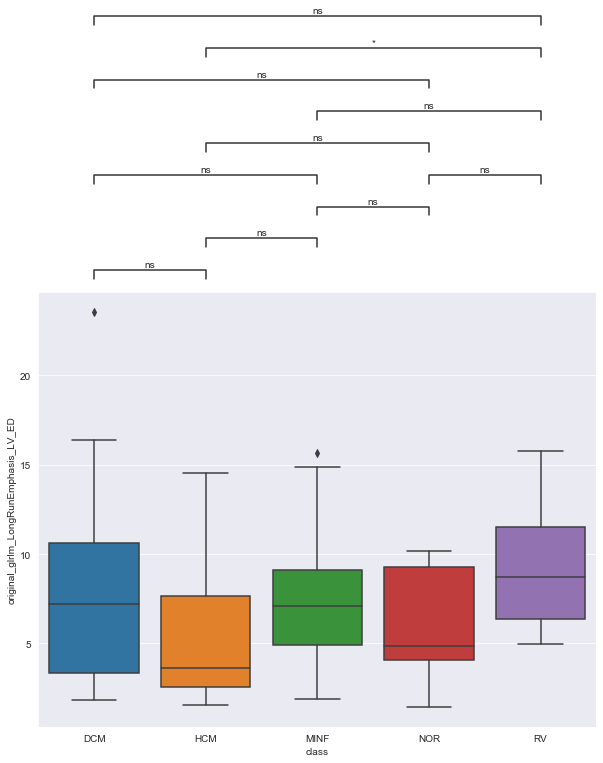

----------   original_glrlm_LongRunLowGrayLevelEmphasis_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.3463 0.1426 -0.7584 0.0659  False
   DCM   MINF  -0.1379 0.8762 -0.5501 0.2742  False
   DCM    NOR  -0.3469 0.1411 -0.7591 0.0653  False
   DCM     RV  -0.0418    0.9  -0.454 0.3704  False
   HCM   MINF   0.2083 0.6098 -0.2039 0.6205  False
   HCM    NOR  -0.0007    0.9 -0.4129 0.4115  False
   HCM     RV   0.3045 0.2487 -0.1077 0.7167  False
  MINF    NOR   -0.209 0.6072 -0.6212 0.2032  False
  MINF     RV   0.0962    0.9  -0.316 0.5083  False
   NOR     RV   0.3051 0.2466  -0.107 0.7173  False
---------------------------------------------------


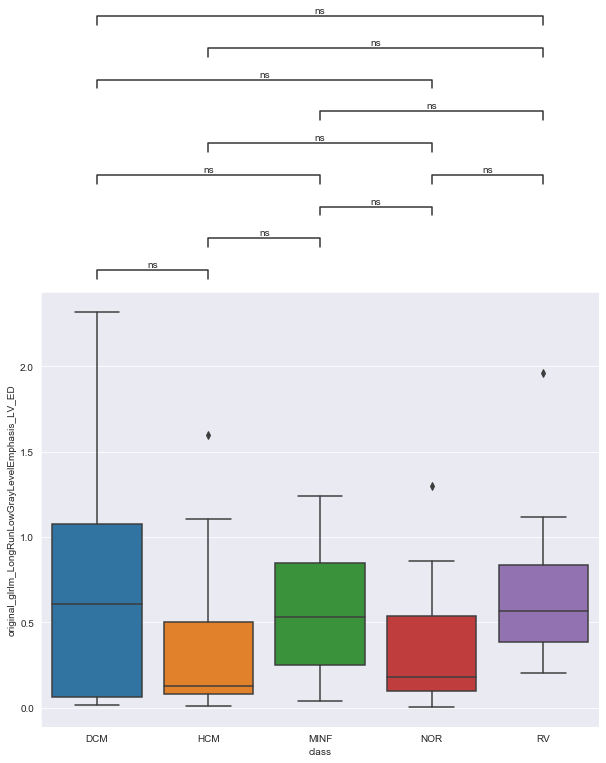

----------   original_glrlm_RunLengthNonUniformityNormalized_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0646 0.4056 -0.0376  0.1669  False
   DCM   MINF  -0.0208    0.9 -0.1231  0.0814  False
   DCM    NOR   0.0025    0.9 -0.0997  0.1047  False
   DCM     RV  -0.1159 0.0181 -0.2181 -0.0136   True
   HCM   MINF  -0.0855  0.146 -0.1877  0.0168  False
   HCM    NOR  -0.0621 0.4466 -0.1644  0.0401  False
   HCM     RV  -0.1805  0.001 -0.2827 -0.0783   True
  MINF    NOR   0.0233    0.9 -0.0789  0.1256  False
  MINF     RV   -0.095 0.0815 -0.1973  0.0072  False
   NOR     RV  -0.1184 0.0148 -0.2206 -0.0161   True
----------------------------------------------------


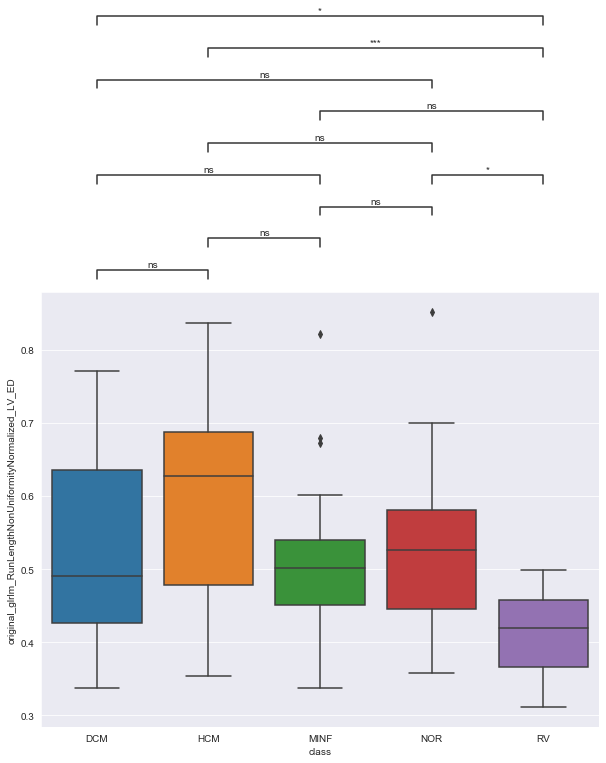

----------   original_glrlm_RunPercentage_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0599 0.3544 -0.0303    0.15  False
   DCM   MINF  -0.0129    0.9 -0.1031  0.0773  False
   DCM    NOR   0.0026    0.9 -0.0875  0.0928  False
   DCM     RV  -0.1097  0.009 -0.1999 -0.0195   True
   HCM   MINF  -0.0728 0.1731 -0.1629  0.0174  False
   HCM    NOR  -0.0572  0.402 -0.1474   0.033  False
   HCM     RV  -0.1696  0.001 -0.2598 -0.0794   True
  MINF    NOR   0.0155    0.9 -0.0746  0.1057  False
  MINF     RV  -0.0968  0.029  -0.187 -0.0066   True
   NOR     RV  -0.1124  0.007 -0.2025 -0.0222   True
----------------------------------------------------


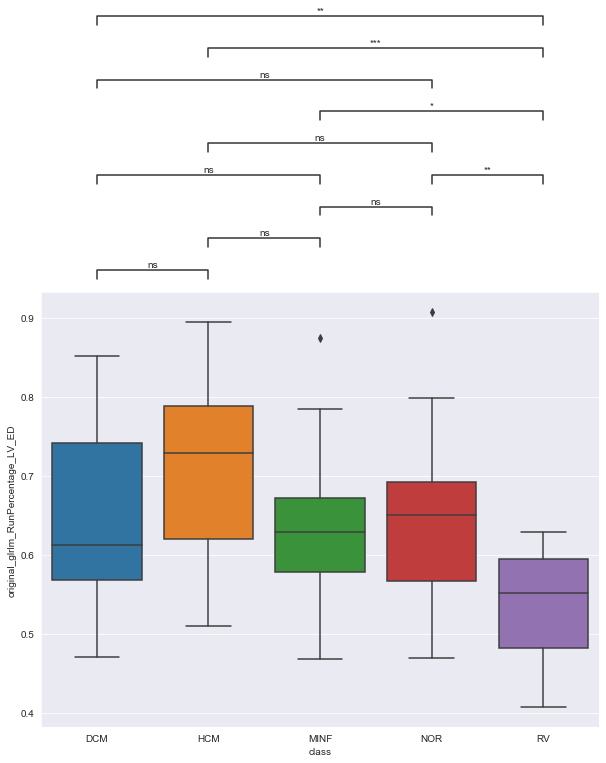

----------   original_glrlm_RunVariance_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -1.6669 0.1906 -3.7789 0.4451  False
   DCM   MINF  -0.5839    0.9 -2.6959 1.5281  False
   DCM    NOR  -1.1821  0.525 -3.2941 0.9299  False
   DCM     RV   0.7343 0.8559 -1.3777 2.8463  False
   HCM   MINF    1.083 0.5982 -1.0291  3.195  False
   HCM    NOR   0.4848    0.9 -1.6272 2.5968  False
   HCM     RV   2.4011 0.0176  0.2891 4.5131   True
  MINF    NOR  -0.5982    0.9 -2.7102 1.5138  False
  MINF     RV   1.3182  0.419 -0.7938 3.4302  False
   NOR     RV   1.9164  0.094 -0.1956 4.0284  False
---------------------------------------------------


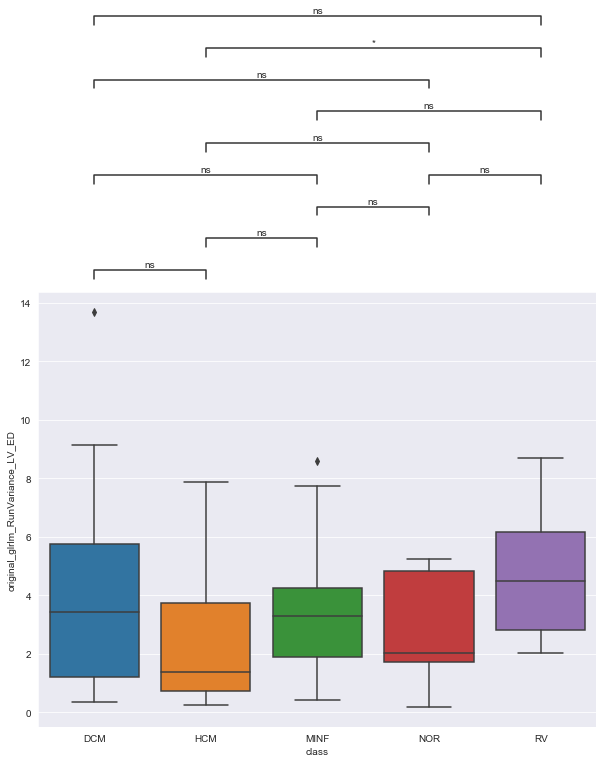

----------   original_glrlm_ShortRunEmphasis_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0448 0.4207 -0.0271  0.1168  False
   DCM   MINF  -0.0152    0.9 -0.0872  0.0567  False
   DCM    NOR   0.0081    0.9 -0.0638  0.0801  False
   DCM     RV  -0.0784 0.0257 -0.1503 -0.0064   True
   HCM   MINF  -0.0601 0.1471  -0.132  0.0119  False
   HCM    NOR  -0.0367 0.6027 -0.1086  0.0353  False
   HCM     RV  -0.1232  0.001 -0.1952 -0.0512   True
  MINF    NOR   0.0234 0.8915 -0.0486  0.0953  False
  MINF     RV  -0.0631 0.1138 -0.1351  0.0088  False
   NOR     RV  -0.0865 0.0102 -0.1585 -0.0146   True
----------------------------------------------------


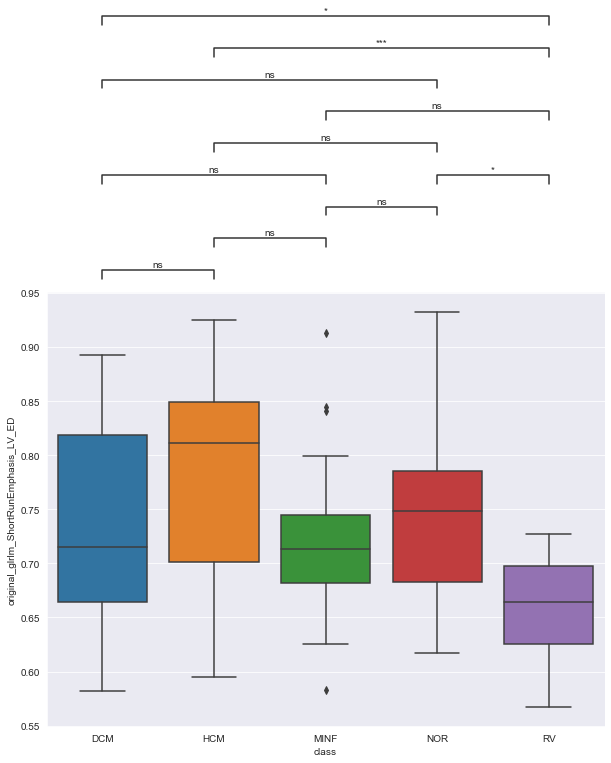

----------   original_glszm_GrayLevelNonUniformity_LV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  -0.6917    0.9 -18.4142 17.0309  False
   DCM   MINF -19.1144 0.0279 -36.8369 -1.3919   True
   DCM    NOR  -0.6316    0.9 -18.3541 17.0909  False
   DCM     RV  -0.8474    0.9 -18.5699 16.8751  False
   HCM   MINF -18.4228 0.0375 -36.1453 -0.7003   True
   HCM    NOR   0.0601    0.9 -17.6625 17.7826  False
   HCM     RV  -0.1558    0.9 -17.8783 17.5667  False
  MINF    NOR  18.4828 0.0365   0.7603 36.2053   True
  MINF     RV   18.267   0.04   0.5445 35.9895   True
   NOR     RV  -0.2158    0.9 -17.9383 17.5067  False
-----------------------------------------------------


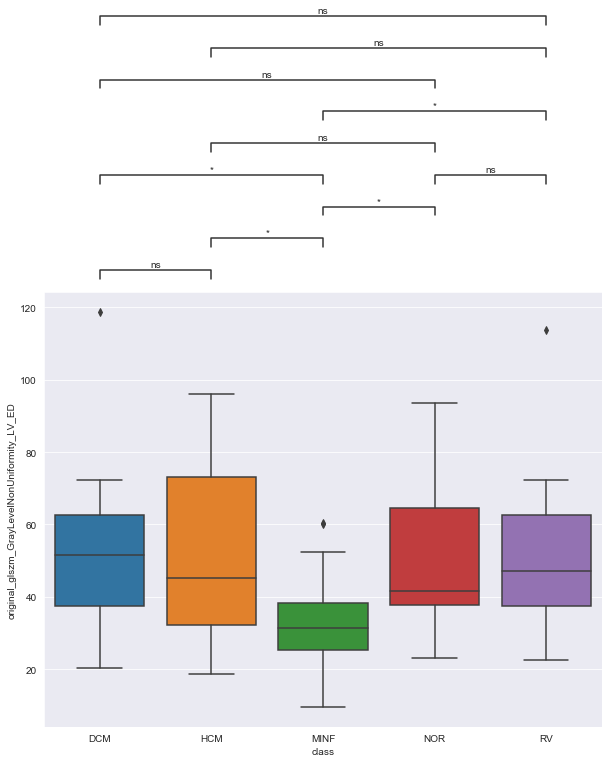

----------   original_glszm_LargeAreaEmphasis_LV_ED --------- 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
   DCM    HCM -55315.6207 0.4709 -148566.0243  37934.7829  False
   DCM   MINF  -9821.6512    0.9 -103072.0547  83428.7524  False
   DCM    NOR -45546.9177 0.6362 -138797.3213  47703.4858  False
   DCM     RV 117164.9687 0.0064   23914.5651 210415.3723   True
   HCM   MINF  45493.9695 0.6371  -47756.4341 138744.3731  False
   HCM    NOR   9768.7029    0.9  -83481.7006 103019.1065  False
   HCM     RV 172480.5894  0.001   79230.1858  265730.993   True
  MINF    NOR -35725.2666 0.8006 -128975.6702   57525.137  False
  MINF     RV 126986.6199 0.0024   33736.2163 220237.0234   True
   NOR     RV 162711.8864  0.001   69461.4829   255962.29   True
----------------------------------------------------------------


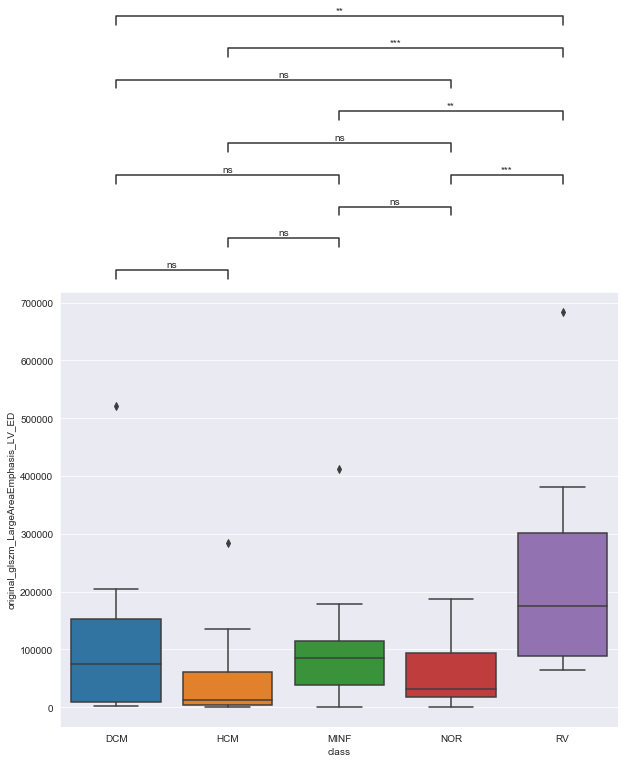

----------   original_glszm_LargeAreaHighGrayLevelEmphasis_LV_ED --------- 

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj      lower        upper     reject
-------------------------------------------------------------------
   DCM    HCM  -430059.648    0.9 -2183086.0816 1322966.7855  False
   DCM   MINF  491762.9399    0.9 -1261263.4937 2244789.3735  False
   DCM    NOR -137583.0416    0.9 -1890609.4752 1615443.3919  False
   DCM     RV 2432691.9804 0.0019   679665.5469  4185718.414   True
   HCM   MINF   921822.588 0.5778  -831203.8456 2674849.0215  False
   HCM    NOR  292476.6064    0.9 -1460549.8272   2045503.04  False
   HCM     RV 2862751.6285  0.001  1109725.1949  4615778.062   True
  MINF    NOR -629345.9815 0.8382 -2382372.4151  1123680.452  False
  MINF     RV 1940929.0405 0.0223   187902.6069 3693955.4741   True
   NOR     RV 2570275.0221  0.001   817248.5885 4323301.4556   True
---------------------------------------

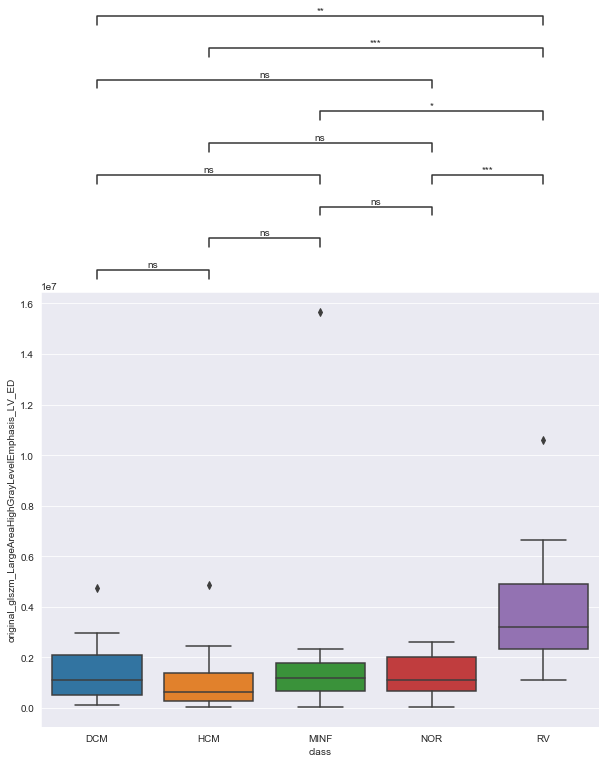

----------   original_glszm_LargeAreaLowGrayLevelEmphasis_LV_ED --------- 

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
   DCM    HCM -6546.3871 0.2261 -15189.6956  2096.9213  False
   DCM   MINF -3125.3033 0.8342 -11768.6118  5518.0051  False
   DCM    NOR  -6098.623 0.2926 -14741.9314  2544.6855  False
   DCM     RV  5233.8887 0.4502  -3409.4197 13877.1972  False
   HCM   MINF  3421.0838 0.7808  -5222.2246 12064.3923  False
   HCM    NOR   447.7642    0.9  -8195.5443  9091.0726  False
   HCM     RV 11780.2759 0.0024   3136.9674 20423.5843   True
  MINF    NOR -2973.3197 0.8616 -11616.6281  5669.9888  False
  MINF     RV  8359.1921 0.0631   -284.1164 17002.5005  False
   NOR     RV 11332.5117 0.0039   2689.2033 19975.8201   True
-------------------------------------------------------------


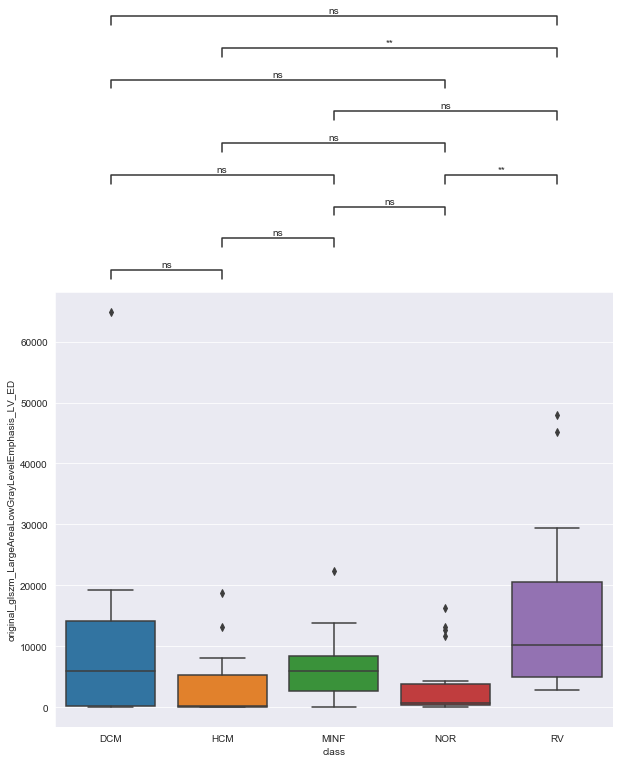

----------   original_glszm_SizeZoneNonUniformity_LV_ED --------- 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   DCM    HCM   1.3348    0.9  -93.4265   96.096  False
   DCM   MINF  -77.533 0.1621 -172.2942  17.2283  False
   DCM    NOR   1.4899    0.9  -93.2714  96.2511  False
   DCM     RV -62.4791 0.3613 -157.2404  32.2821  False
   HCM   MINF -78.8677 0.1493  -173.629  15.8935  False
   HCM    NOR   0.1551    0.9  -94.6062  94.9164  False
   HCM     RV -63.8139 0.3392 -158.5752  30.9473  False
  MINF    NOR  79.0228 0.1479  -15.7384 173.7841  False
  MINF     RV  15.0538    0.9  -79.7074 109.8151  False
   NOR     RV  -63.969 0.3367 -158.7303  30.7922  False
-------------------------------------------------------


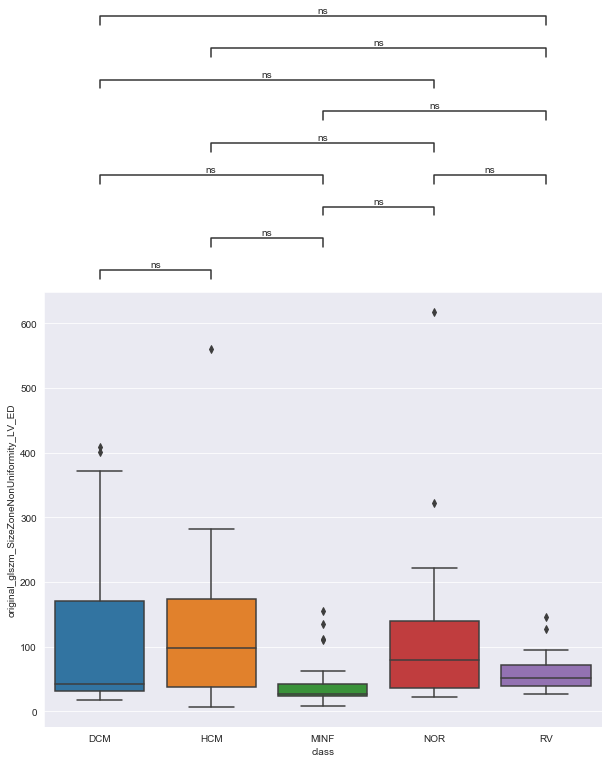

----------   original_glszm_ZonePercentage_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0295 0.4756 -0.0205 0.0796  False
   DCM   MINF  -0.0181 0.8326 -0.0682 0.0319  False
   DCM    NOR   0.0049    0.9 -0.0452 0.0549  False
   DCM     RV  -0.0365 0.2611 -0.0865 0.0136  False
   HCM   MINF  -0.0477 0.0696 -0.0977 0.0024  False
   HCM    NOR  -0.0247  0.629 -0.0747 0.0254  False
   HCM     RV   -0.066 0.0036 -0.1161 -0.016   True
  MINF    NOR    0.023 0.6807  -0.027 0.0731  False
  MINF     RV  -0.0183 0.8266 -0.0684 0.0317  False
   NOR     RV  -0.0414 0.1546 -0.0914 0.0087  False
---------------------------------------------------


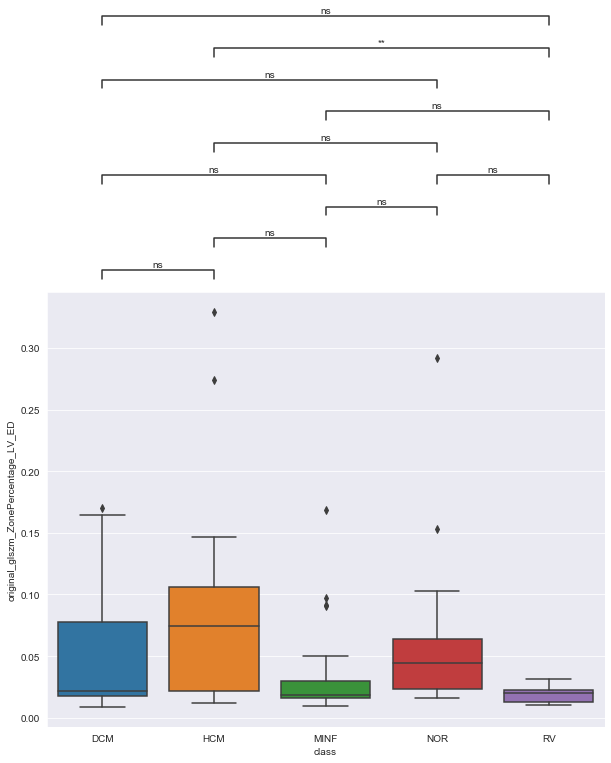

----------   original_glszm_ZoneVariance_LV_ED --------- 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
   DCM    HCM -54334.3557 0.4688 -145735.1901  37066.4786  False
   DCM   MINF -10527.7134    0.9 -101928.5478  80873.1209  False
   DCM    NOR -44386.7778 0.6406 -135787.6122  47014.0565  False
   DCM     RV 115852.6907 0.0058   24451.8563  207253.525   True
   HCM   MINF  43806.6423 0.6505  -47594.1921 135207.4766  False
   HCM    NOR   9947.5779    0.9  -81453.2565 101348.4122  False
   HCM     RV 170187.0464  0.001    78786.212 261587.8807   True
  MINF    NOR -33859.0644 0.8204 -125259.8987    57541.77  False
  MINF     RV 126380.4041  0.002   34979.5698 217781.2385   True
   NOR     RV 160239.4685  0.001   68838.6342 251640.3028   True
----------------------------------------------------------------


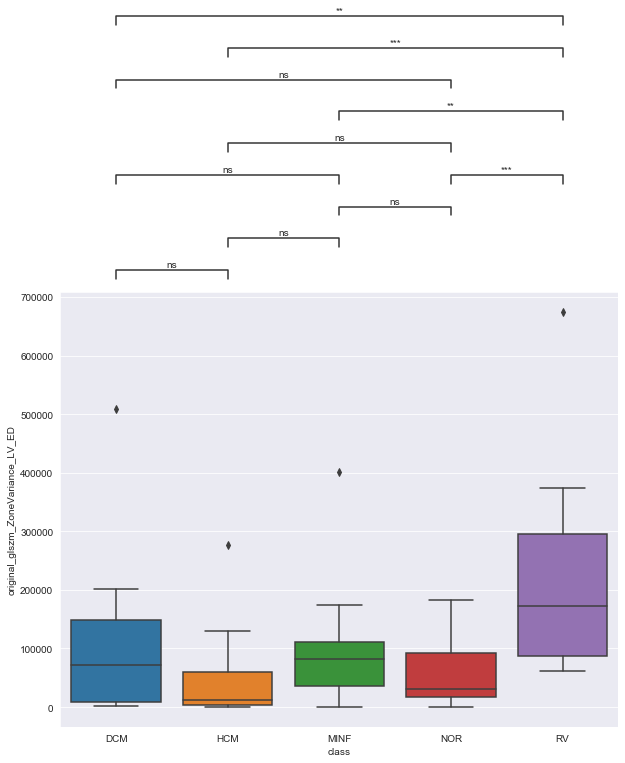

----------   original_ngtdm_Busyness_LV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM -16.9103 0.0633 -34.4019  0.5813  False
   DCM   MINF  -8.5254 0.6378  -26.017  8.9662  False
   DCM    NOR -15.6398 0.1024 -33.1314  1.8518  False
   DCM     RV   6.5003 0.8185 -10.9913 23.9919  False
   HCM   MINF   8.3849 0.6504  -9.1067 25.8765  False
   HCM    NOR   1.2704    0.9 -16.2212  18.762  False
   HCM     RV  23.4106  0.003    5.919 40.9022   True
  MINF    NOR  -7.1144 0.7637  -24.606 10.3772  False
  MINF     RV  15.0257 0.1271  -2.4659 32.5173  False
   NOR     RV  22.1402 0.0059   4.6486 39.6318   True
-----------------------------------------------------


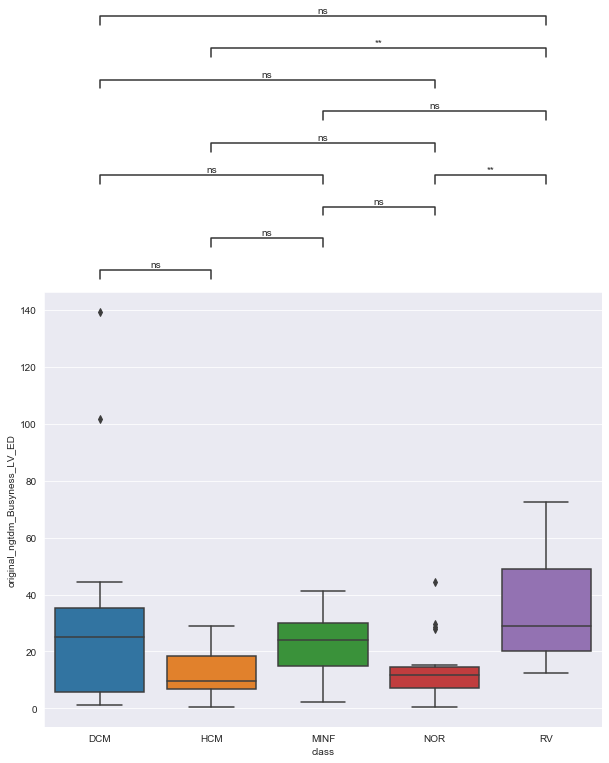

----------   original_ngtdm_Coarseness_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0004  0.163 -0.0001   0.001  False
   DCM   MINF   0.0005 0.0886    -0.0   0.001  False
   DCM    NOR   0.0002    0.9 -0.0004  0.0007  False
   DCM     RV  -0.0004 0.2039 -0.0009  0.0001  False
   HCM   MINF   0.0001    0.9 -0.0005  0.0006  False
   HCM    NOR  -0.0003 0.5975 -0.0008  0.0003  False
   HCM     RV  -0.0008  0.001 -0.0014 -0.0003   True
  MINF    NOR  -0.0003 0.4392 -0.0008  0.0002  False
  MINF     RV  -0.0009  0.001 -0.0014 -0.0004   True
   NOR     RV  -0.0006 0.0273 -0.0011    -0.0   True
----------------------------------------------------


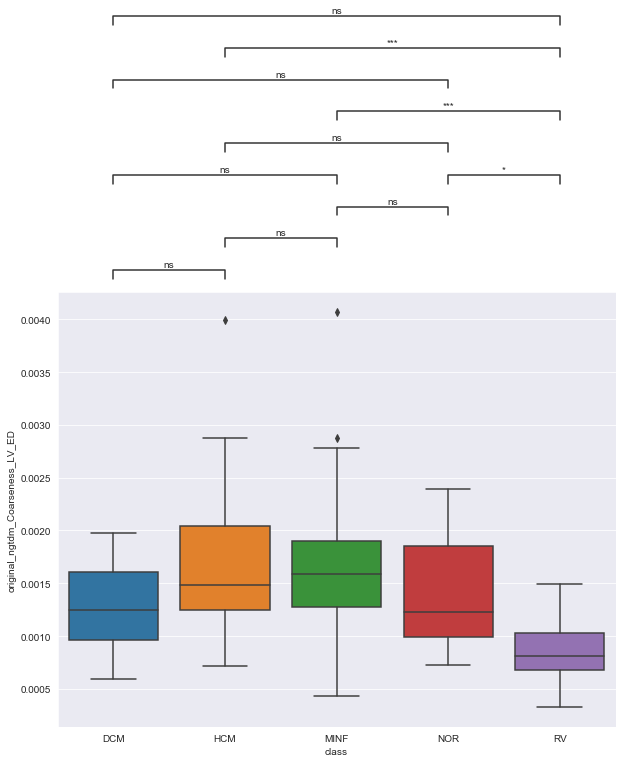

----------   original_ngtdm_Contrast_LV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0286 0.0021  0.0079  0.0494   True
   DCM   MINF   0.0014    0.9 -0.0193  0.0222  False
   DCM    NOR   0.0011    0.9 -0.0196  0.0219  False
   DCM     RV  -0.0117 0.5169 -0.0325   0.009  False
   HCM   MINF  -0.0272 0.0039  -0.048 -0.0064   True
   HCM    NOR  -0.0275 0.0034 -0.0483 -0.0067   True
   HCM     RV  -0.0404  0.001 -0.0611 -0.0196   True
  MINF    NOR  -0.0003    0.9 -0.0211  0.0205  False
  MINF     RV  -0.0132 0.4023 -0.0339  0.0076  False
   NOR     RV  -0.0129 0.4261 -0.0336  0.0079  False
----------------------------------------------------


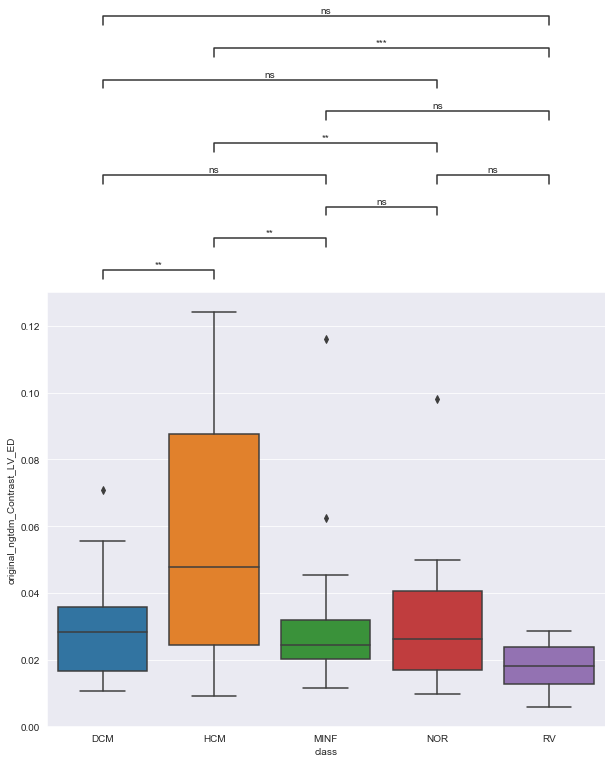

----------   original_shape_Elongation_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.0178 0.8449  -0.068  0.0324  False
   DCM   MINF    -0.02 0.7769 -0.0701  0.0302  False
   DCM    NOR  -0.0262 0.5843 -0.0763   0.024  False
   DCM     RV  -0.0726 0.0011 -0.1227 -0.0224   True
   HCM   MINF  -0.0022    0.9 -0.0523   0.048  False
   HCM    NOR  -0.0084    0.9 -0.0585  0.0418  False
   HCM     RV  -0.0548 0.0252 -0.1049 -0.0046   True
  MINF    NOR  -0.0062    0.9 -0.0564   0.044  False
  MINF     RV  -0.0526 0.0352 -0.1027 -0.0024   True
   NOR     RV  -0.0464 0.0842 -0.0966  0.0038  False
----------------------------------------------------


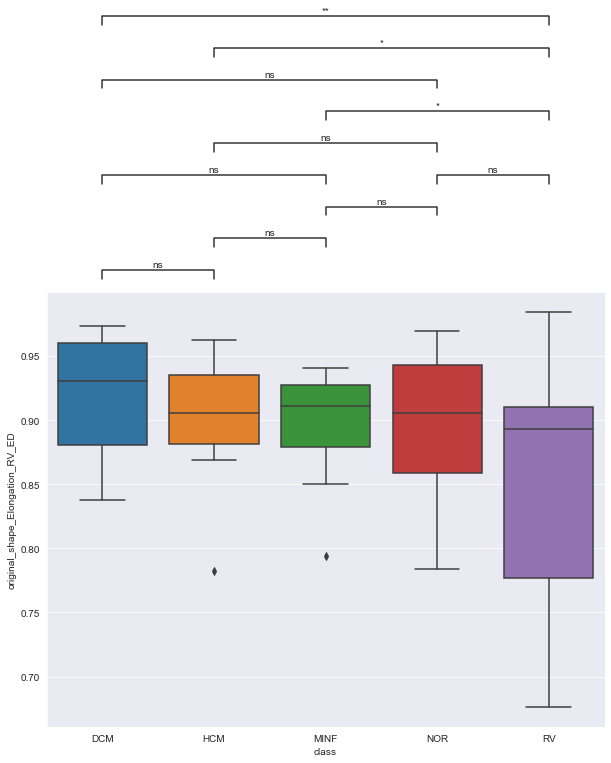

----------   original_shape_Flatness_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0581 0.0733 -0.0034 0.1195  False
   DCM   MINF   0.0043    0.9 -0.0571 0.0658  False
   DCM    NOR   0.0323 0.5781 -0.0291 0.0937  False
   DCM     RV   0.1019  0.001  0.0405 0.1634   True
   HCM   MINF  -0.0537 0.1159 -0.1152 0.0077  False
   HCM    NOR  -0.0258 0.7435 -0.0872 0.0357  False
   HCM     RV   0.0439  0.281 -0.0176 0.1053  False
  MINF    NOR   0.0279 0.6885 -0.0335 0.0894  False
  MINF     RV   0.0976  0.001  0.0362  0.159   True
   NOR     RV   0.0696  0.018  0.0082 0.1311   True
---------------------------------------------------


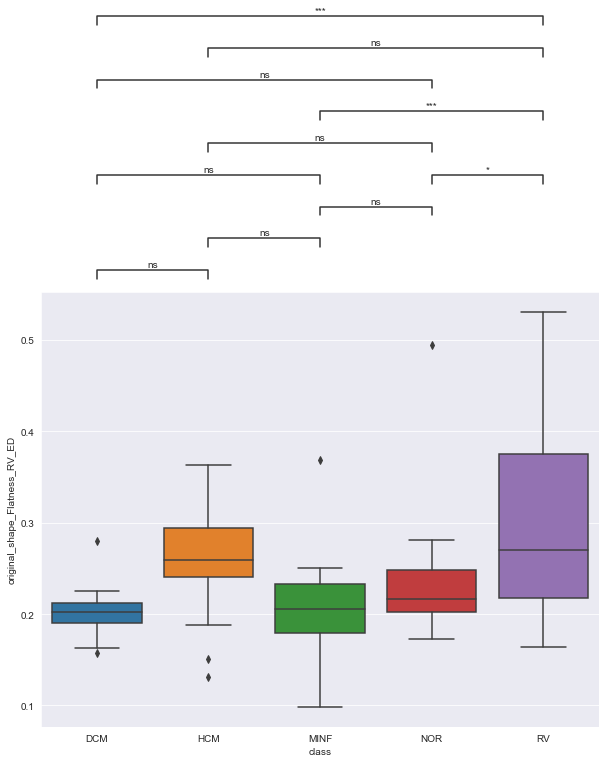

----------   original_shape_LeastAxisLength_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.5581    0.9 -2.3539 1.2377  False
   DCM   MINF  -1.1505 0.3916 -2.9463 0.6454  False
   DCM    NOR  -1.2306 0.3214 -3.0264 0.5652  False
   DCM     RV   0.9689 0.5564 -0.8269 2.7648  False
   HCM   MINF  -0.5923 0.8837 -2.3882 1.2035  False
   HCM    NOR  -0.6725 0.8141 -2.4683 1.1233  False
   HCM     RV   1.5271  0.134 -0.2688 3.3229  False
  MINF    NOR  -0.0802    0.9  -1.876 1.7157  False
  MINF     RV   2.1194 0.0123  0.3236 3.9152   True
   NOR     RV   2.1995 0.0084  0.4037 3.9954   True
---------------------------------------------------


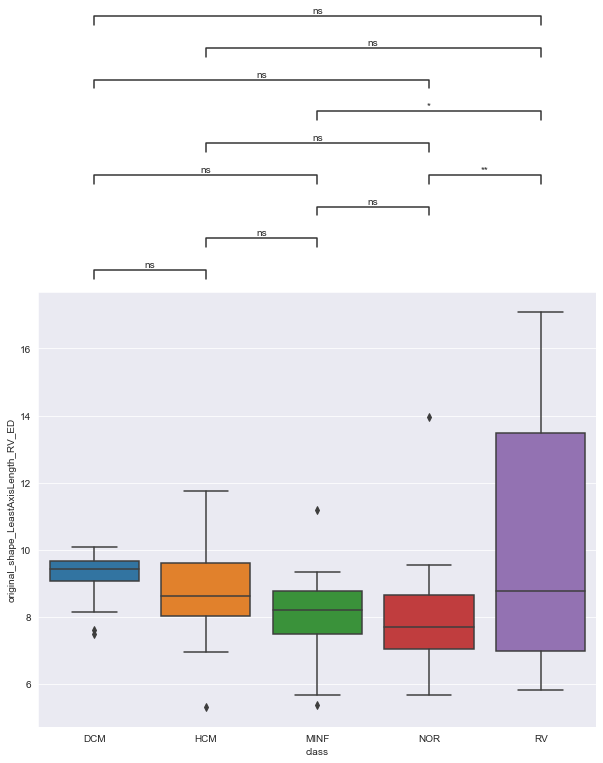

----------   original_shape_MajorAxisLength_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM -11.7942  0.001 -17.7129 -5.8754   True
   DCM   MINF  -5.3657 0.0945 -11.2844  0.5531  False
   DCM    NOR -11.4573  0.001  -17.376 -5.5385   True
   DCM     RV -12.2519  0.001 -18.1706 -6.3332   True
   HCM   MINF   6.4285 0.0263   0.5098 12.3472   True
   HCM    NOR   0.3369    0.9  -5.5818  6.2556  False
   HCM     RV  -0.4577    0.9  -6.3764   5.461  False
  MINF    NOR  -6.0916 0.0405 -12.0103 -0.1729   True
  MINF     RV  -6.8862 0.0141 -12.8049 -0.9675   True
   NOR     RV  -0.7946    0.9  -6.7133  5.1241  False
-----------------------------------------------------


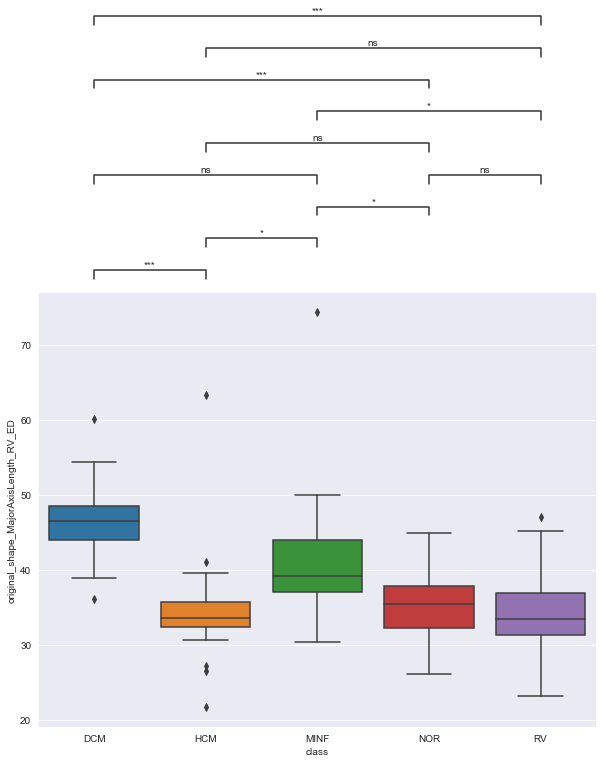

----------   original_shape_Maximum2DDiameterColumn_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM -12.6883  0.001 -19.8548 -5.5218   True
   DCM   MINF  -6.9461 0.0622 -14.1125  0.2204  False
   DCM    NOR -14.0049  0.001 -21.1714 -6.8385   True
   DCM     RV -14.3697  0.001 -21.5362 -7.2032   True
   HCM   MINF   5.7423 0.1782  -1.4242 12.9087  False
   HCM    NOR  -1.3166    0.9  -8.4831  5.8499  False
   HCM     RV  -1.6814    0.9  -8.8479  5.4851  False
  MINF    NOR  -7.0589 0.0557 -14.2254  0.1076  False
  MINF     RV  -7.4237 0.0385 -14.5901 -0.2572   True
   NOR     RV  -0.3648    0.9  -7.5313  6.8017  False
-----------------------------------------------------


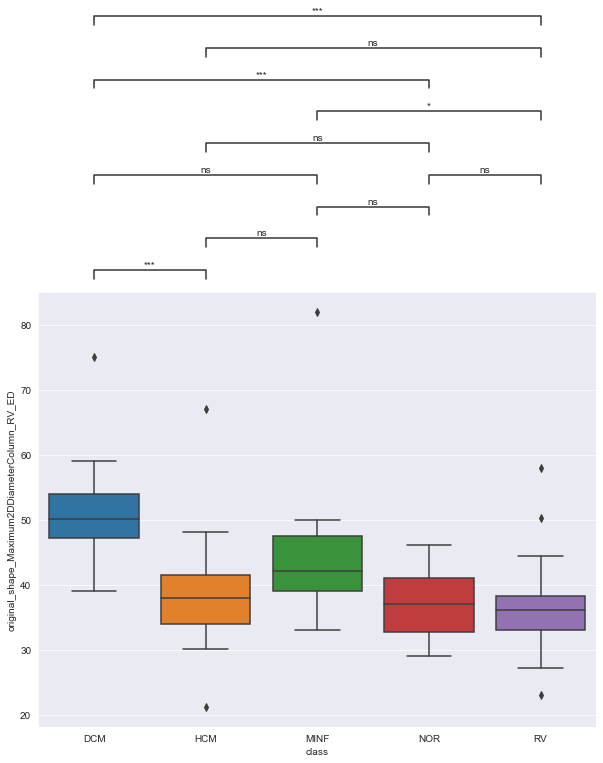

----------   original_shape_Maximum2DDiameterRow_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM -12.7358  0.001 -19.9585  -5.513   True
   DCM   MINF  -6.7904 0.0759 -14.0131  0.4324  False
   DCM    NOR -13.5389  0.001 -20.7617 -6.3162   True
   DCM     RV -14.5441  0.001 -21.7668 -7.3214   True
   HCM   MINF   5.9454 0.1575  -1.2774 13.1681  False
   HCM    NOR  -0.8031    0.9  -8.0259  6.4196  False
   HCM     RV  -1.8083    0.9  -9.0311  5.4144  False
  MINF    NOR  -6.7485 0.0789 -13.9713  0.4742  False
  MINF     RV  -7.7537  0.029 -14.9765  -0.531   True
   NOR     RV  -1.0052    0.9  -8.2279  6.2176  False
-----------------------------------------------------


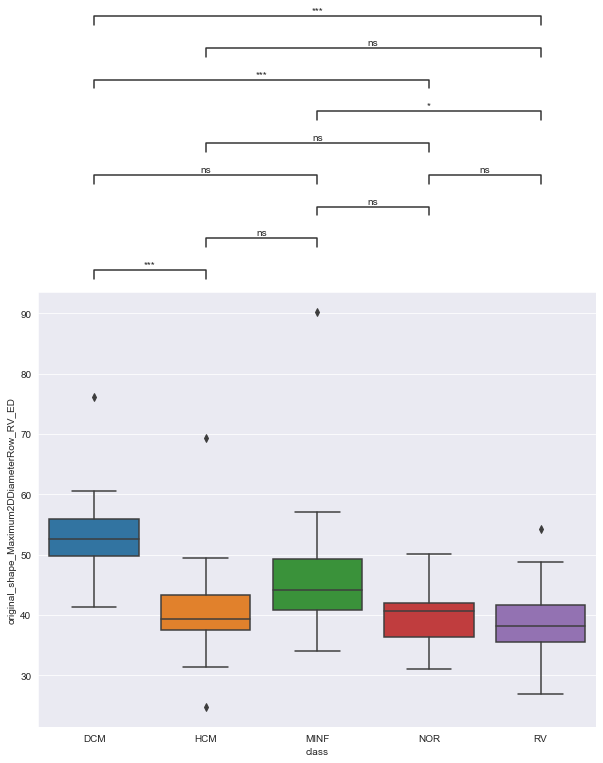

----------   original_shape_Maximum2DDiameterSlice_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM -11.8941  0.001 -18.7471 -5.0411   True
   DCM   MINF  -5.2646 0.2136 -12.1176  1.5884  False
   DCM    NOR  -13.242  0.001  -20.095  -6.389   True
   DCM     RV -13.5213  0.001 -20.3743 -6.6683   True
   HCM   MINF   6.6295  0.063  -0.2235 13.4825  False
   HCM    NOR  -1.3479    0.9  -8.2009  5.5051  False
   HCM     RV  -1.6272    0.9  -8.4802  5.2258  False
  MINF    NOR  -7.9774  0.014 -14.8304 -1.1244   True
  MINF     RV  -8.2567   0.01 -15.1097 -1.4037   True
   NOR     RV  -0.2793    0.9  -7.1323  6.5737  False
-----------------------------------------------------


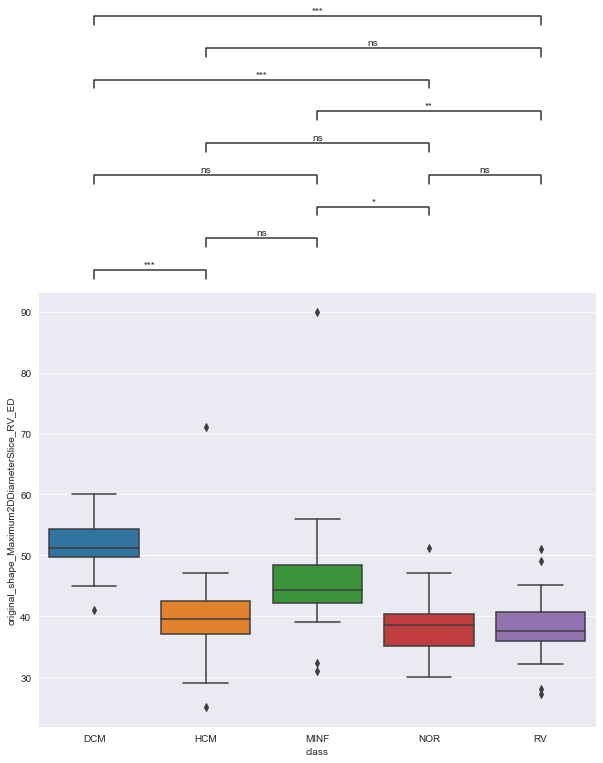

----------   original_shape_Maximum3DDiameter_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM -12.5002  0.001 -20.0044 -4.9959   True
   DCM   MINF  -6.4636 0.1253 -13.9678  1.0407  False
   DCM    NOR -14.1789  0.001 -21.6831 -6.6747   True
   DCM     RV -14.0123  0.001 -21.5166 -6.5081   True
   HCM   MINF   6.0366 0.1751  -1.4676 13.5409  False
   HCM    NOR  -1.6787    0.9   -9.183  5.8255  False
   HCM     RV  -1.5122    0.9  -9.0164  5.9921  False
  MINF    NOR  -7.7153 0.0408 -15.2196 -0.2111   True
  MINF     RV  -7.5488 0.0479  -15.053 -0.0446   True
   NOR     RV   0.1665    0.9  -7.3377  7.6708  False
-----------------------------------------------------


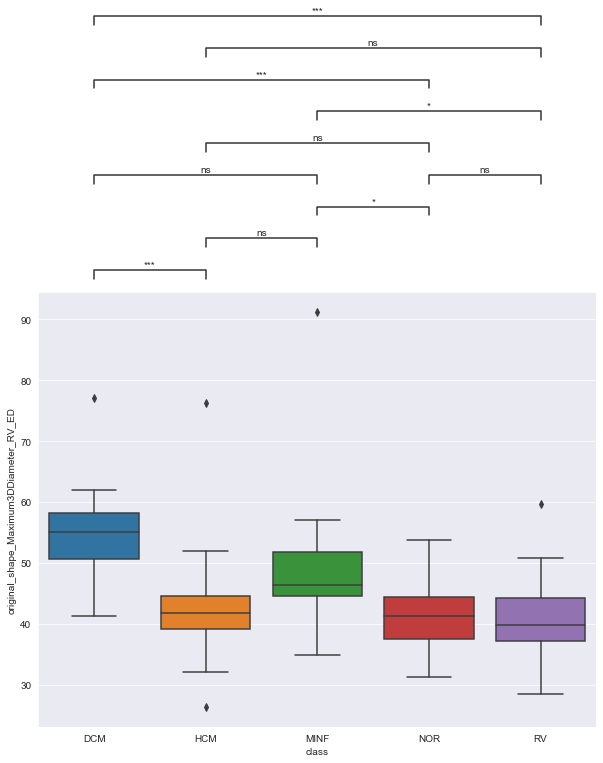

----------   original_shape_MeshVolume_RV_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   DCM    HCM -6043.3229  0.001   -8856.43 -3230.2158   True
   DCM   MINF -4127.1208  0.001 -6940.2279 -1314.0138   True
   DCM    NOR -6665.8375  0.001 -9478.9446 -3852.7304   True
   DCM     RV -5862.5729  0.001   -8675.68 -3049.4658   True
   HCM   MINF  1916.2021 0.3274   -896.905  4729.3092  False
   HCM    NOR  -622.5146    0.9 -3435.6217  2190.5925  False
   HCM     RV     180.75    0.9 -2632.3571  2993.8571  False
  MINF    NOR -2538.7167  0.097 -5351.8237   274.3904  False
  MINF     RV -1735.4521 0.4311 -4548.5592   1077.655  False
   NOR     RV   803.2646    0.9 -2009.8425  3616.3717  False
------------------------------------------------------------


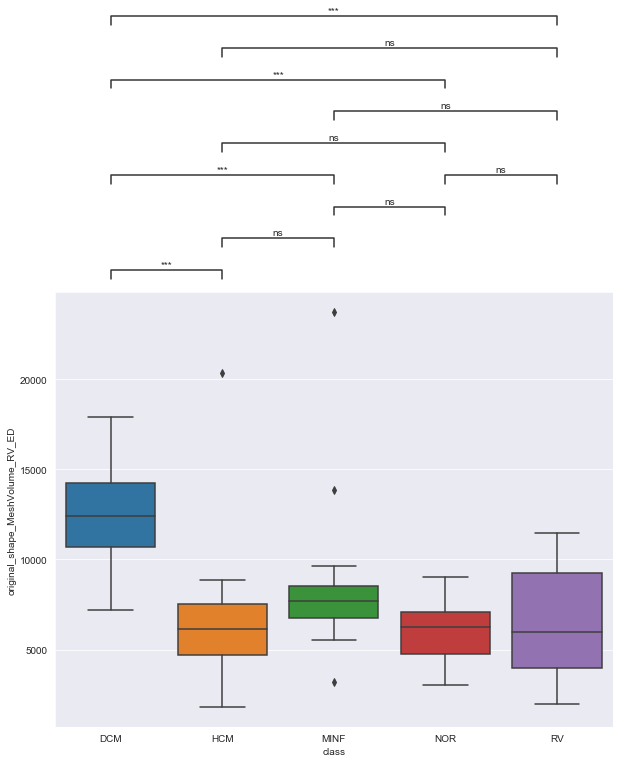

----------   original_shape_MinorAxisLength_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM -11.3652  0.001 -16.7831 -5.9473   True
   DCM   MINF  -5.6049 0.0389 -11.0227  -0.187   True
   DCM    NOR -11.4735  0.001 -16.8914 -6.0556   True
   DCM     RV -13.8047  0.001 -19.2226 -8.3869   True
   HCM   MINF   5.7603 0.0314   0.3425 11.1782   True
   HCM    NOR  -0.1083    0.9  -5.5262  5.3096  False
   HCM     RV  -2.4395 0.6958  -7.8574  2.9783  False
  MINF    NOR  -5.8686 0.0269 -11.2865 -0.4507   True
  MINF     RV  -8.1999  0.001 -13.6178  -2.782   True
   NOR     RV  -2.3313  0.727  -7.7491  3.0866  False
-----------------------------------------------------


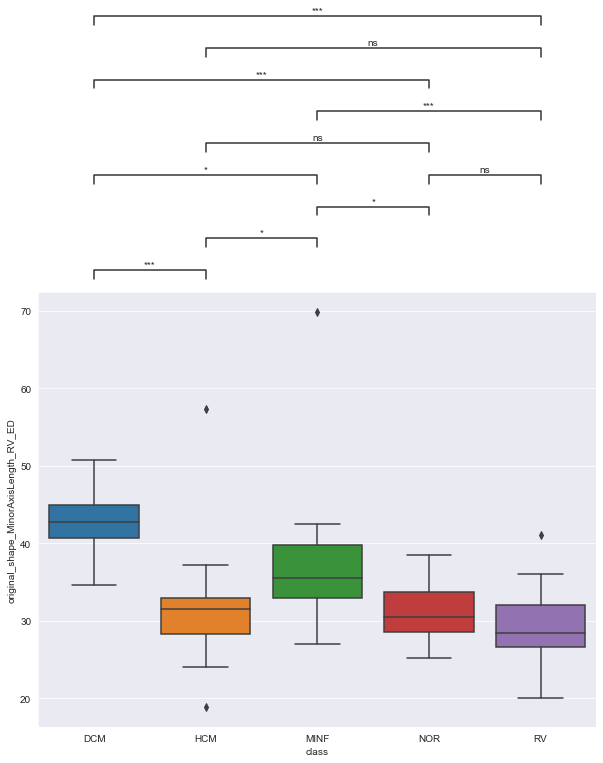

----------   original_shape_SurfaceArea_RV_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   DCM    HCM -2073.3178  0.001 -3503.3403 -643.2953   True
   DCM   MINF -1206.1424 0.1397 -2636.1649  223.8801  False
   DCM    NOR -2455.4175  0.001 -3885.4399 -1025.395   True
   DCM     RV -2187.4964  0.001 -3617.5188 -757.4739   True
   HCM   MINF   867.1754 0.4488  -562.8471 2297.1979  False
   HCM    NOR  -382.0996    0.9 -1812.1221 1047.9228  False
   HCM     RV  -114.1785    0.9  -1544.201 1315.8439  False
  MINF    NOR  -1249.275 0.1166 -2679.2975  180.7475  False
  MINF     RV  -981.3539   0.32 -2411.3764  448.6686  False
   NOR     RV   267.9211    0.9 -1162.1014 1697.9436  False
-----------------------------------------------------------


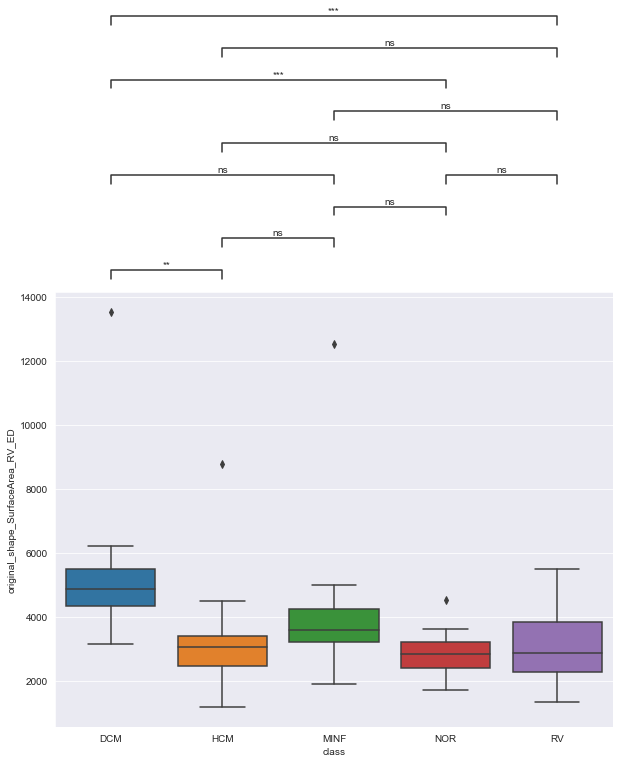

----------   original_shape_SurfaceVolumeRatio_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM    0.091 0.0162  0.0117 0.1704   True
   DCM   MINF   0.0673 0.1364 -0.0121 0.1466  False
   DCM    NOR   0.0702 0.1093 -0.0092 0.1495  False
   DCM     RV   0.0784 0.0543 -0.0009 0.1578  False
   HCM   MINF  -0.0238    0.9 -0.1031 0.0556  False
   HCM    NOR  -0.0209    0.9 -0.1002 0.0585  False
   HCM     RV  -0.0126    0.9 -0.0919 0.0668  False
  MINF    NOR   0.0029    0.9 -0.0765 0.0823  False
  MINF     RV   0.0112    0.9 -0.0682 0.0906  False
   NOR     RV   0.0083    0.9 -0.0711 0.0877  False
---------------------------------------------------


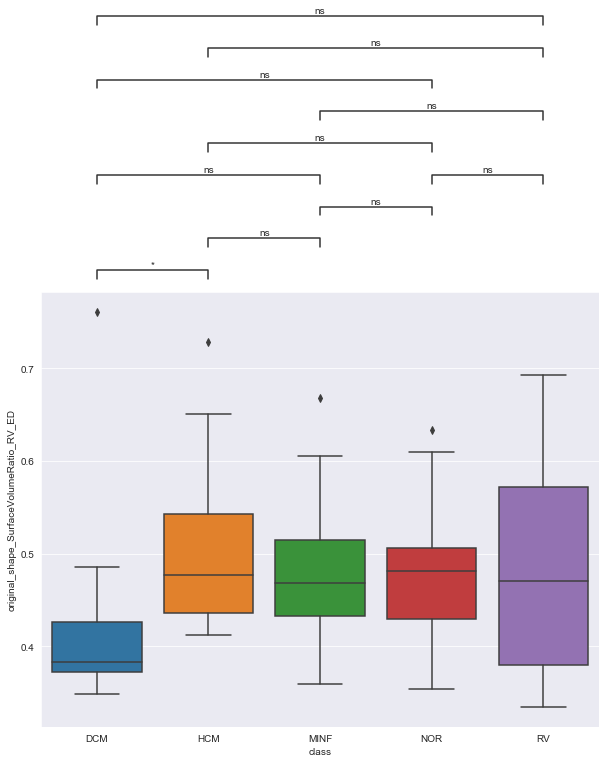

----------   original_shape_VoxelVolume_RV_ED --------- 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower      upper    reject
----------------------------------------------------------
   DCM    HCM -6052.65  0.001 -8871.4847 -3233.8153   True
   DCM   MINF  -4132.6  0.001 -6951.4347 -1313.7653   True
   DCM    NOR  -6678.1  0.001 -9496.9347 -3859.2653   True
   DCM     RV -5871.95  0.001 -8690.7847 -3053.1153   True
   HCM   MINF  1920.05 0.3275  -898.7847  4738.8847  False
   HCM    NOR  -625.45    0.9 -3444.2847  2193.3847  False
   HCM     RV    180.7    0.9 -2638.1347  2999.5347  False
  MINF    NOR  -2545.5 0.0967 -5364.3347   273.3347  False
  MINF     RV -1739.35 0.4309 -4558.1847  1079.4847  False
   NOR     RV   806.15    0.9 -2012.6847  3624.9847  False
----------------------------------------------------------


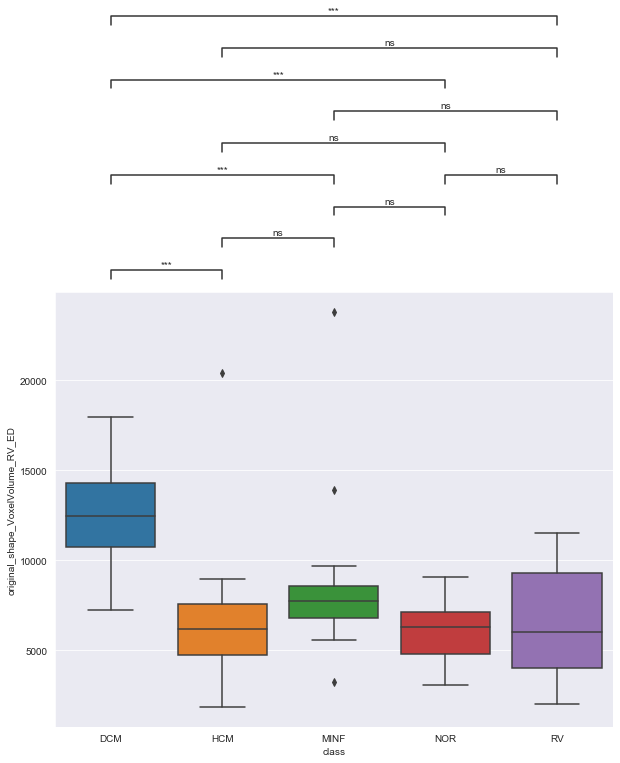

----------   original_firstorder_Energy_RV_ED --------- 

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
group1 group2    meandiff   p-adj       lower          upper      reject
------------------------------------------------------------------------
   DCM    HCM -316929285.95 0.2847 -762471520.9904 128612949.0904  False
   DCM   MINF  -418441705.5 0.0764 -863983940.5404  27100529.5404  False
   DCM    NOR -269869258.25 0.4499 -715411493.2904 175672976.7904  False
   DCM     RV -509905516.65 0.0165 -955447751.6904 -64363281.6096   True
   HCM   MINF -101512419.55    0.9 -547054654.5904 344029815.4904  False
   HCM    NOR    47060027.7    0.9 -398482207.3404 492602262.7404  False
   HCM     RV  -192976230.7 0.7225 -638518465.7404 252566004.3404  False
  MINF    NOR  148572447.25 0.8781 -296969787.7904 594114682.2904  False
  MINF     RV  -91463811.15    0.9 -537006046.1904 354078423.8904  False
   NOR     RV  -240036258.4 0.5577 -685578493.4404 205505976.6404 

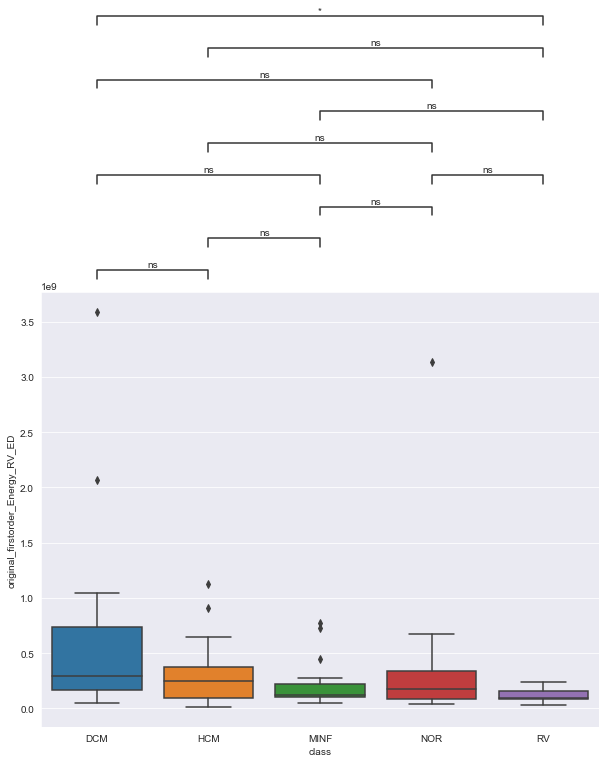

----------   original_firstorder_Entropy_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.3753 0.4459 -0.2419  0.9925  False
   DCM   MINF  -0.3097 0.6154 -0.9269  0.3075  False
   DCM    NOR   0.0158    0.9 -0.6014   0.633  False
   DCM     RV  -0.4214 0.3249 -1.0386  0.1957  False
   HCM   MINF   -0.685 0.0218 -1.3022 -0.0678   True
   HCM    NOR  -0.3595 0.4888 -0.9767  0.2577  False
   HCM     RV  -0.7967 0.0047 -1.4139 -0.1795   True
  MINF    NOR   0.3255 0.5754 -0.2917  0.9427  False
  MINF     RV  -0.1117    0.9 -0.7289  0.5054  False
   NOR     RV  -0.4372 0.2887 -1.0544  0.1799  False
----------------------------------------------------


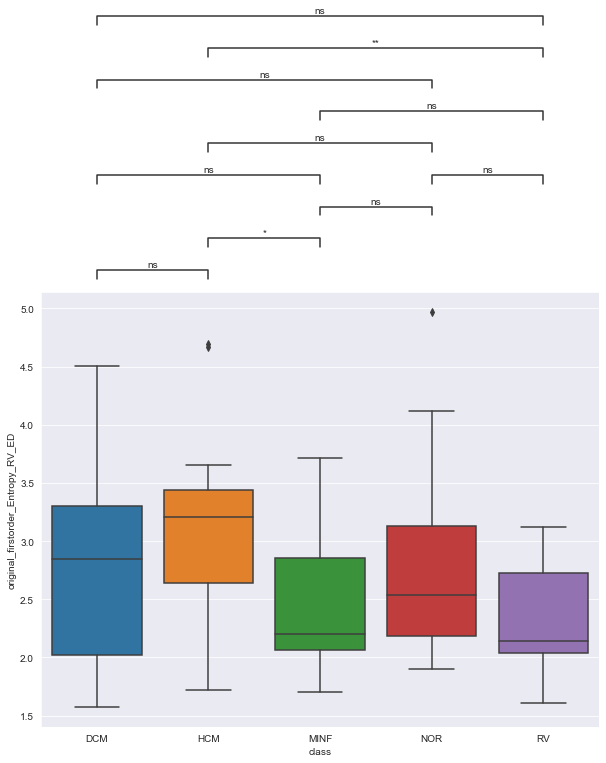

----------   original_firstorder_InterquartileRange_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   DCM    HCM     37.9 0.0661  -1.5611  77.3611  False
   DCM   MINF    -17.3 0.7143 -56.7611  22.1611  False
   DCM    NOR     3.35    0.9 -36.1111  42.8111  False
   DCM     RV -21.9875 0.5289 -61.4486  17.4736  False
   HCM   MINF    -55.2 0.0017 -94.6611 -15.7389   True
   HCM    NOR   -34.55 0.1152 -74.0111   4.9111  False
   HCM     RV -59.8875  0.001 -99.3486 -20.4264   True
  MINF    NOR    20.65 0.5818 -18.8111  60.1111  False
  MINF     RV  -4.6875    0.9 -44.1486  34.7736  False
   NOR     RV -25.3375 0.3892 -64.7986  14.1236  False
------------------------------------------------------


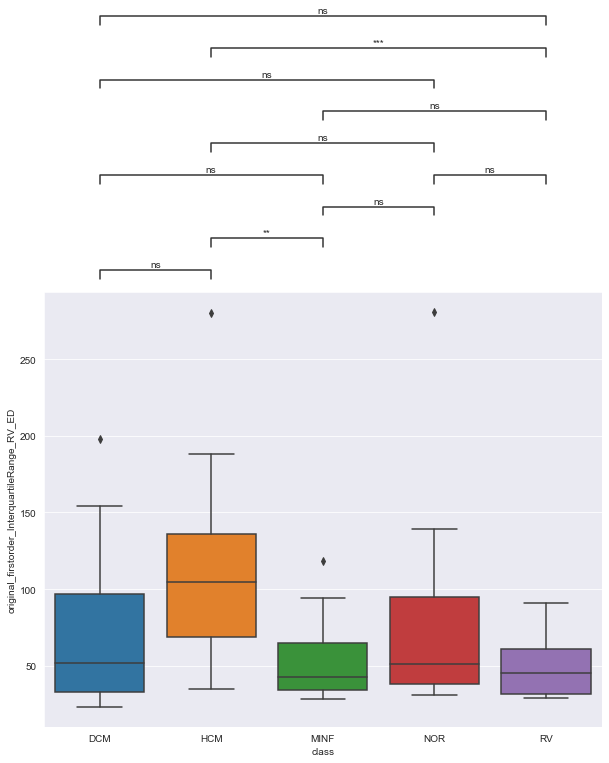

----------   original_firstorder_Kurtosis_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.7108  0.001 -1.1444 -0.2773   True
   DCM   MINF  -0.2649  0.441 -0.6984  0.1686  False
   DCM    NOR  -0.1193    0.9 -0.5529  0.3142  False
   DCM     RV  -0.2242 0.5914 -0.6577  0.2093  False
   HCM   MINF    0.446 0.0406  0.0124  0.8795   True
   HCM    NOR   0.5915 0.0024   0.158   1.025   True
   HCM     RV   0.4867 0.0197  0.0531  0.9202   True
  MINF    NOR   0.1455 0.8746  -0.288   0.579  False
  MINF     RV   0.0407    0.9 -0.3928  0.4742  False
   NOR     RV  -0.1048    0.9 -0.5383  0.3287  False
----------------------------------------------------


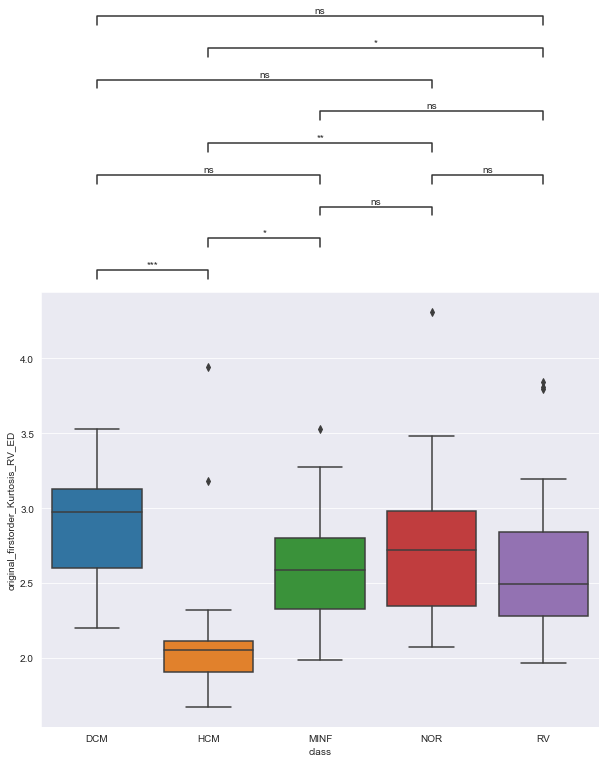

----------   original_firstorder_MeanAbsoluteDeviation_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM   15.124 0.3561  -7.7016 37.9496  False
   DCM   MINF -12.3476 0.5542 -35.1732  10.478  False
   DCM    NOR    0.023    0.9 -22.8026 22.8486  False
   DCM     RV -15.7982 0.3116 -38.6238  7.0274  False
   HCM   MINF -27.4716 0.0101 -50.2972  -4.646   True
   HCM    NOR  -15.101 0.3577 -37.9266  7.7246  False
   HCM     RV -30.9222 0.0026 -53.7478 -8.0966   True
  MINF    NOR  12.3706 0.5527  -10.455 35.1961  False
  MINF     RV  -3.4506    0.9 -26.2762  19.375  False
   NOR     RV -15.8212 0.3101 -38.6468  7.0044  False
-----------------------------------------------------


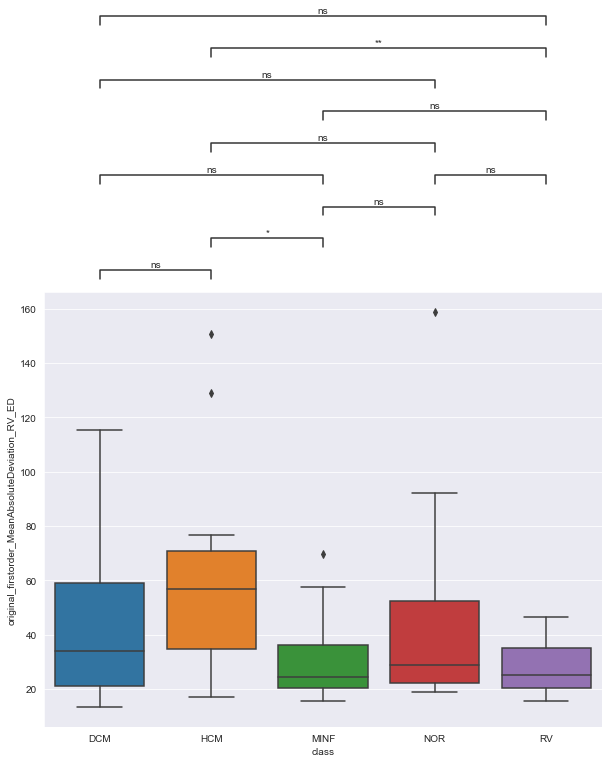

----------   original_firstorder_Range_RV_ED --------- 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   DCM    HCM    20.05    0.9 -151.9758 192.0758  False
   DCM   MINF   -108.8 0.4051 -280.8258  63.2258  False
   DCM    NOR   -13.45    0.9 -185.4758 158.5758  False
   DCM     RV   -133.1 0.2074 -305.1258  38.9258  False
   HCM   MINF  -128.85 0.2361 -300.8758  43.1758  False
   HCM    NOR    -33.5    0.9 -205.5258 138.5258  False
   HCM     RV  -153.15  0.105 -325.1758  18.8758  False
  MINF    NOR    95.35 0.5334  -76.6758 267.3758  False
  MINF     RV    -24.3    0.9 -196.3258 147.7258  False
   NOR     RV  -119.65 0.3067 -291.6758  52.3758  False
-------------------------------------------------------


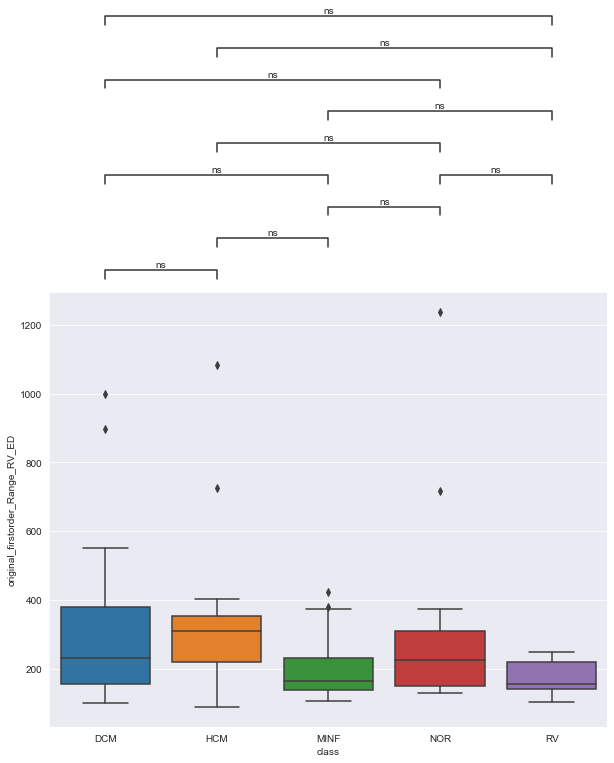

----------   original_firstorder_RobustMeanAbsoluteDeviation_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  14.4711 0.1166  -2.0938  31.036  False
   DCM   MINF  -7.8978 0.6544 -24.4626  8.6671  False
   DCM    NOR   0.6372    0.9 -15.9277 17.2021  False
   DCM     RV  -9.9706 0.4563 -26.5355  6.5943  False
   HCM   MINF -22.3689 0.0027 -38.9338  -5.804   True
   HCM    NOR -13.8339 0.1468 -30.3988  2.7309  False
   HCM     RV -24.4417  0.001 -41.0066 -7.8768   True
  MINF    NOR    8.535 0.5944  -8.0299 25.0998  False
  MINF     RV  -2.0728    0.9 -18.6377 14.4921  False
   NOR     RV -10.6078  0.392 -27.1726  5.9571  False
-----------------------------------------------------


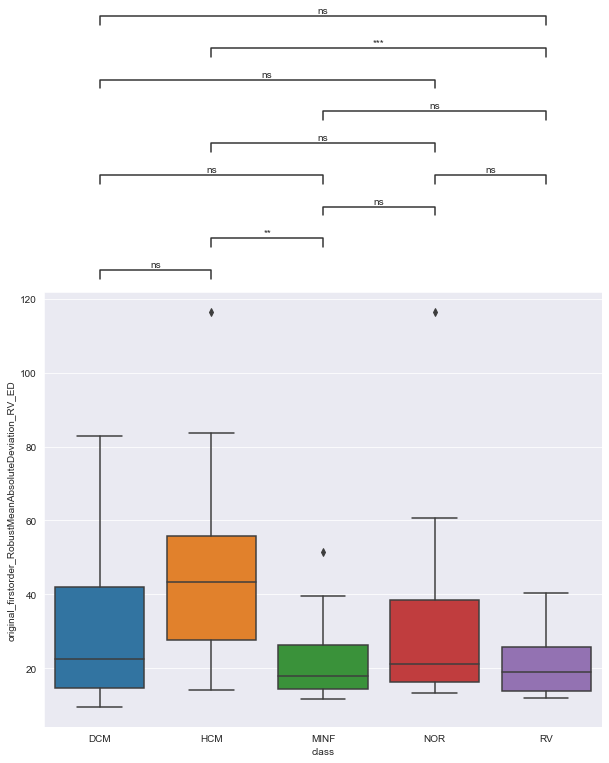

----------   original_firstorder_TotalEnergy_RV_ED --------- 

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
group1 group2    meandiff   p-adj       lower          upper      reject
------------------------------------------------------------------------
   DCM    HCM -316929285.95 0.2847 -762471520.9904 128612949.0904  False
   DCM   MINF  -418441705.5 0.0764 -863983940.5404  27100529.5404  False
   DCM    NOR -269869258.25 0.4499 -715411493.2904 175672976.7904  False
   DCM     RV -509905516.65 0.0165 -955447751.6904 -64363281.6096   True
   HCM   MINF -101512419.55    0.9 -547054654.5904 344029815.4904  False
   HCM    NOR    47060027.7    0.9 -398482207.3404 492602262.7404  False
   HCM     RV  -192976230.7 0.7225 -638518465.7404 252566004.3404  False
  MINF    NOR  148572447.25 0.8781 -296969787.7904 594114682.2904  False
  MINF     RV  -91463811.15    0.9 -537006046.1904 354078423.8904  False
   NOR     RV  -240036258.4 0.5577 -685578493.4404 205505976.

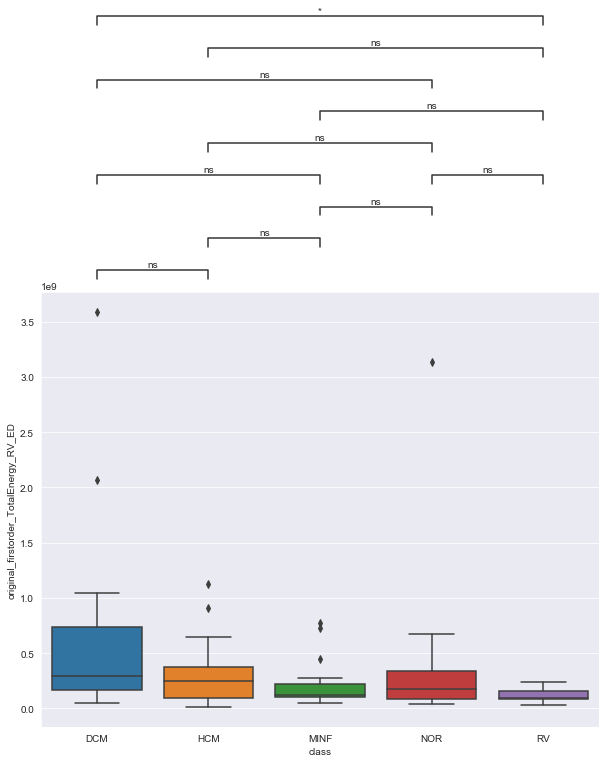

----------   original_firstorder_Uniformity_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0602 0.1395 -0.1315 0.0111  False
   DCM   MINF   0.0194    0.9 -0.0519 0.0907  False
   DCM    NOR  -0.0127    0.9  -0.084 0.0586  False
   DCM     RV   0.0327 0.6834 -0.0386  0.104  False
   HCM   MINF   0.0796 0.0207  0.0083 0.1509   True
   HCM    NOR   0.0474 0.3523 -0.0239 0.1187  False
   HCM     RV   0.0928 0.0042  0.0215 0.1641   True
  MINF    NOR  -0.0322 0.6943 -0.1035 0.0391  False
  MINF     RV   0.0132    0.9 -0.0581 0.0845  False
   NOR     RV   0.0454 0.3979 -0.0259 0.1167  False
---------------------------------------------------


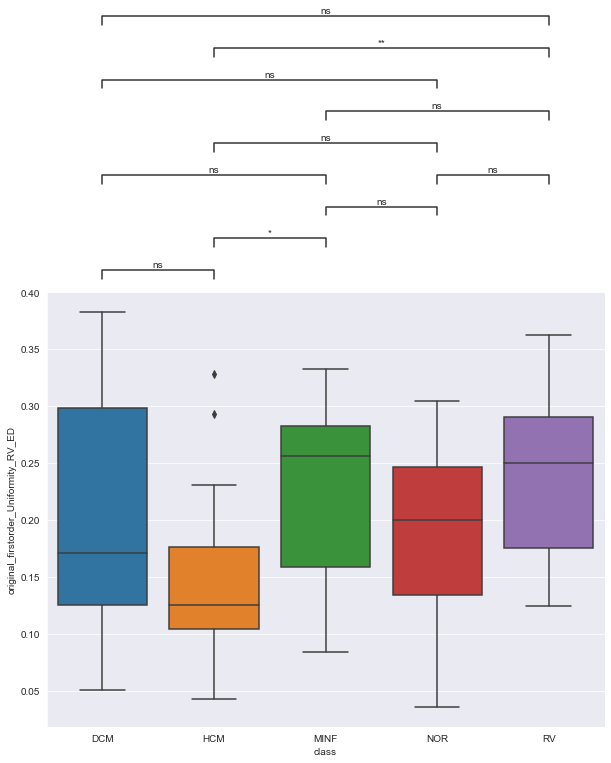

----------   original_firstorder_Variance_RV_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper   reject
------------------------------------------------------------
   DCM    HCM  2344.6512 0.6983  -2881.3024 7570.6048  False
   DCM   MINF  -2305.569   0.71  -7531.5226 2920.3846  False
   DCM    NOR    317.212    0.9  -4908.7416 5543.1656  False
   DCM     RV  -2855.397 0.5458  -8081.3506 2370.5566  False
   HCM   MINF -4650.2202 0.1052  -9876.1738  575.7334  False
   HCM    NOR -2027.4392  0.793  -7253.3928 3198.5144  False
   HCM     RV -5200.0482 0.0518 -10426.0018   25.9054  False
  MINF    NOR   2622.781 0.6152  -2603.1726 7848.7346  False
  MINF     RV   -549.828    0.9  -5775.7816 4676.1256  False
   NOR     RV  -3172.609 0.4476  -8398.5626 2053.3446  False
------------------------------------------------------------


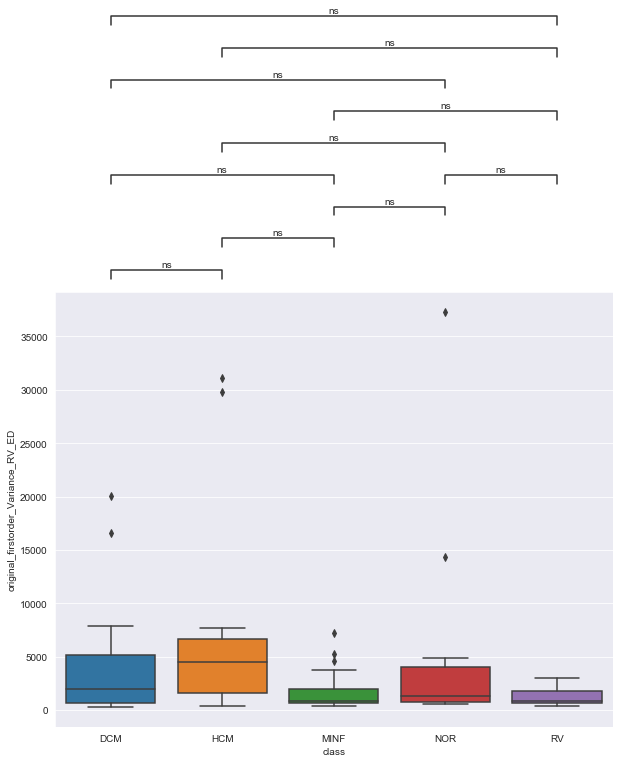

----------   original_glcm_ClusterTendency_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM   12.787 0.6236 -12.9656 38.5396  False
   DCM   MINF  -11.573 0.6971 -37.3256 14.1796  False
   DCM    NOR    0.722    0.9 -25.0306 26.4747  False
   DCM     RV -13.7955 0.5625 -39.5481 11.9571  False
   HCM   MINF   -24.36  0.073 -50.1126  1.3926  False
   HCM    NOR  -12.065 0.6673 -37.8176 13.6877  False
   HCM     RV -26.5825 0.0396 -52.3351 -0.8299   True
  MINF    NOR   12.295 0.6534 -13.4576 38.0477  False
  MINF     RV  -2.2225    0.9 -27.9751 23.5301  False
   NOR     RV -14.5175 0.5187 -40.2702 11.2351  False
-----------------------------------------------------


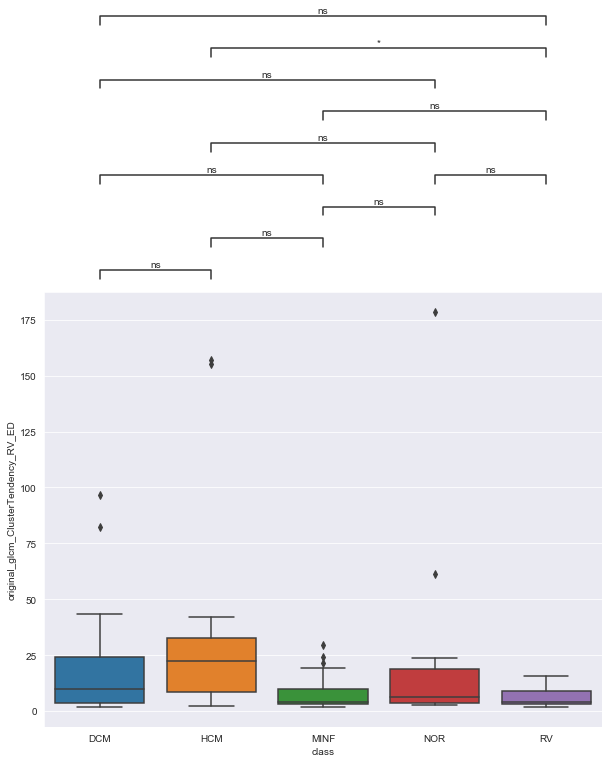

----------   original_glcm_Contrast_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM   3.4144 0.5747  -3.0544  9.8832  False
   DCM   MINF  -2.8666 0.7069  -9.3354  3.6022  False
   DCM    NOR  -0.0671    0.9  -6.5359  6.4017  False
   DCM     RV  -3.3926   0.58  -9.8614  3.0762  False
   HCM   MINF  -6.2811 0.0615 -12.7499  0.1877  False
   HCM    NOR  -3.4815 0.5585  -9.9503  2.9873  False
   HCM     RV   -6.807 0.0341 -13.2758 -0.3382   True
  MINF    NOR   2.7996 0.7231  -3.6693  9.2684  False
  MINF     RV  -0.5259    0.9  -6.9947  5.9429  False
   NOR     RV  -3.3255 0.5962  -9.7943  3.1433  False
-----------------------------------------------------


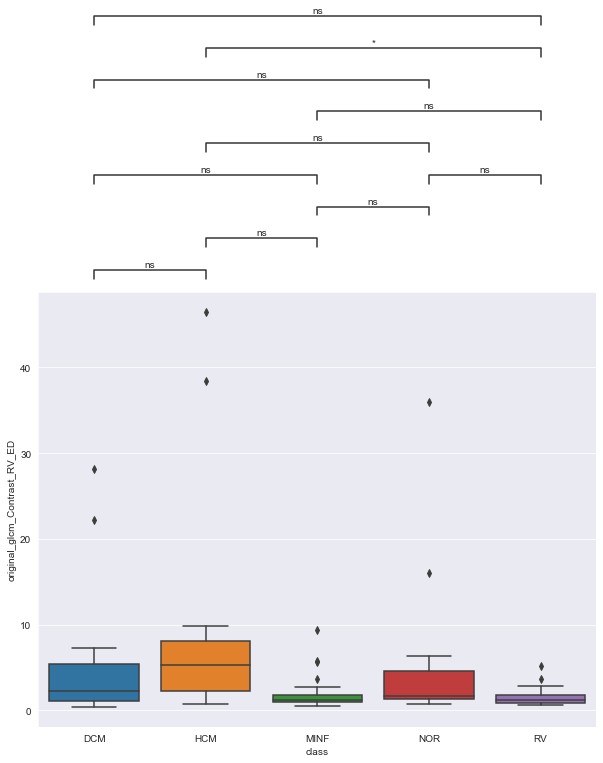

----------   original_glcm_DifferenceAverage_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.4645 0.3305 -0.2195  1.1485  False
   DCM   MINF  -0.3536 0.5917 -1.0376  0.3304  False
   DCM    NOR   0.0377    0.9 -0.6463  0.7217  False
   DCM     RV  -0.4189 0.4388 -1.1029  0.2652  False
   HCM   MINF  -0.8181 0.0107 -1.5021 -0.1341   True
   HCM    NOR  -0.4269 0.4191 -1.1109  0.2571  False
   HCM     RV  -0.8834 0.0047 -1.5674 -0.1994   True
  MINF    NOR   0.3913 0.5058 -0.2927  1.0753  False
  MINF     RV  -0.0653    0.9 -0.7493  0.6188  False
   NOR     RV  -0.4565 0.3486 -1.1405  0.2275  False
----------------------------------------------------


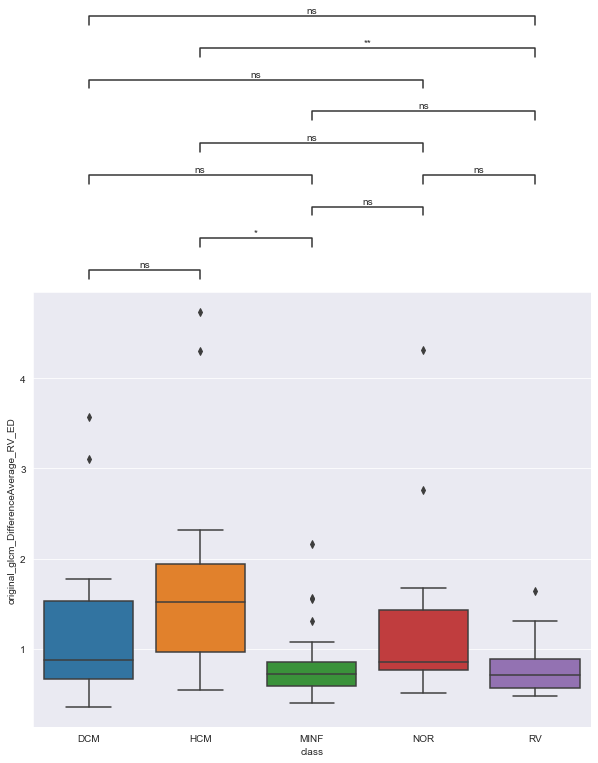

----------   original_glcm_DifferenceEntropy_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.3353  0.273 -0.1304  0.8011  False
   DCM   MINF  -0.3018 0.3794 -0.7676  0.1639  False
   DCM    NOR   0.0345    0.9 -0.4313  0.5002  False
   DCM     RV  -0.3304 0.2874 -0.7961  0.1354  False
   HCM   MINF  -0.6372 0.0023 -1.1029 -0.1714   True
   HCM    NOR  -0.3009 0.3829 -0.7666  0.1649  False
   HCM     RV  -0.6657 0.0013 -1.1315    -0.2   True
  MINF    NOR   0.3363 0.2702 -0.1294  0.8021  False
  MINF     RV  -0.0285    0.9 -0.4943  0.4372  False
   NOR     RV  -0.3649 0.1968 -0.8306  0.1009  False
----------------------------------------------------


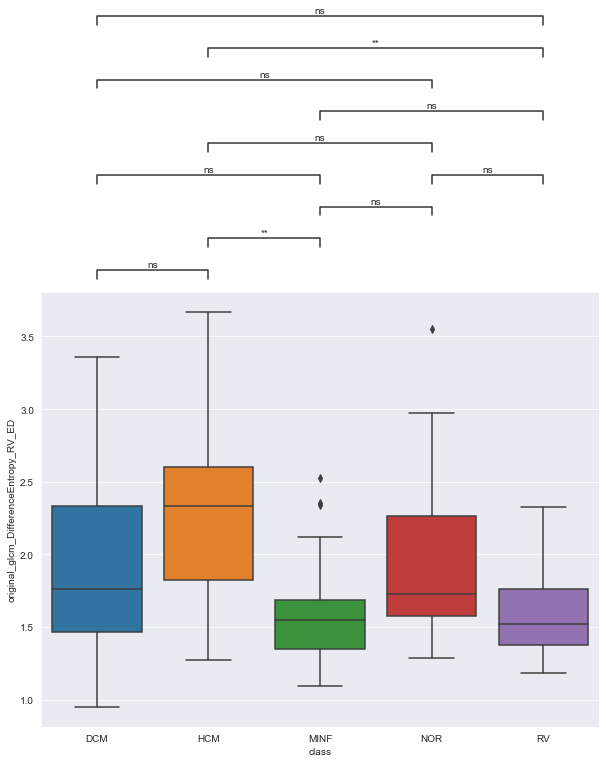

----------   original_glcm_DifferenceVariance_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM    1.385   0.69 -1.6661  4.4361  False
   DCM   MINF  -1.6057 0.5771 -4.6568  1.4453  False
   DCM    NOR  -0.2717    0.9 -3.3228  2.7793  False
   DCM     RV  -1.8585 0.4442 -4.9096  1.1926  False
   HCM   MINF  -2.9907 0.0576 -6.0418  0.0603  False
   HCM    NOR  -1.6567  0.551 -4.7078  1.3943  False
   HCM     RV  -3.2435 0.0314 -6.2946 -0.1924   True
  MINF    NOR    1.334 0.7161 -1.7171  4.3851  False
  MINF     RV  -0.2528    0.9 -3.3038  2.7983  False
   NOR     RV  -1.5868 0.5868 -4.6378  1.4643  False
----------------------------------------------------


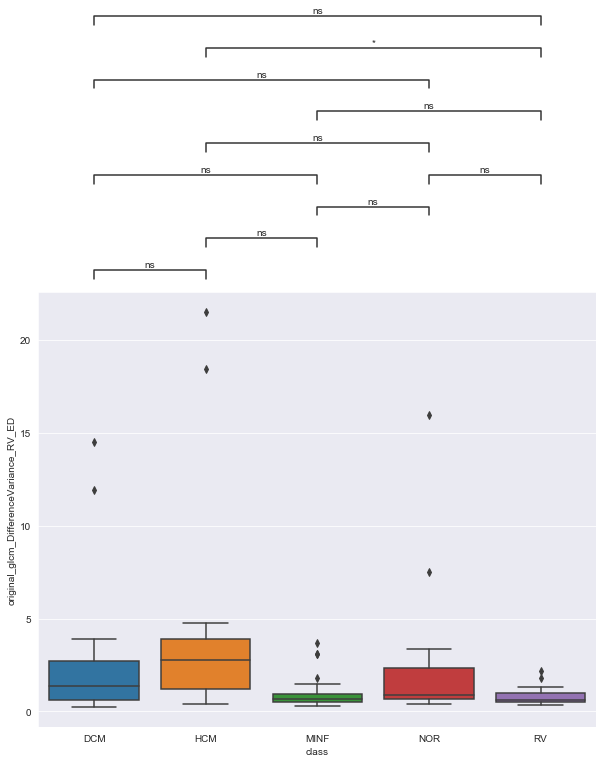

----------   original_glcm_Id_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0736 0.1589 -0.1633  0.016  False
   DCM   MINF   0.0445 0.6229 -0.0451 0.1342  False
   DCM    NOR  -0.0173    0.9 -0.1069 0.0723  False
   DCM     RV    0.049 0.5451 -0.0406 0.1386  False
   HCM   MINF   0.1182 0.0036  0.0286 0.2078   True
   HCM    NOR   0.0563 0.4118 -0.0333 0.1459  False
   HCM     RV   0.1226 0.0023   0.033 0.2123   True
  MINF    NOR  -0.0619 0.3143 -0.1515 0.0278  False
  MINF     RV   0.0045    0.9 -0.0851 0.0941  False
   NOR     RV   0.0663  0.247 -0.0233 0.1559  False
---------------------------------------------------


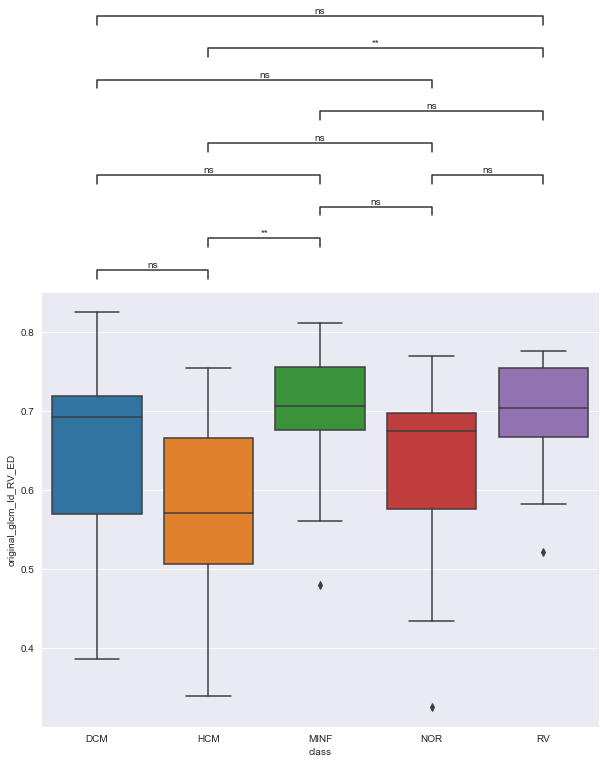

----------   original_glcm_Idm_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0869 0.1588 -0.1926 0.0188  False
   DCM   MINF   0.0528 0.6188 -0.0529 0.1585  False
   DCM    NOR  -0.0196    0.9 -0.1253 0.0861  False
   DCM     RV   0.0585 0.5345 -0.0472 0.1642  False
   HCM   MINF   0.1397 0.0035   0.034 0.2454   True
   HCM    NOR   0.0673  0.398 -0.0384  0.173  False
   HCM     RV   0.1454 0.0021  0.0397 0.2511   True
  MINF    NOR  -0.0724 0.3223 -0.1781 0.0333  False
  MINF     RV   0.0057    0.9    -0.1 0.1114  False
   NOR     RV   0.0781 0.2487 -0.0276 0.1838  False
---------------------------------------------------


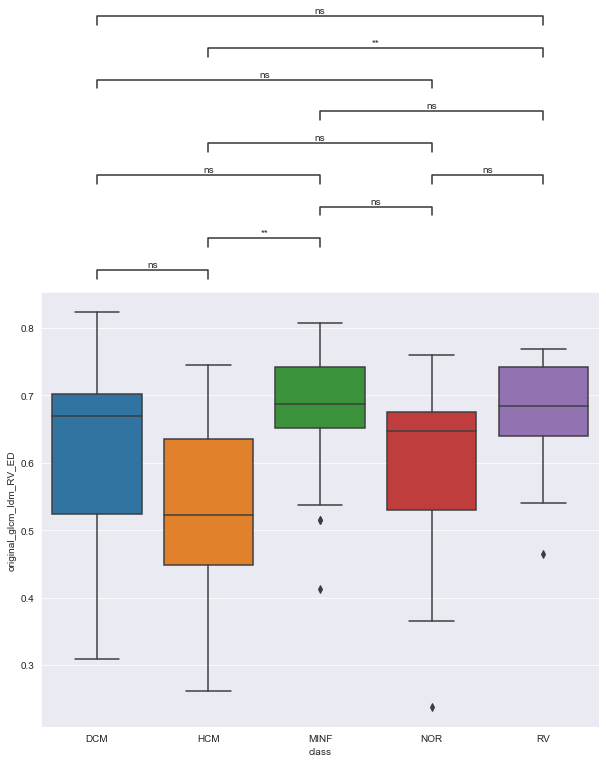

----------   original_glcm_Idmn_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.0075 0.0013 -0.0127 -0.0022   True
   DCM   MINF     -0.0    0.9 -0.0052  0.0052  False
   DCM    NOR  -0.0013    0.9 -0.0066  0.0039  False
   DCM     RV  -0.0009    0.9 -0.0061  0.0044  False
   HCM   MINF   0.0075 0.0013  0.0022  0.0127   True
   HCM    NOR   0.0062 0.0126  0.0009  0.0114   True
   HCM     RV   0.0066  0.006  0.0014  0.0118   True
  MINF    NOR  -0.0013    0.9 -0.0065  0.0039  False
  MINF     RV  -0.0009    0.9 -0.0061  0.0044  False
   NOR     RV   0.0004    0.9 -0.0048  0.0057  False
----------------------------------------------------


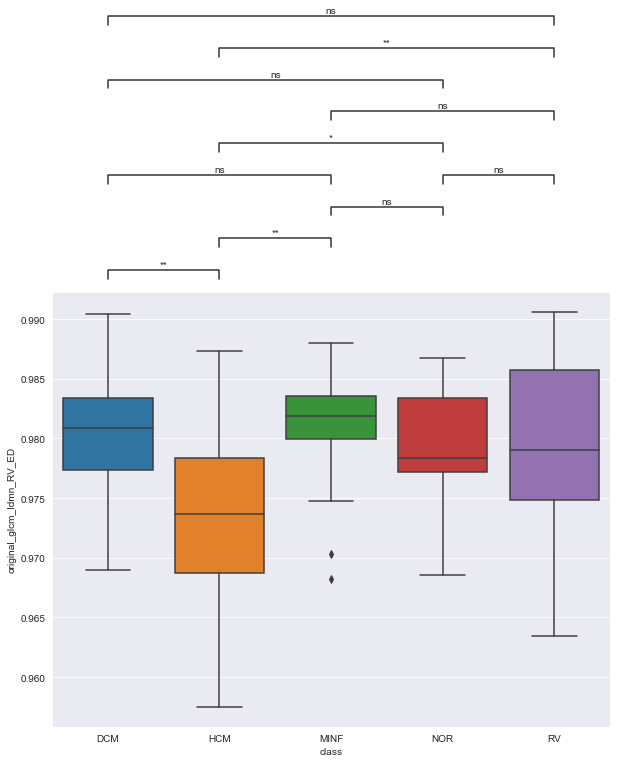

----------   original_glcm_Idn_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.0182  0.001  -0.029 -0.0073   True
   DCM   MINF  -0.0011    0.9  -0.012  0.0098  False
   DCM    NOR   -0.006 0.5353 -0.0169  0.0049  False
   DCM     RV  -0.0036 0.8837 -0.0145  0.0073  False
   HCM   MINF   0.0171  0.001  0.0062   0.028   True
   HCM    NOR   0.0122 0.0203  0.0013   0.023   True
   HCM     RV   0.0146 0.0029  0.0037  0.0255   True
  MINF    NOR  -0.0049  0.692 -0.0158  0.0059  False
  MINF     RV  -0.0025    0.9 -0.0134  0.0084  False
   NOR     RV   0.0024    0.9 -0.0084  0.0133  False
----------------------------------------------------


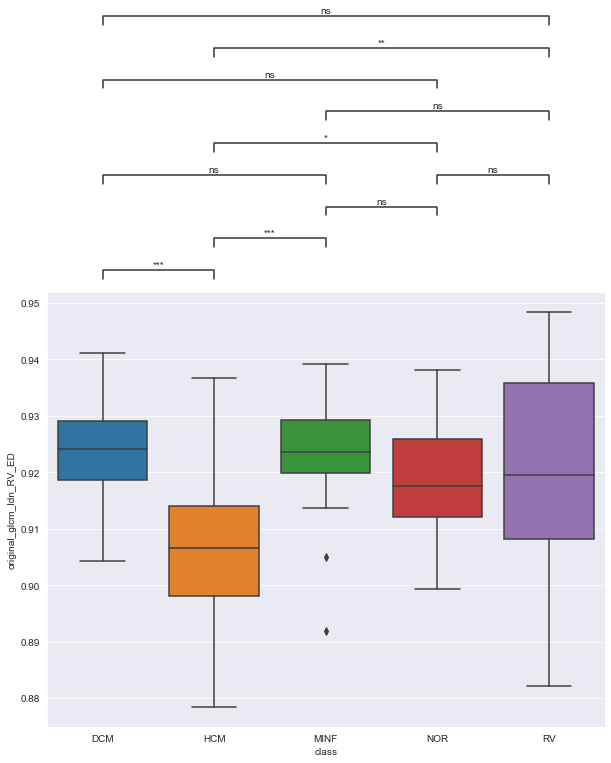

----------   original_glcm_Imc1_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM    0.018 0.6117 -0.0178  0.0538  False
   DCM   MINF   -0.018 0.6121 -0.0538  0.0178  False
   DCM    NOR   0.0219 0.4384 -0.0139  0.0577  False
   DCM     RV   0.0017    0.9 -0.0341  0.0375  False
   HCM   MINF  -0.0361 0.0472 -0.0719 -0.0003   True
   HCM    NOR   0.0039    0.9 -0.0319  0.0397  False
   HCM     RV  -0.0163 0.6873 -0.0521  0.0195  False
  MINF    NOR     0.04 0.0207  0.0042  0.0758   True
  MINF     RV   0.0198 0.5366  -0.016  0.0556  False
   NOR     RV  -0.0202  0.518  -0.056  0.0156  False
----------------------------------------------------


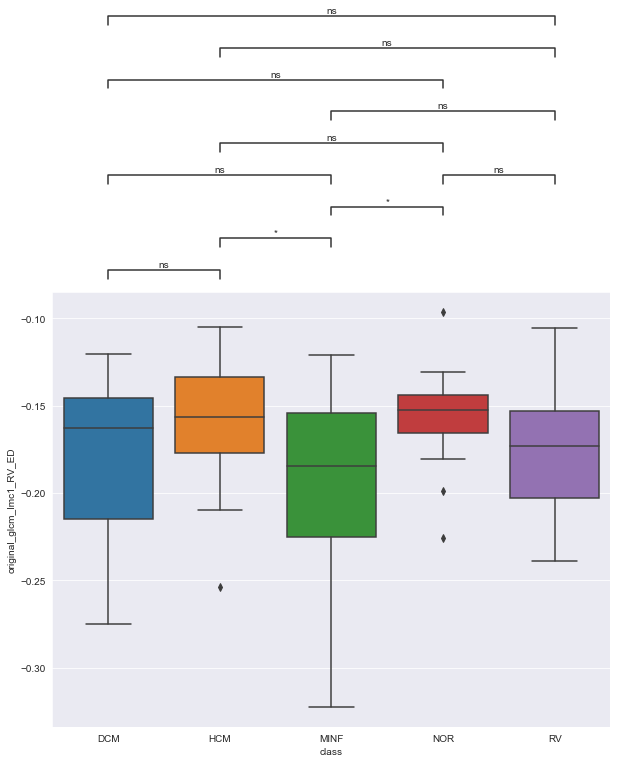

----------   original_glcm_JointAverage_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.4631    0.9 -2.5245 3.4507  False
   DCM   MINF  -1.9732 0.3595 -4.9608 1.0144  False
   DCM    NOR  -0.4985    0.9 -3.4861 2.4891  False
   DCM     RV  -2.3181 0.2049 -5.3057 0.6695  False
   HCM   MINF  -2.4363 0.1647 -5.4239 0.5513  False
   HCM    NOR  -0.9616 0.8962 -3.9492  2.026  False
   HCM     RV  -2.7812 0.0808 -5.7688 0.2064  False
  MINF    NOR   1.4747 0.6282 -1.5129 4.4622  False
  MINF     RV  -0.3449    0.9 -3.3325 2.6427  False
   NOR     RV  -1.8196 0.4443 -4.8072  1.168  False
---------------------------------------------------


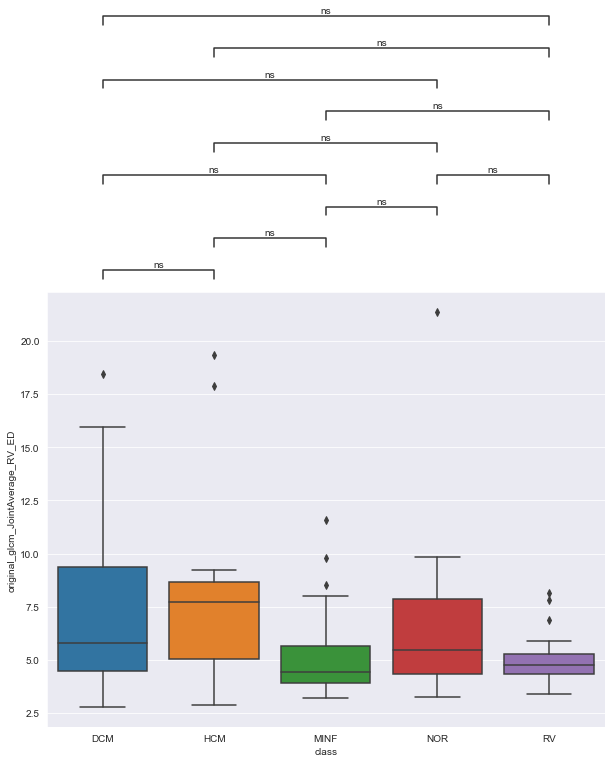

----------   original_glcm_JointEnergy_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.0447 0.0431 -0.0885 -0.0009   True
   DCM   MINF   0.0048    0.9  -0.039  0.0486  False
   DCM    NOR  -0.0171 0.7911 -0.0609  0.0268  False
   DCM     RV   0.0131    0.9 -0.0307  0.0569  False
   HCM   MINF   0.0495 0.0185  0.0057  0.0933   True
   HCM    NOR   0.0277 0.4071 -0.0162  0.0715  False
   HCM     RV   0.0578 0.0036   0.014  0.1016   True
  MINF    NOR  -0.0219 0.6195 -0.0657  0.0219  False
  MINF     RV   0.0083    0.9 -0.0356  0.0521  False
   NOR     RV   0.0301 0.3182 -0.0137  0.0739  False
----------------------------------------------------


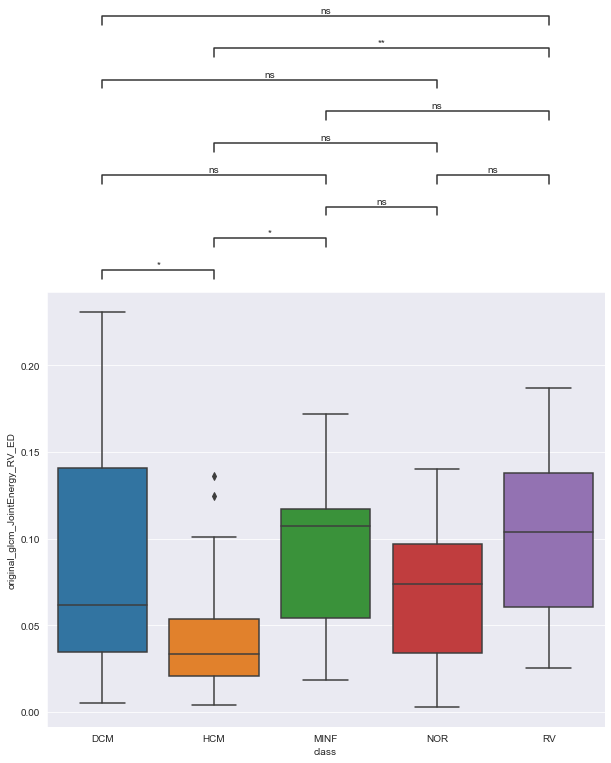

----------   original_glcm_JointEntropy_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.8024 0.3052 -0.3494  1.9541  False
   DCM   MINF  -0.6039 0.5802 -1.7557  0.5479  False
   DCM    NOR   0.0736    0.9 -1.0782  1.2254  False
   DCM     RV  -0.7562 0.3658  -1.908  0.3956  False
   HCM   MINF  -1.4063 0.0087  -2.558 -0.2545   True
   HCM    NOR  -0.7288 0.4046 -1.8806   0.423  False
   HCM     RV  -1.5586 0.0026 -2.7103 -0.4068   True
  MINF    NOR   0.6775 0.4793 -0.4743  1.8292  False
  MINF     RV  -0.1523    0.9 -1.3041  0.9995  False
   NOR     RV  -0.8298 0.2724 -1.9815   0.322  False
----------------------------------------------------


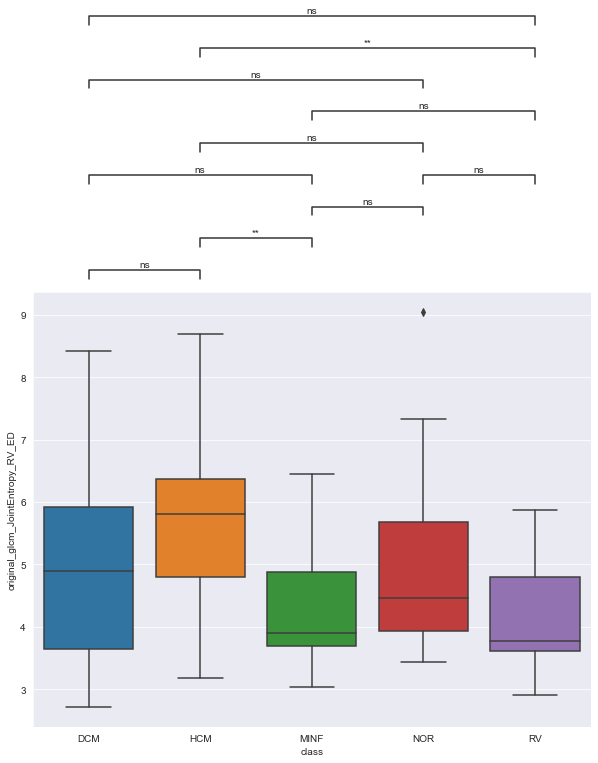

----------   original_glcm_MaximumProbability_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.0805 0.0447 -0.1598 -0.0012   True
   DCM   MINF    0.005    0.9 -0.0743  0.0843  False
   DCM    NOR   -0.021    0.9 -0.1003  0.0582  False
   DCM     RV    0.033 0.7496 -0.0463  0.1122  False
   HCM   MINF   0.0855 0.0279  0.0062  0.1648   True
   HCM    NOR   0.0595 0.2348 -0.0198  0.1387  False
   HCM     RV   0.1135 0.0012  0.0342  0.1927   True
  MINF    NOR   -0.026 0.8859 -0.1053  0.0532  False
  MINF     RV    0.028 0.8479 -0.0513  0.1072  False
   NOR     RV    0.054 0.3273 -0.0253  0.1333  False
----------------------------------------------------


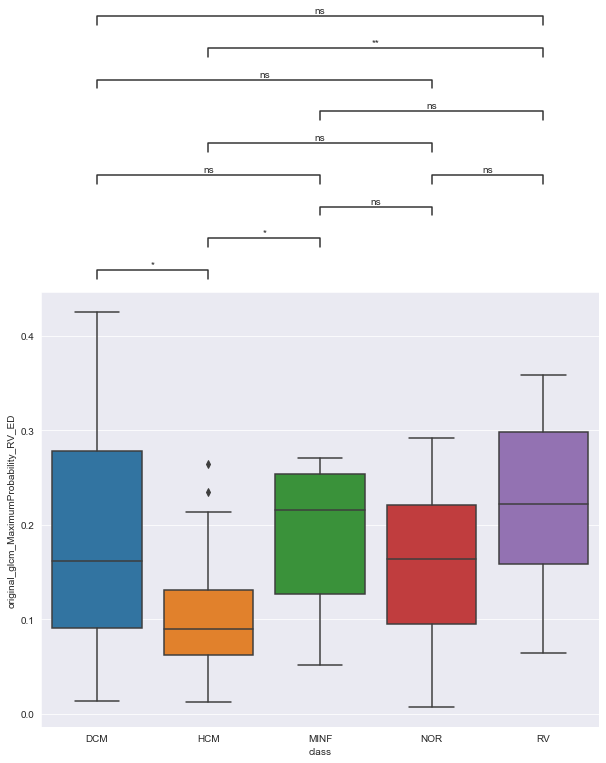

----------   original_glcm_SumAverage_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.9262    0.9  -5.0489 6.9014  False
   DCM   MINF  -3.9463 0.3595  -9.9215 2.0289  False
   DCM    NOR   -0.997    0.9  -6.9722 4.9782  False
   DCM     RV  -4.6361 0.2049 -10.6113  1.339  False
   HCM   MINF  -4.8726 0.1647 -10.8478 1.1026  False
   HCM    NOR  -1.9233 0.8962  -7.8985 4.0519  False
   HCM     RV  -5.5624 0.0808 -11.5376 0.4128  False
  MINF    NOR   2.9493 0.6282  -3.0259 8.9245  False
  MINF     RV  -0.6898    0.9   -6.665 5.2854  False
   NOR     RV  -3.6391 0.4443  -9.6143 2.3361  False
----------------------------------------------------


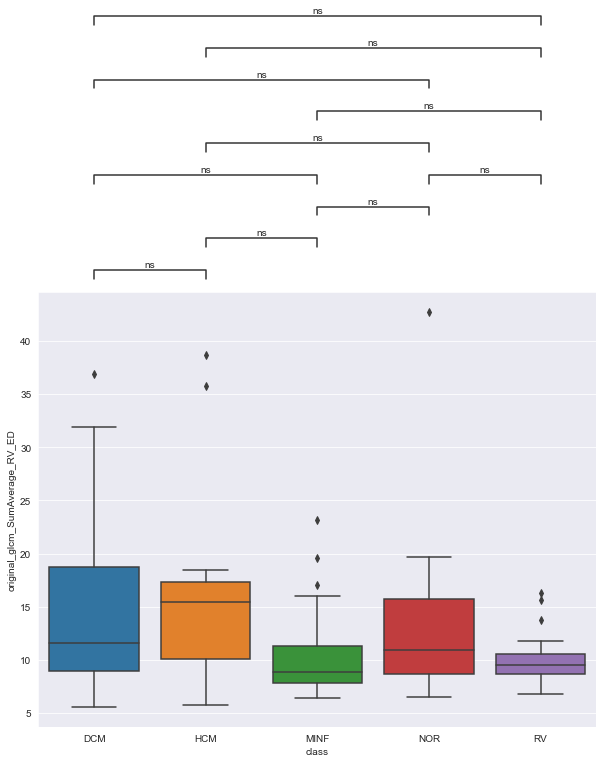

----------   original_glcm_SumEntropy_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.4534  0.307 -0.1986  1.1054  False
   DCM   MINF  -0.3223 0.6271 -0.9743  0.3298  False
   DCM    NOR   0.0234    0.9 -0.6286  0.6755  False
   DCM     RV  -0.4235 0.3772 -1.0755  0.2286  False
   HCM   MINF  -0.7757 0.0113 -1.4277 -0.1236   True
   HCM    NOR    -0.43 0.3611  -1.082  0.2221  False
   HCM     RV  -0.8769 0.0029 -1.5289 -0.2248   True
  MINF    NOR   0.3457  0.571 -0.3063  0.9977  False
  MINF     RV  -0.1012    0.9 -0.7532  0.5509  False
   NOR     RV  -0.4469 0.3212 -1.0989  0.2051  False
----------------------------------------------------


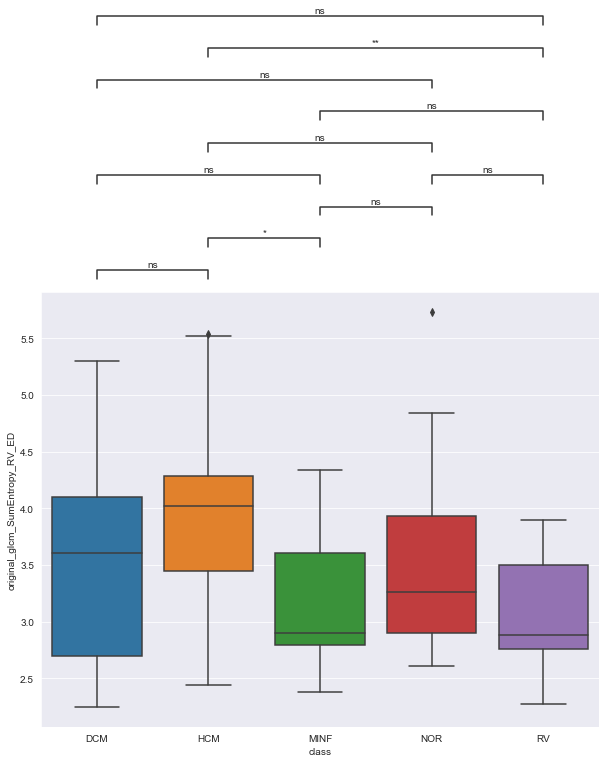

----------   original_glcm_SumSquares_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM   4.0504  0.611  -3.9763  12.077  False
   DCM   MINF  -3.6099 0.6966 -11.6366  4.4167  False
   DCM    NOR   0.1637    0.9  -7.8629  8.1904  False
   DCM     RV   -4.297  0.563 -12.3237  3.7296  False
   HCM   MINF  -7.6603 0.0689 -15.6869  0.3664  False
   HCM    NOR  -3.8866 0.6428 -11.9133    4.14  False
   HCM     RV  -8.3474 0.0374  -16.374 -0.3207   True
  MINF    NOR   3.7736 0.6648   -4.253 11.8003  False
  MINF     RV  -0.6871    0.9  -8.7138  7.3395  False
   NOR     RV  -4.4608 0.5312 -12.4874  3.5659  False
-----------------------------------------------------


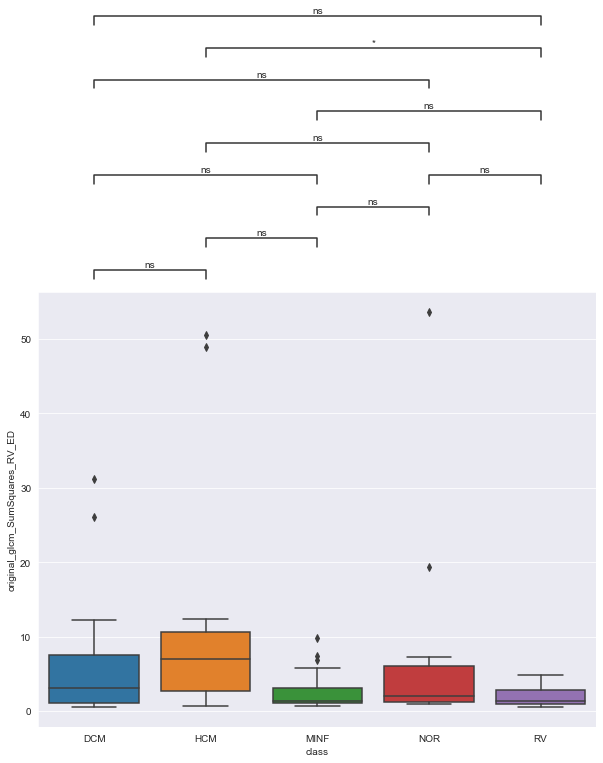

----------   original_gldm_DependenceEntropy_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.1138    0.9 -0.2646  0.4922  False
   DCM   MINF  -0.1885  0.621 -0.5669  0.1899  False
   DCM    NOR  -0.0525    0.9  -0.431  0.3259  False
   DCM     RV  -0.3121 0.1561 -0.6905  0.0663  False
   HCM   MINF  -0.3023 0.1805 -0.6808  0.0761  False
   HCM    NOR  -0.1663 0.7124 -0.5448  0.2121  False
   HCM     RV  -0.4259 0.0193 -0.8043 -0.0475   True
  MINF    NOR    0.136 0.8377 -0.2424  0.5144  False
  MINF     RV  -0.1235  0.889  -0.502  0.2549  False
   NOR     RV  -0.2595 0.3206 -0.6379  0.1189  False
----------------------------------------------------


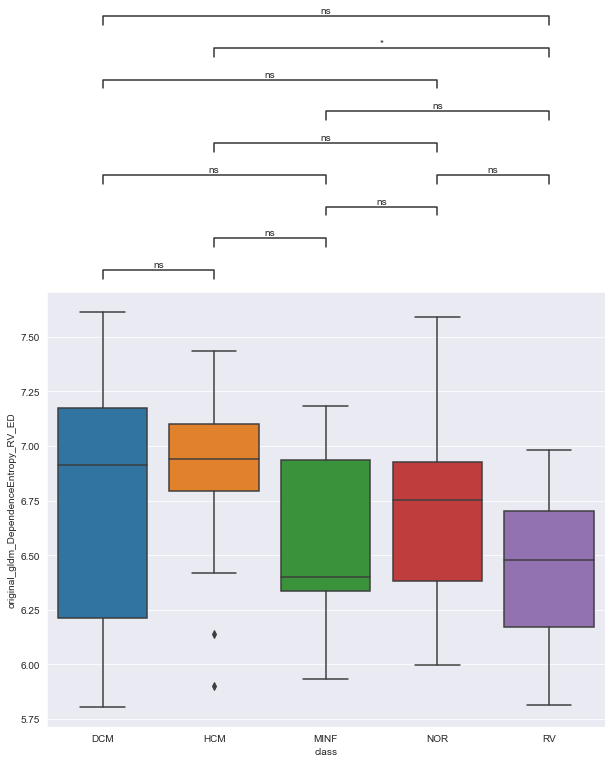

----------   original_gldm_DependenceNonUniformity_RV_ED --------- 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   DCM    HCM -279.1235 0.0062 -500.6273  -57.6197   True
   DCM   MINF -258.5629 0.0137 -480.0666  -37.0591   True
   DCM    NOR -371.0689  0.001 -592.5727 -149.5651   True
   DCM     RV -413.2292  0.001  -634.733 -191.7255   True
   HCM   MINF   20.5606    0.9 -200.9432  242.0644  False
   HCM    NOR  -91.9454 0.7507 -313.4492  129.5584  False
   HCM     RV -134.1058 0.4504 -355.6095    87.398  False
  MINF    NOR  -112.506 0.6058 -334.0098  108.9977  False
  MINF     RV -154.6664 0.3029 -376.1702   66.8374  False
   NOR     RV  -42.1603    0.9 -263.6641  179.3435  False
---------------------------------------------------------


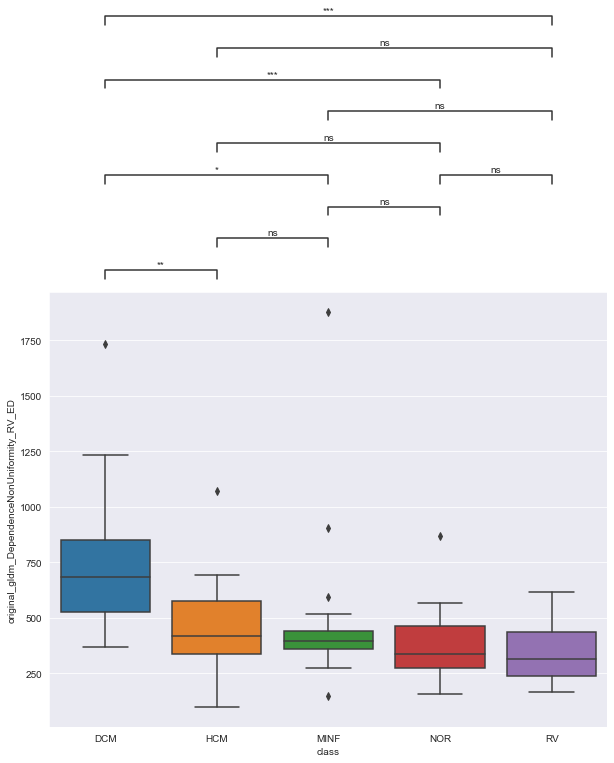

----------   original_gldm_DependenceNonUniformityNormalized_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0173 0.1345 -0.0031  0.0378  False
   DCM   MINF  -0.0043    0.9 -0.0247  0.0162  False
   DCM    NOR   0.0045    0.9 -0.0159  0.0249  False
   DCM     RV  -0.0061    0.9 -0.0265  0.0144  False
   HCM   MINF  -0.0216 0.0326  -0.042 -0.0012   True
   HCM    NOR  -0.0128 0.4126 -0.0332  0.0076  False
   HCM     RV  -0.0234 0.0162 -0.0438  -0.003   True
  MINF    NOR   0.0088 0.7272 -0.0116  0.0292  False
  MINF     RV  -0.0018    0.9 -0.0222  0.0186  False
   NOR     RV  -0.0106 0.5889  -0.031  0.0098  False
----------------------------------------------------


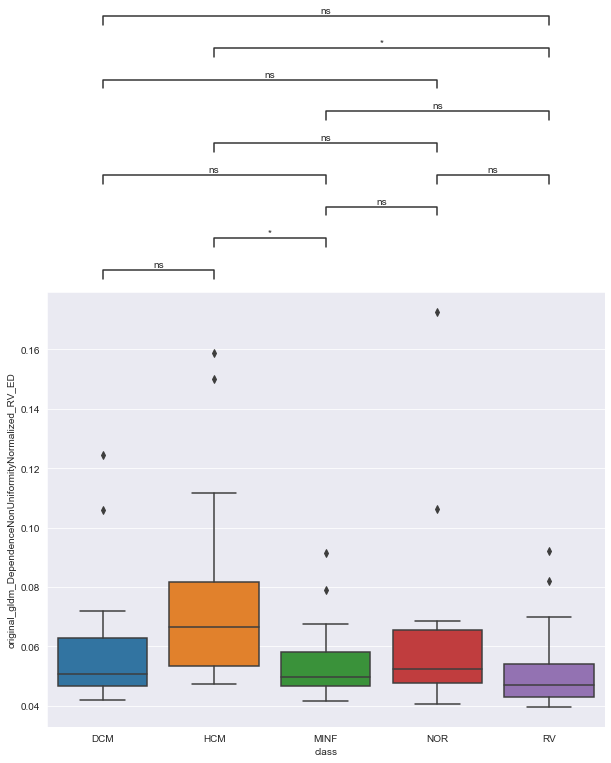

----------   original_gldm_DependenceVariance_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  -9.4477 0.0506 -18.9112  0.0158  False
   DCM   MINF  -0.4189    0.9  -9.8824  9.0445  False
   DCM    NOR  -3.1582 0.8777 -12.6217  6.3053  False
   DCM     RV    2.961    0.9  -6.5025 12.4245  False
   HCM   MINF   9.0288 0.0691  -0.4347 18.4923  False
   HCM    NOR   6.2895 0.3529  -3.1739  15.753  False
   HCM     RV  12.4088 0.0039   2.9453 21.8722   True
  MINF    NOR  -2.7392    0.9 -12.2027  6.7243  False
  MINF     RV     3.38 0.8411  -6.0835 12.8435  False
   NOR     RV   6.1192 0.3818  -3.3443 15.5827  False
-----------------------------------------------------


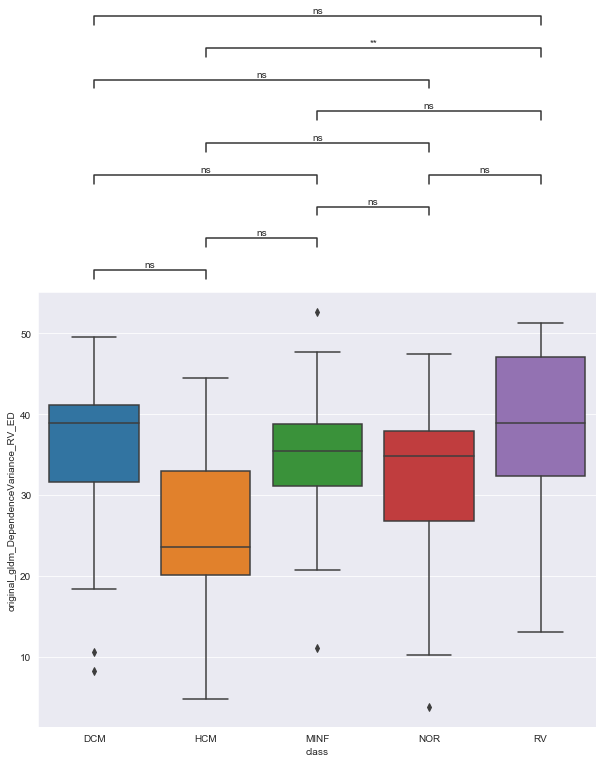

----------   original_gldm_GrayLevelNonUniformity_RV_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   DCM    HCM -1632.3752  0.001 -2473.5349 -791.2155   True
   DCM   MINF  -669.1332 0.1841 -1510.2929  172.0265  False
   DCM    NOR -1422.6088  0.001 -2263.7685 -581.4491   True
   DCM     RV  -880.7624 0.0354 -1721.9221  -39.6027   True
   HCM   MINF    963.242 0.0164   122.0823 1804.4017   True
   HCM    NOR   209.7663    0.9  -631.3934  1050.926  False
   HCM     RV   751.6127 0.1028    -89.547 1592.7724  False
  MINF    NOR  -753.4757 0.1013 -1594.6354    87.684  False
  MINF     RV  -211.6293    0.9  -1052.789  629.5305  False
   NOR     RV   541.8464 0.3858  -299.3133 1383.0061  False
-----------------------------------------------------------


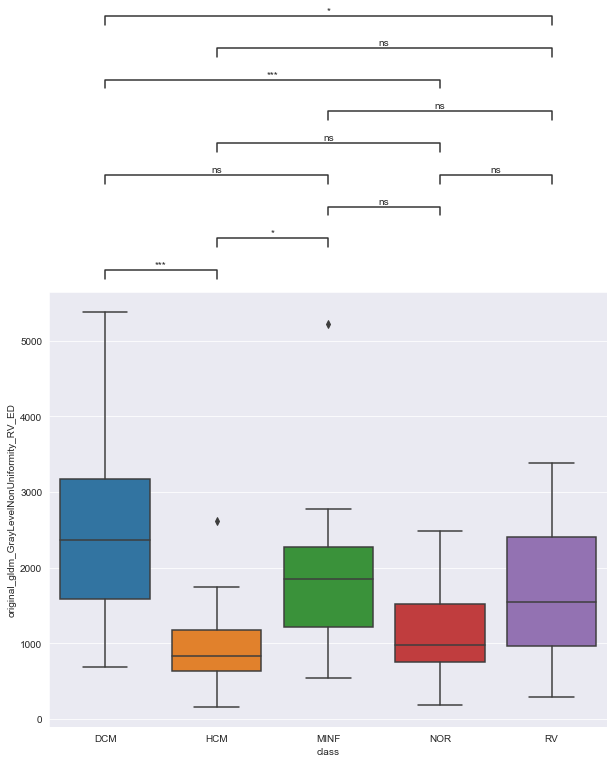

----------   original_gldm_GrayLevelVariance_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM   3.7488 0.6985  -4.6093  12.107  False
   DCM   MINF  -3.6884 0.7098 -12.0465  4.6698  False
   DCM    NOR   0.5093    0.9  -7.8488  8.8674  False
   DCM     RV  -4.5497 0.5489 -12.9079  3.8084  False
   HCM   MINF  -7.4372 0.1053 -15.7953  0.9209  False
   HCM    NOR  -3.2396 0.7936 -11.5977  5.1186  False
   HCM     RV  -8.2986 0.0526 -16.6567  0.0595  False
  MINF    NOR   4.1976 0.6147  -4.1605 12.5558  False
  MINF     RV  -0.8614    0.9  -9.2195  7.4967  False
   NOR     RV   -5.059 0.4506 -13.4171  3.2991  False
-----------------------------------------------------


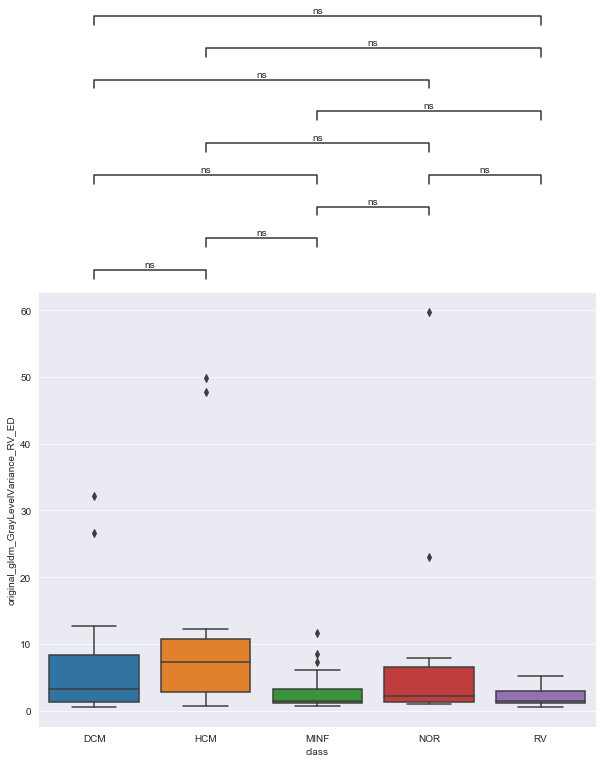

----------   original_gldm_LargeDependenceEmphasis_RV_ED --------- 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   DCM    HCM  -52.995 0.0509 -106.1211   0.1311  False
   DCM   MINF  15.1007    0.9  -38.0253  68.2268  False
   DCM    NOR    -22.9 0.7258  -76.0261   30.226  False
   DCM     RV  17.5903 0.8818  -35.5358  70.7163  False
   HCM   MINF  68.0958 0.0051   14.9697 121.2218   True
   HCM    NOR   30.095 0.5144  -23.0311   83.221  False
   HCM     RV  70.5853 0.0033   17.4592 123.7113   True
  MINF    NOR -38.0008 0.2793  -91.1269  15.1253  False
  MINF     RV   2.4895    0.9  -50.6366  55.6156  False
   NOR     RV  40.4903 0.2205  -12.6358  93.6164  False
-------------------------------------------------------


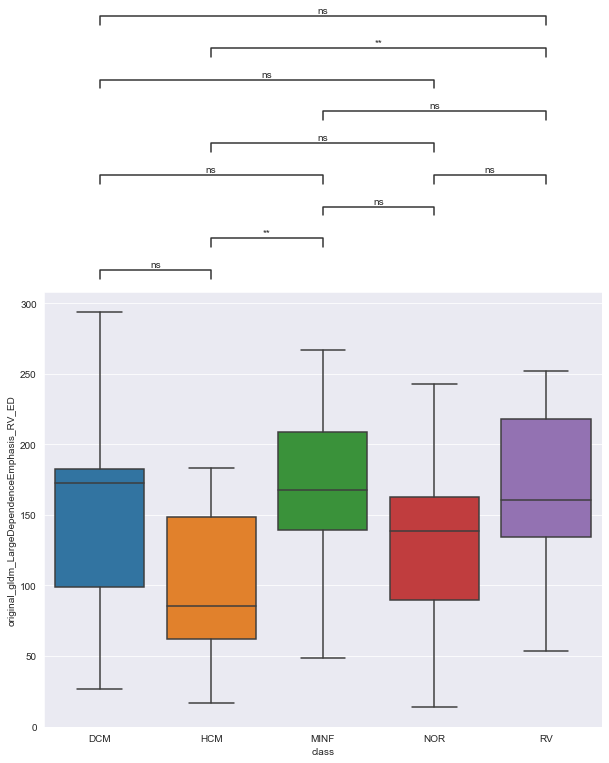

----------   original_gldm_SmallDependenceEmphasis_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0291 0.4294  -0.018  0.0762  False
   DCM   MINF  -0.0263 0.5286 -0.0734  0.0209  False
   DCM    NOR   0.0064    0.9 -0.0407  0.0535  False
   DCM     RV  -0.0263 0.5275 -0.0734  0.0208  False
   HCM   MINF  -0.0554 0.0128 -0.1025 -0.0083   True
   HCM    NOR  -0.0227 0.6463 -0.0698  0.0244  False
   HCM     RV  -0.0554 0.0127 -0.1025 -0.0083   True
  MINF    NOR   0.0327 0.3098 -0.0144  0.0798  False
  MINF     RV     -0.0    0.9 -0.0471  0.0471  False
   NOR     RV  -0.0327 0.3089 -0.0798  0.0144  False
----------------------------------------------------


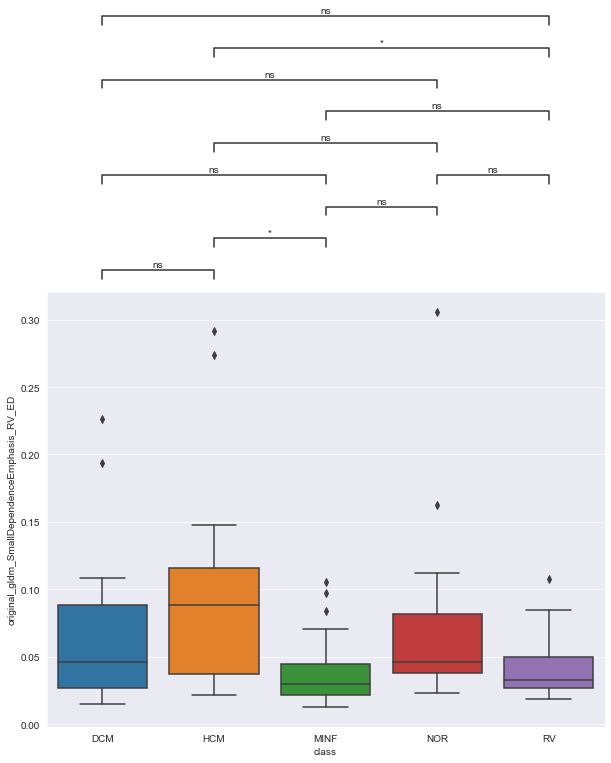

----------   original_glrlm_GrayLevelNonUniformity_RV_ED --------- 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
   DCM    HCM -693.0737  0.001 -1044.0287 -342.1188   True
   DCM   MINF -307.0284 0.1157  -657.9833   43.9266  False
   DCM    NOR -652.2752  0.001 -1003.2302 -301.3203   True
   DCM     RV -462.9024 0.0036  -813.8574 -111.9475   True
   HCM   MINF  386.0454 0.0236    35.0904  737.0003   True
   HCM    NOR   40.7985    0.9  -310.1564  391.7534  False
   HCM     RV  230.1713 0.3669  -120.7836  581.1262  False
  MINF    NOR -345.2469 0.0562  -696.2018    5.7081  False
  MINF     RV -155.8741 0.7053   -506.829  195.0809  False
   NOR     RV  189.3728 0.5564  -161.5821  540.3277  False
----------------------------------------------------------


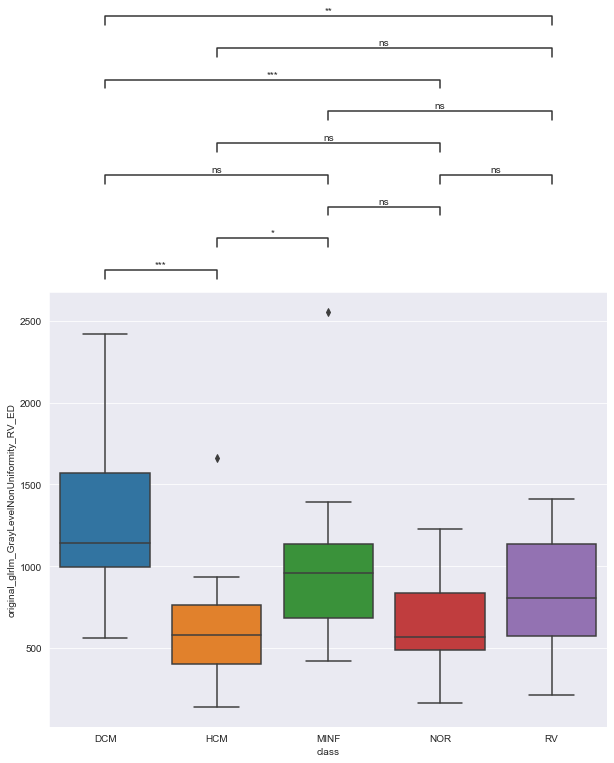

----------   original_glrlm_GrayLevelNonUniformityNormalized_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0374 0.4427 -0.0988 0.0239  False
   DCM   MINF   0.0276 0.6971 -0.0338 0.0889  False
   DCM    NOR  -0.0048    0.9 -0.0662 0.0565  False
   DCM     RV    0.035 0.5071 -0.0263 0.0964  False
   HCM   MINF    0.065 0.0323  0.0036 0.1263   True
   HCM    NOR   0.0326 0.5692 -0.0288  0.094  False
   HCM     RV   0.0725 0.0122  0.0111 0.1338   True
  MINF    NOR  -0.0324 0.5744 -0.0937  0.029  False
  MINF     RV   0.0075    0.9 -0.0539 0.0688  False
   NOR     RV   0.0399 0.3766 -0.0215 0.1012  False
---------------------------------------------------


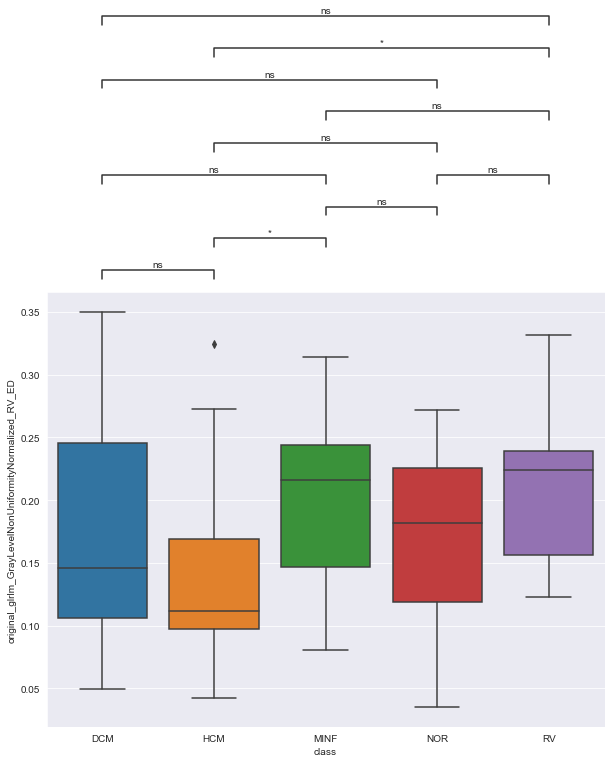

----------   original_glrlm_LongRunEmphasis_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -3.1546 0.0501 -6.3099 0.0007  False
   DCM   MINF   0.9228    0.9 -2.2325 4.0781  False
   DCM    NOR  -2.2318 0.2902 -5.3871 0.9235  False
   DCM     RV  -0.7843    0.9 -3.9396  2.371  False
   HCM   MINF   4.0774 0.0046  0.9221 7.2327   True
   HCM    NOR   0.9228    0.9 -2.2325 4.0781  False
   HCM     RV   2.3703 0.2334  -0.785 5.5256  False
  MINF    NOR  -3.1546 0.0501 -6.3099 0.0007  False
  MINF     RV  -1.7071 0.5541 -4.8624 1.4482  False
   NOR     RV   1.4475 0.6826 -1.7078 4.6028  False
---------------------------------------------------


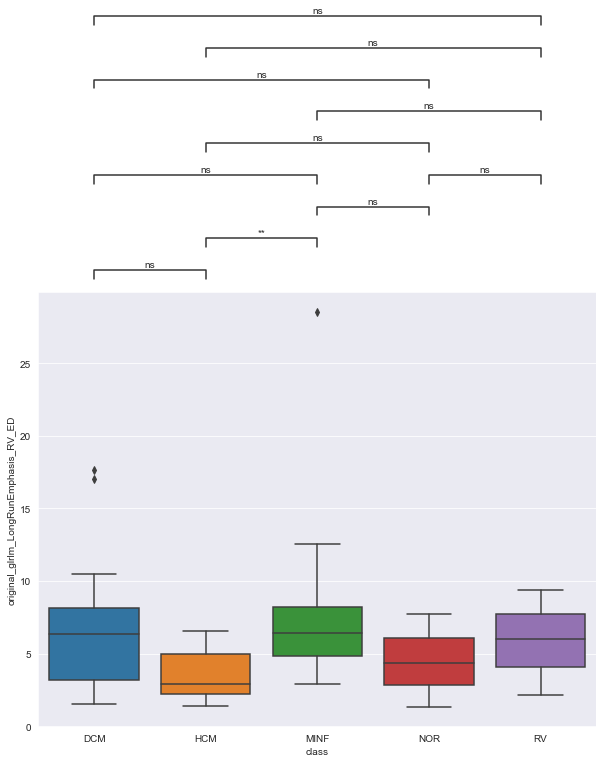

----------   original_glrlm_LongRunHighGrayLevelEmphasis_RV_ED --------- 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   DCM    HCM   -60.803  0.405 -156.9289  35.3229  False
   DCM   MINF   -66.258 0.3156 -162.3839  29.8679  False
   DCM    NOR  -71.5889 0.2412 -167.7148   24.537  False
   DCM     RV -111.1911 0.0149 -207.3171 -15.0652   True
   HCM   MINF    -5.455    0.9 -101.5809  90.6709  False
   HCM    NOR  -10.7859    0.9 -106.9118    85.34  False
   HCM     RV  -50.3882 0.5804 -146.5141  45.7378  False
  MINF    NOR   -5.3309    0.9 -101.4569   90.795  False
  MINF     RV  -44.9332  0.669 -141.0591  51.1927  False
   NOR     RV  -39.6022 0.7555 -135.7282  56.5237  False
--------------------------------------------------------


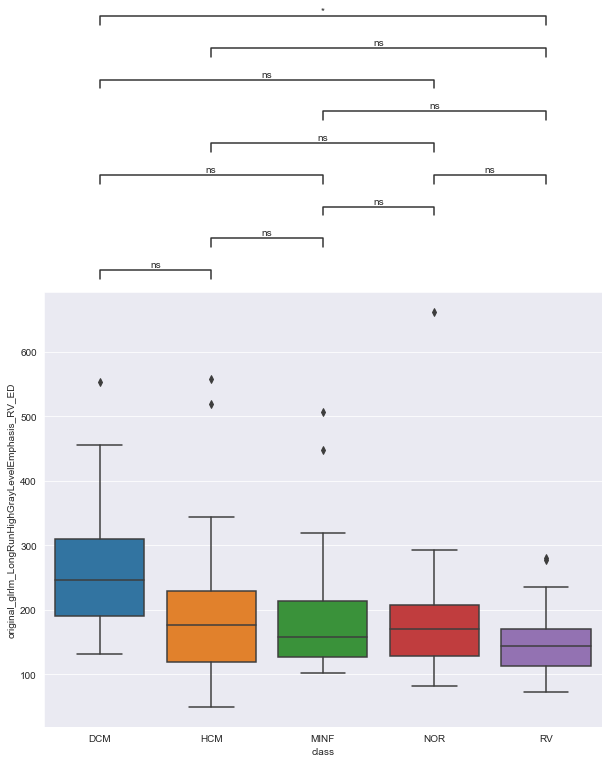

----------   original_glrlm_RunEntropy_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0012    0.9 -0.3292  0.3317  False
   DCM   MINF  -0.1989 0.4561 -0.5294  0.1315  False
   DCM    NOR  -0.1326 0.7723  -0.463  0.1979  False
   DCM     RV  -0.3437 0.0373 -0.6741 -0.0132   True
   HCM   MINF  -0.2002 0.4498 -0.5306  0.1303  False
   HCM    NOR  -0.1338 0.7664 -0.4643  0.1966  False
   HCM     RV  -0.3449 0.0363 -0.6754 -0.0145   True
  MINF    NOR   0.0663    0.9 -0.2641  0.3968  False
  MINF     RV  -0.1448 0.7148 -0.4752  0.1857  False
   NOR     RV  -0.2111 0.3946 -0.5415  0.1194  False
----------------------------------------------------


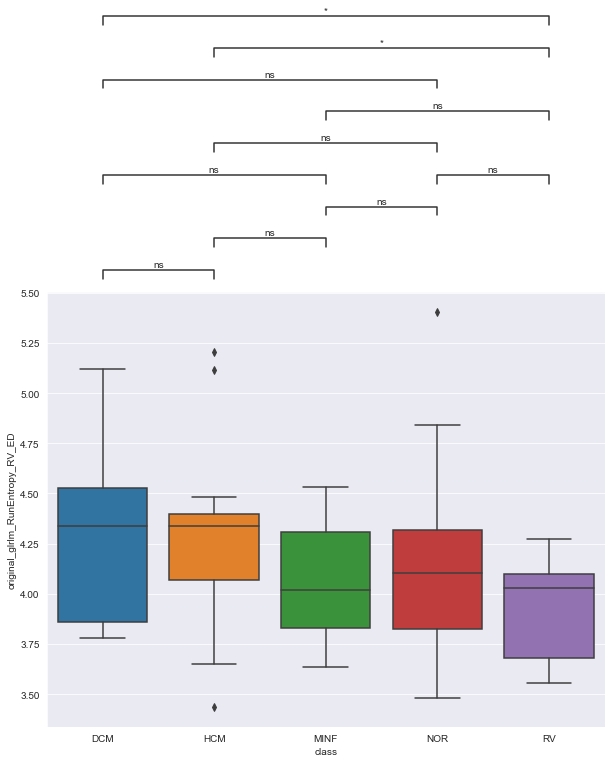

----------   original_glrlm_RunLengthNonUniformity_RV_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   DCM    HCM -1713.8171 0.0027 -2984.2128  -443.4214   True
   DCM   MINF -2004.8517  0.001 -3275.2475   -734.456   True
   DCM    NOR -2339.8645  0.001 -3610.2602 -1069.4688   True
   DCM     RV  -2723.904  0.001 -3994.2997 -1453.5083   True
   HCM   MINF  -291.0346    0.9 -1561.4303   979.3611  False
   HCM    NOR  -626.0474 0.6294 -1896.4431   644.3483  False
   HCM     RV -1010.0869 0.1845 -2280.4826   260.3088  False
  MINF    NOR  -335.0128    0.9 -1605.4085    935.383  False
  MINF     RV  -719.0523 0.5151  -1989.448   551.3435  False
   NOR     RV  -384.0395    0.9 -1654.4352   886.3562  False
------------------------------------------------------------


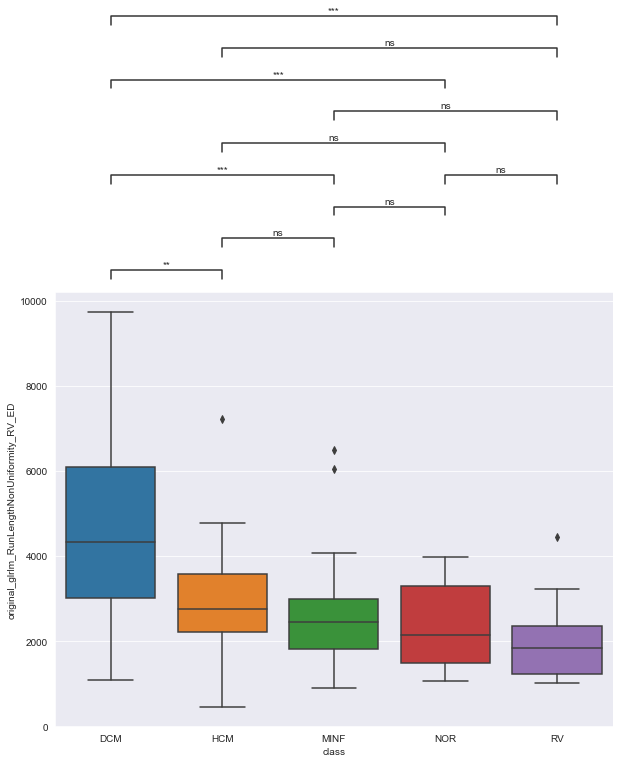

----------   original_glrlm_RunLengthNonUniformityNormalized_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM    0.084 0.1357  -0.015  0.1829  False
   DCM   MINF   -0.048 0.6416  -0.147   0.051  False
   DCM    NOR    0.027    0.9  -0.072   0.126  False
   DCM     RV  -0.0389 0.7854 -0.1379  0.0601  False
   HCM   MINF   -0.132 0.0032 -0.2309  -0.033   True
   HCM    NOR   -0.057 0.5003 -0.1559   0.042  False
   HCM     RV  -0.1228 0.0073 -0.2218 -0.0239   True
  MINF    NOR    0.075 0.2258  -0.024   0.174  False
  MINF     RV   0.0091    0.9 -0.0899  0.1081  False
   NOR     RV  -0.0659 0.3515 -0.1649  0.0331  False
----------------------------------------------------


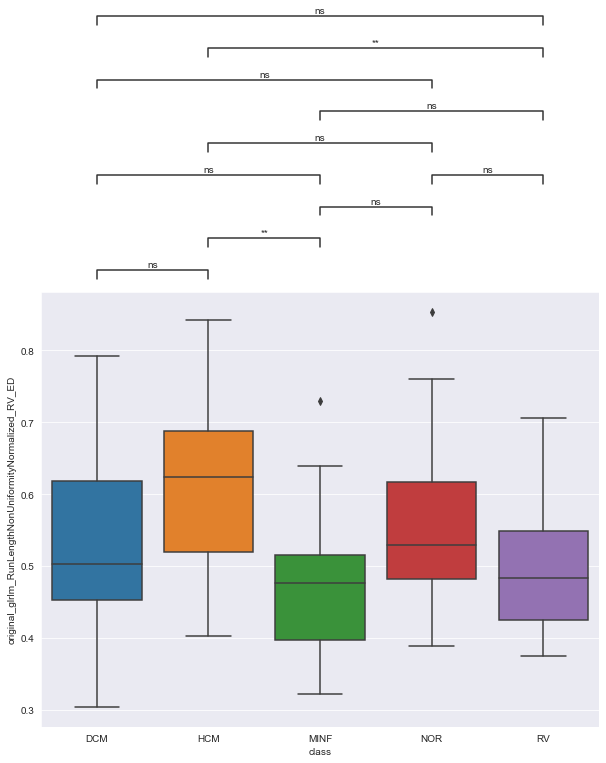

----------   original_glrlm_RunPercentage_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0859 0.0648 -0.0033  0.1751  False
   DCM   MINF  -0.0339 0.8053 -0.1231  0.0553  False
   DCM    NOR   0.0332 0.8182  -0.056  0.1224  False
   DCM     RV  -0.0328  0.825  -0.122  0.0564  False
   HCM   MINF  -0.1198 0.0029  -0.209 -0.0306   True
   HCM    NOR  -0.0528 0.4738  -0.142  0.0364  False
   HCM     RV  -0.1187 0.0032 -0.2079 -0.0295   True
  MINF    NOR   0.0671 0.2326 -0.0221  0.1563  False
  MINF     RV   0.0011    0.9 -0.0881  0.0903  False
   NOR     RV   -0.066 0.2479 -0.1552  0.0233  False
----------------------------------------------------


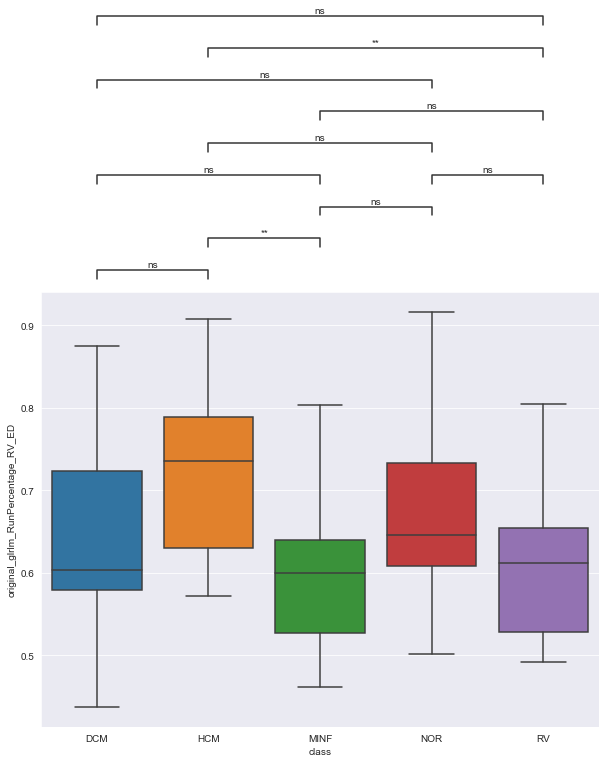

----------   original_glrlm_RunVariance_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -1.9343 0.0326 -3.7625 -0.1061   True
   DCM   MINF   0.3473    0.9 -1.4808  2.1755  False
   DCM    NOR  -1.4122 0.2088 -3.2403   0.416  False
   DCM     RV  -0.6231 0.8666 -2.4512  1.2051  False
   HCM   MINF   2.2816 0.0069  0.4534  4.1098   True
   HCM    NOR   0.5221    0.9  -1.306  2.3503  False
   HCM     RV   1.3112 0.2767  -0.517  3.1394  False
  MINF    NOR  -1.7595 0.0652 -3.5876  0.0687  False
  MINF     RV  -0.9704 0.5701 -2.7986  0.8578  False
   NOR     RV   0.7891 0.7249 -1.0391  2.6173  False
----------------------------------------------------


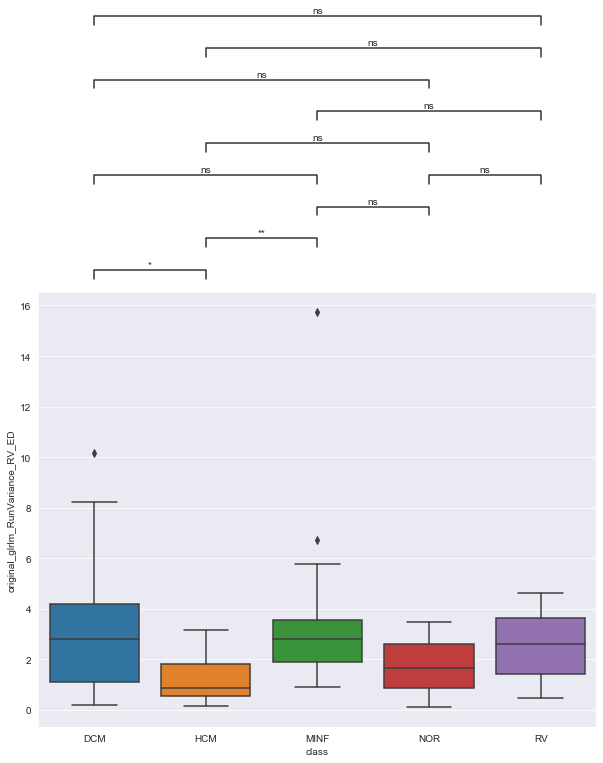

----------   original_glrlm_ShortRunEmphasis_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0585 0.1427 -0.0111   0.128  False
   DCM   MINF  -0.0374 0.5602  -0.107  0.0322  False
   DCM    NOR   0.0227 0.8889 -0.0469  0.0923  False
   DCM     RV  -0.0237 0.8675 -0.0933  0.0459  False
   HCM   MINF  -0.0958 0.0021 -0.1654 -0.0262   True
   HCM    NOR  -0.0357 0.5973 -0.1053  0.0339  False
   HCM     RV  -0.0821 0.0123 -0.1517 -0.0125   True
  MINF    NOR   0.0601 0.1241 -0.0095  0.1297  False
  MINF     RV   0.0137    0.9 -0.0559  0.0833  False
   NOR     RV  -0.0464 0.3496  -0.116  0.0232  False
----------------------------------------------------


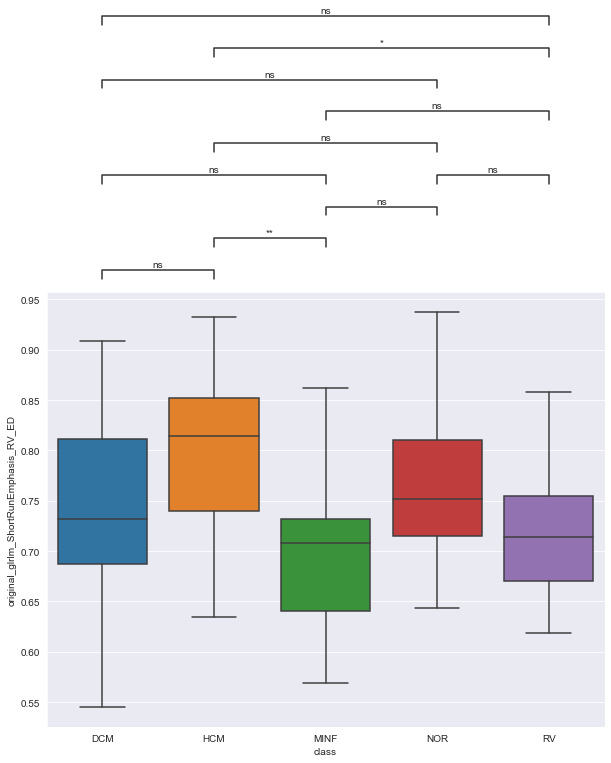

----------   original_glszm_GrayLevelNonUniformity_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   DCM    HCM -21.0489 0.0612 -42.7115   0.6137  False
   DCM   MINF -37.3405  0.001 -59.0031 -15.6779   True
   DCM    NOR   -32.17  0.001 -53.8326 -10.5074   True
   DCM     RV -38.9848  0.001 -60.6474 -17.3222   True
   HCM   MINF -16.2915 0.2324 -37.9541   5.3711  False
   HCM    NOR  -11.121 0.5973 -32.7836  10.5416  False
   HCM     RV -17.9359 0.1532 -39.5985   3.7267  False
  MINF    NOR   5.1705    0.9 -16.4921  26.8331  False
  MINF     RV  -1.6444    0.9  -23.307  20.0182  False
   NOR     RV  -6.8149    0.9 -28.4775  14.8477  False
------------------------------------------------------


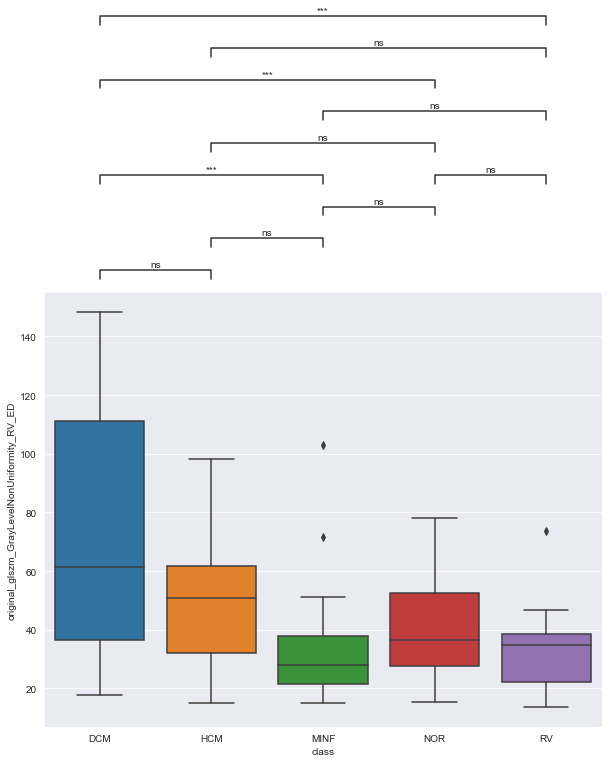

----------   original_glszm_LargeAreaHighGrayLevelEmphasis_RV_ED --------- 

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower        upper     reject
--------------------------------------------------------------------
   DCM    HCM -2339824.4967 0.1702  -5229636.962  549987.9686  False
   DCM   MINF   483461.4279    0.9 -2406351.0374 3373273.8932  False
   DCM    NOR -2126318.4689 0.2524 -5016130.9342  763493.9964  False
   DCM     RV -1073434.0984 0.8188 -3963246.5637 1816378.3669  False
   HCM   MINF  2823285.9246 0.0589   -66526.5407 5713098.3899  False
   HCM    NOR   213506.0278    0.9 -2676306.4375 3103318.4931  False
   HCM     RV  1266390.3983 0.7146  -1623422.067 4156202.8636  False
  MINF    NOR -2609779.8969 0.0966 -5499592.3622  280032.5684  False
  MINF     RV -1556895.5263 0.5577 -4446707.9916  1332916.939  False
   NOR     RV  1052884.3706 0.8299 -1836928.0947 3942696.8359  False
--------------------------

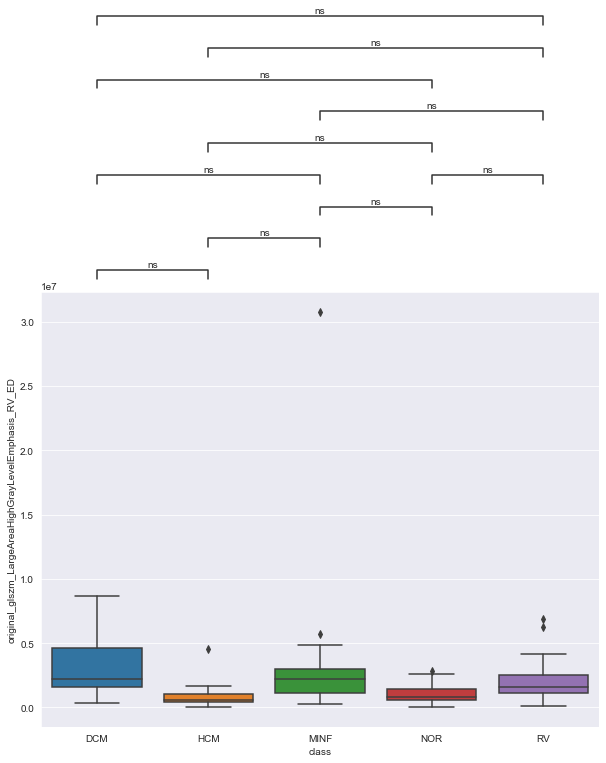

----------   original_glszm_SizeZoneNonUniformity_RV_ED --------- 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   DCM    HCM  -90.2424 0.4913 -245.5695  65.0847  False
   DCM   MINF -178.7822 0.0156 -334.1093 -23.4551   True
   DCM    NOR -124.9702  0.175 -280.2973  30.3569  False
   DCM     RV -199.9597 0.0048 -355.2867 -44.6326   True
   HCM   MINF  -88.5398 0.5089 -243.8669  66.7872  False
   HCM    NOR  -34.7278    0.9 -190.0549 120.5993  False
   HCM     RV -109.7173 0.2915 -265.0444  45.6098  False
  MINF    NOR    53.812 0.8578  -101.515 209.1391  False
  MINF     RV  -21.1774    0.9 -176.5045 134.1497  False
   NOR     RV  -74.9895  0.645 -230.3166  80.3376  False
--------------------------------------------------------


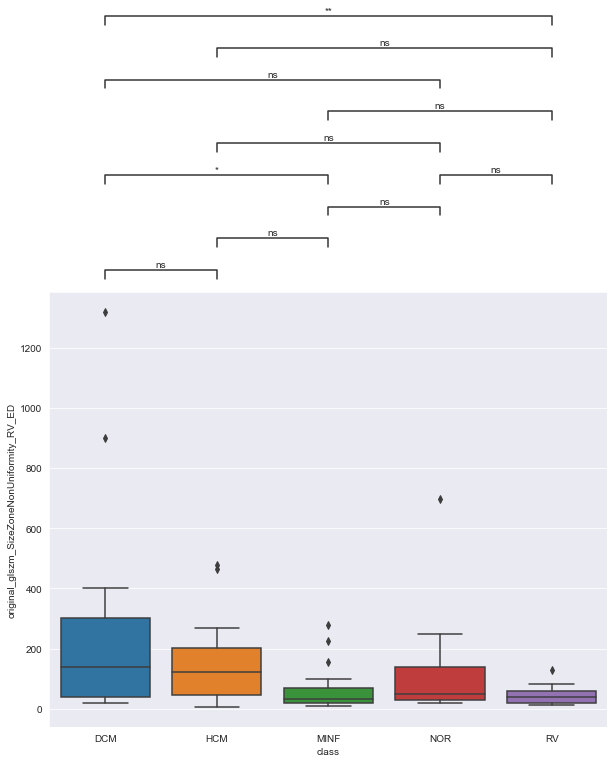

----------   original_glszm_ZoneEntropy_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0203    0.9 -0.6032  0.6437  False
   DCM   MINF  -0.5364  0.126 -1.1599   0.087  False
   DCM    NOR  -0.2466 0.7813   -0.87  0.3769  False
   DCM     RV  -0.6982 0.0201 -1.3217 -0.0747   True
   HCM   MINF  -0.5567 0.1032 -1.1802  0.0667  False
   HCM    NOR  -0.2669 0.7305 -0.8903  0.3566  False
   HCM     RV  -0.7185 0.0155 -1.3419  -0.095   True
  MINF    NOR   0.2899 0.6729 -0.3336  0.9133  False
  MINF     RV  -0.1618    0.9 -0.7852  0.4617  False
   NOR     RV  -0.4516 0.2672 -1.0751  0.1718  False
----------------------------------------------------


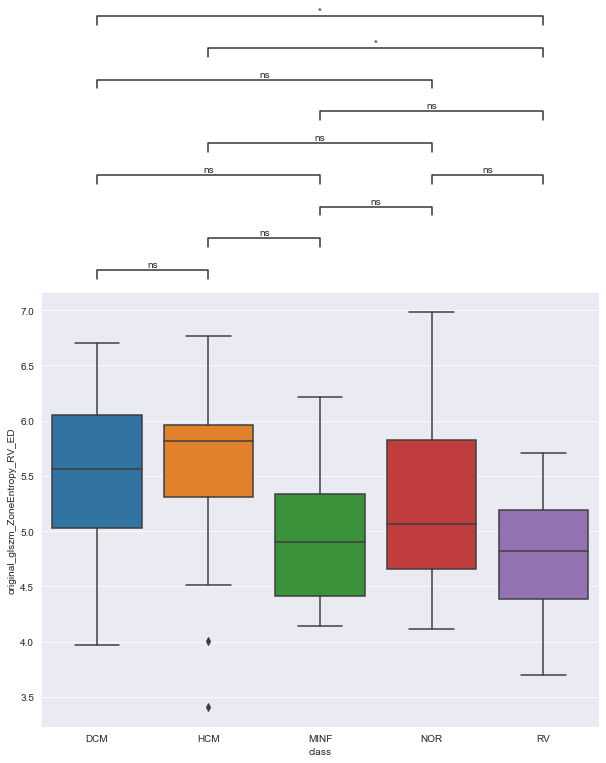

----------   original_glszm_ZonePercentage_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0321 0.4982 -0.0235  0.0877  False
   DCM   MINF  -0.0302 0.5512 -0.0858  0.0254  False
   DCM    NOR   0.0058    0.9 -0.0498  0.0615  False
   DCM     RV  -0.0313 0.5192  -0.087  0.0243  False
   HCM   MINF  -0.0623 0.0202 -0.1179 -0.0067   True
   HCM    NOR  -0.0263 0.6618 -0.0819  0.0294  False
   HCM     RV  -0.0634 0.0171 -0.1191 -0.0078   True
  MINF    NOR    0.036 0.3801 -0.0196  0.0917  False
  MINF     RV  -0.0011    0.9 -0.0568  0.0545  False
   NOR     RV  -0.0372 0.3474 -0.0928  0.0185  False
----------------------------------------------------


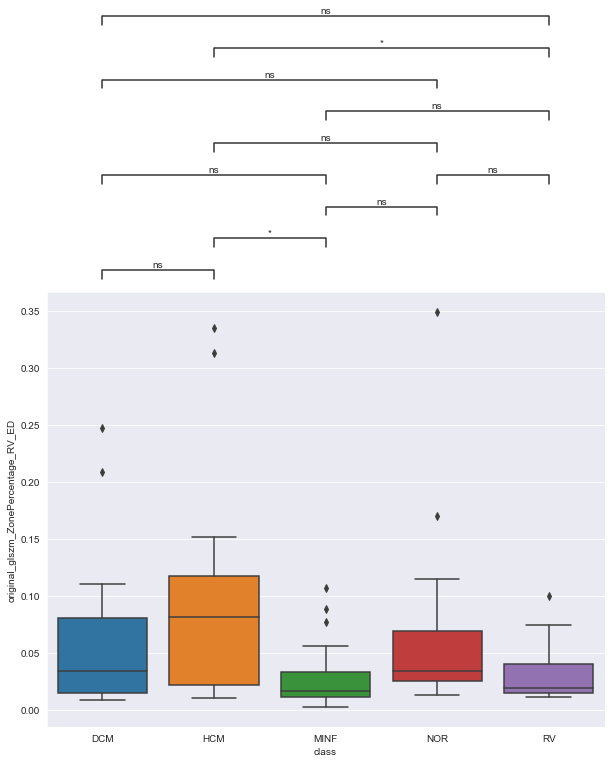

----------   original_ngtdm_Busyness_RV_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  -13.403 0.1534 -29.5953  2.7892  False
   DCM   MINF   0.1927    0.9 -15.9996  16.385  False
   DCM    NOR -15.1692 0.0777 -31.3615  1.0231  False
   DCM     RV  -8.3148 0.5971 -24.5071  7.8775  False
   HCM   MINF  13.5957 0.1429  -2.5965  29.788  False
   HCM    NOR  -1.7662    0.9 -17.9585 14.4261  False
   HCM     RV   5.0883    0.9  -11.104 21.2805  False
  MINF    NOR -15.3619 0.0717 -31.5542  0.8303  False
  MINF     RV  -8.5075 0.5785 -24.6998  7.6848  False
   NOR     RV   6.8545 0.7378  -9.3378 23.0467  False
-----------------------------------------------------


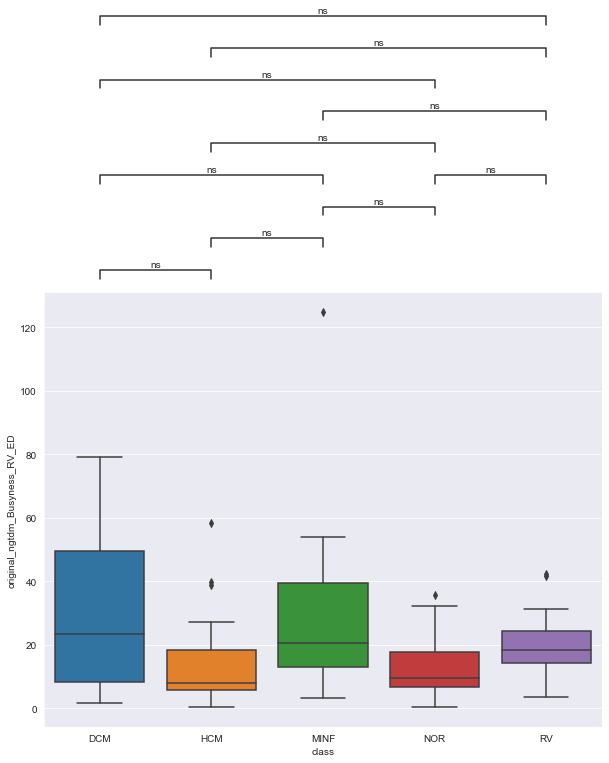

----------   original_ngtdm_Coarseness_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0009 0.0015  0.0003 0.0015   True
   DCM   MINF   0.0005 0.1305 -0.0001 0.0011  False
   DCM    NOR   0.0009 0.0011  0.0003 0.0015   True
   DCM     RV    0.001  0.001  0.0003 0.0016   True
   HCM   MINF  -0.0003  0.527  -0.001 0.0003  False
   HCM    NOR      0.0    0.9 -0.0006 0.0006  False
   HCM     RV   0.0001    0.9 -0.0005 0.0007  False
  MINF    NOR   0.0004 0.4832 -0.0003  0.001  False
  MINF     RV   0.0004 0.2919 -0.0002 0.0011  False
   NOR     RV   0.0001    0.9 -0.0005 0.0007  False
---------------------------------------------------


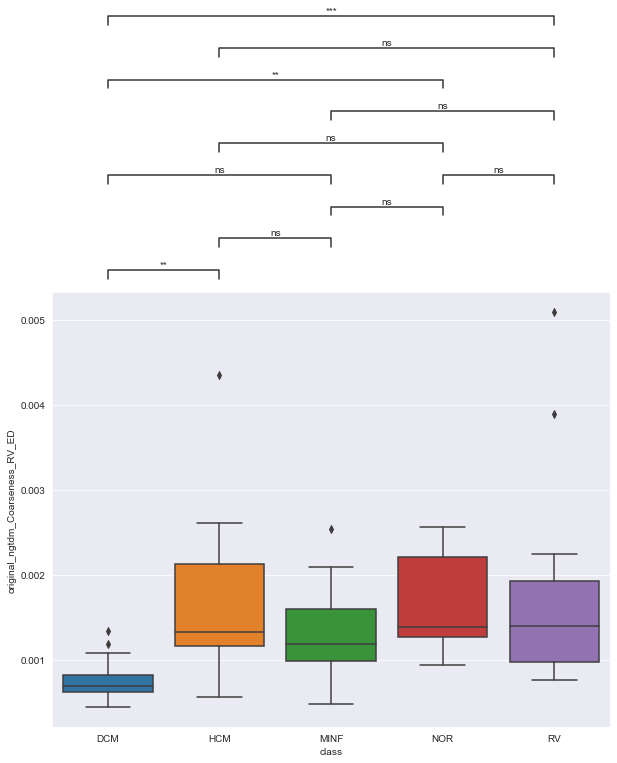

----------   original_ngtdm_Contrast_RV_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0472 0.0046  0.0107  0.0838   True
   DCM   MINF   -0.012 0.8863 -0.0486  0.0246  False
   DCM    NOR   0.0025    0.9 -0.0341  0.0391  False
   DCM     RV  -0.0144 0.7823  -0.051  0.0221  False
   HCM   MINF  -0.0593  0.001 -0.0958 -0.0227   True
   HCM    NOR  -0.0448 0.0085 -0.0813 -0.0082   True
   HCM     RV  -0.0617  0.001 -0.0983 -0.0251   True
  MINF    NOR   0.0145 0.7801 -0.0221  0.0511  False
  MINF     RV  -0.0024    0.9  -0.039  0.0341  False
   NOR     RV  -0.0169 0.6762 -0.0535  0.0196  False
----------------------------------------------------


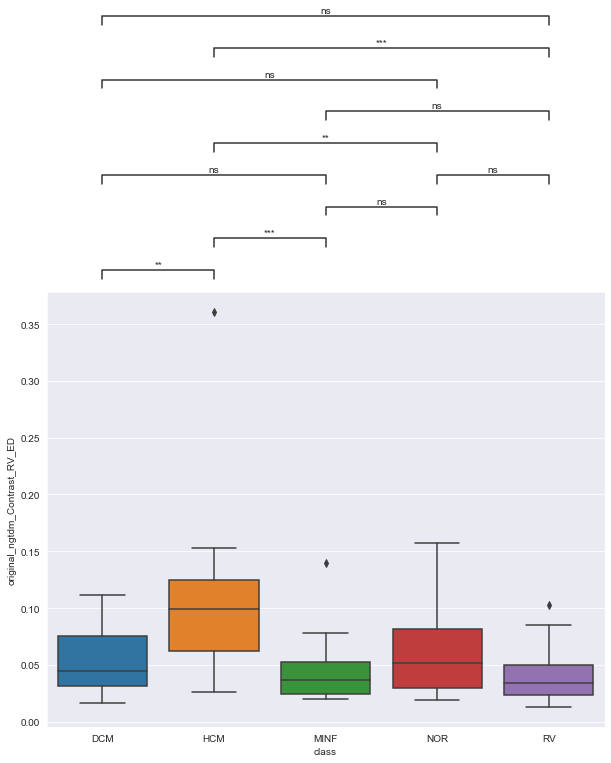

----------   original_shape_Elongation_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.0326 0.0685 -0.0667  0.0015  False
   DCM   MINF  -0.0166 0.6392 -0.0507  0.0175  False
   DCM    NOR  -0.0194 0.5105 -0.0535  0.0147  False
   DCM     RV  -0.0619  0.001  -0.096 -0.0278   True
   HCM   MINF    0.016 0.6667 -0.0181  0.0501  False
   HCM    NOR   0.0132 0.7955 -0.0209  0.0473  False
   HCM     RV  -0.0293 0.1274 -0.0634  0.0048  False
  MINF    NOR  -0.0028    0.9 -0.0369  0.0313  False
  MINF     RV  -0.0453 0.0033 -0.0794 -0.0112   True
   NOR     RV  -0.0425  0.007 -0.0766 -0.0084   True
----------------------------------------------------


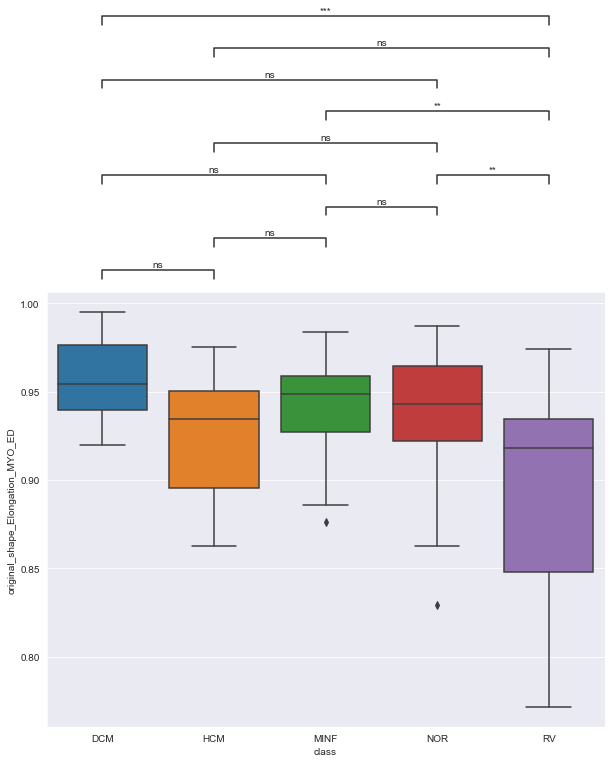

----------   original_shape_Flatness_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0178 0.7804 -0.0272 0.0628  False
   DCM   MINF   0.0035    0.9 -0.0415 0.0485  False
   DCM    NOR    0.019 0.7407  -0.026  0.064  False
   DCM     RV   0.0782  0.001  0.0332 0.1233   True
   HCM   MINF  -0.0143    0.9 -0.0593 0.0307  False
   HCM    NOR   0.0011    0.9 -0.0439 0.0462  False
   HCM     RV   0.0604 0.0029  0.0154 0.1054   True
  MINF    NOR   0.0155 0.8619 -0.0295 0.0605  False
  MINF     RV   0.0748  0.001  0.0297 0.1198   True
   NOR     RV   0.0593 0.0037  0.0143 0.1043   True
---------------------------------------------------


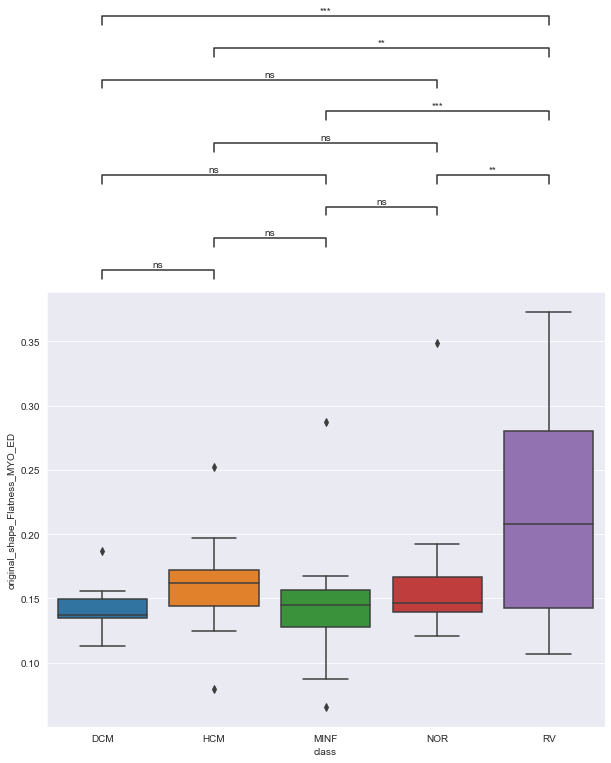

----------   original_shape_LeastAxisLength_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.7258 0.8369 -2.7428 1.2912  False
   DCM   MINF   -1.161 0.5001 -3.1781  0.856  False
   DCM    NOR  -1.2714 0.4087 -3.2884 0.7457  False
   DCM     RV   1.2741 0.4064 -0.7429 3.2912  False
   HCM   MINF  -0.4353    0.9 -2.4523 1.5818  False
   HCM    NOR  -0.5456    0.9 -2.5626 1.4715  False
   HCM     RV   1.9999 0.0531 -0.0171 4.0169  False
  MINF    NOR  -0.1103    0.9 -2.1273 1.9067  False
  MINF     RV   2.4352 0.0098  0.4181 4.4522   True
   NOR     RV   2.5455 0.0061  0.5285 4.5625   True
---------------------------------------------------


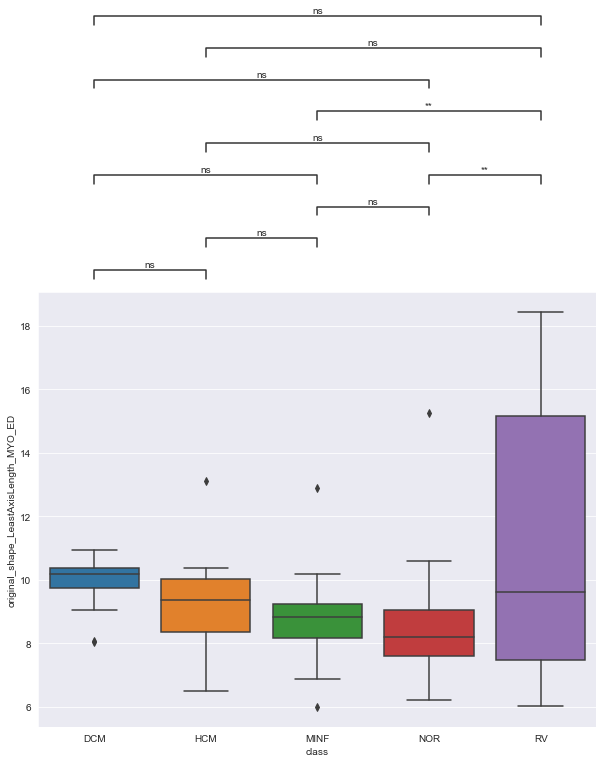

----------   original_shape_MajorAxisLength_MYO_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM -10.9602 0.0118 -20.2117 -1.7086   True
   DCM   MINF  -7.1361   0.21 -16.3876  2.1154  False
   DCM    NOR -15.6986  0.001 -24.9501  -6.447   True
   DCM     RV -18.7889  0.001 -28.0404 -9.5373   True
   HCM   MINF    3.824 0.7534  -5.4275 13.0756  False
   HCM    NOR  -4.7384 0.5992 -13.9899  4.5131  False
   HCM     RV  -7.8287 0.1374 -17.0802  1.4228  False
  MINF    NOR  -8.5624 0.0837  -17.814  0.6891  False
  MINF     RV -11.6527 0.0062 -20.9043 -2.4012   True
   NOR     RV  -3.0903 0.8772 -12.3418  6.1612  False
-----------------------------------------------------


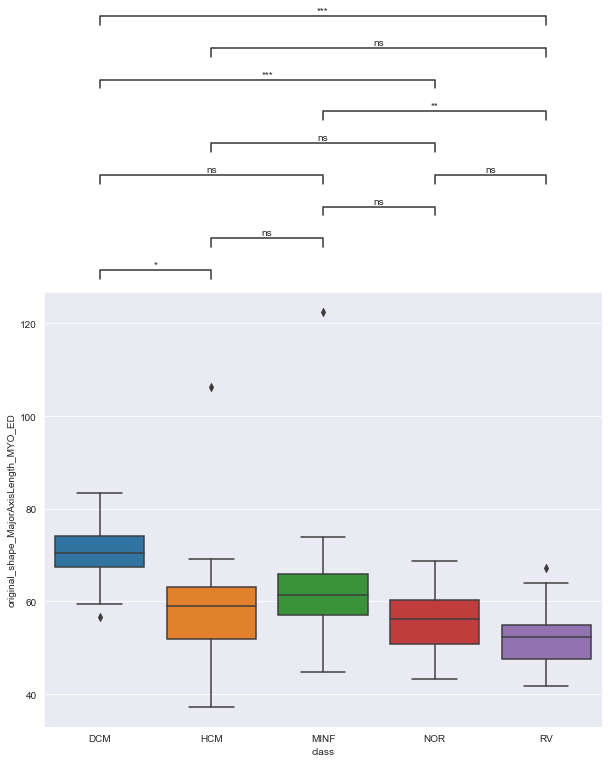

----------   original_shape_Maximum2DDiameterColumn_MYO_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  -8.3851 0.0856 -17.4785  0.7083  False
   DCM   MINF  -6.5708 0.2695 -15.6642  2.5226  False
   DCM    NOR -14.4417  0.001 -23.5351 -5.3483   True
   DCM     RV -16.1943  0.001 -25.2877 -7.1009   True
   HCM   MINF   1.8143    0.9  -7.2791 10.9077  False
   HCM    NOR  -6.0566 0.3507   -15.15  3.0368  False
   HCM     RV  -7.8092 0.1273 -16.9026  1.2842  False
  MINF    NOR  -7.8709 0.1226 -16.9643  1.2225  False
  MINF     RV  -9.6235 0.0325 -18.7169 -0.5301   True
   NOR     RV  -1.7526    0.9  -10.846  7.3408  False
-----------------------------------------------------


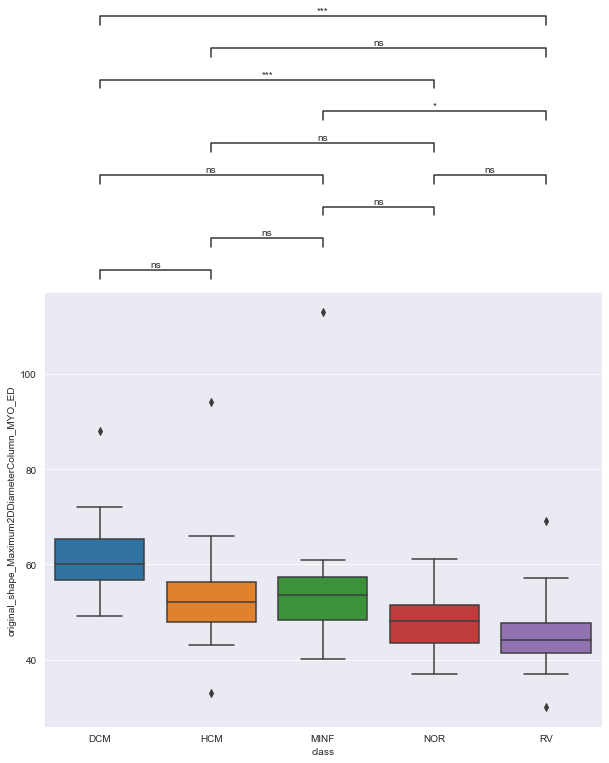

----------   original_shape_Maximum2DDiameterRow_MYO_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  -6.6329 0.3125 -16.2255  2.9597  False
   DCM   MINF  -6.3566  0.356 -15.9492  3.2359  False
   DCM    NOR -14.0708  0.001 -23.6634 -4.4782   True
   DCM     RV -16.2548  0.001 -25.8473 -6.6622   True
   HCM   MINF   0.2763    0.9  -9.3163  9.8688  False
   HCM    NOR  -7.4379 0.2055 -17.0305  2.1547  False
   HCM     RV  -9.6219 0.0489 -19.2144 -0.0293   True
  MINF    NOR  -7.7142 0.1753 -17.3067  1.8784  False
  MINF     RV  -9.8981 0.0397 -19.4907 -0.3056   True
   NOR     RV   -2.184    0.9 -11.7765  7.4086  False
-----------------------------------------------------


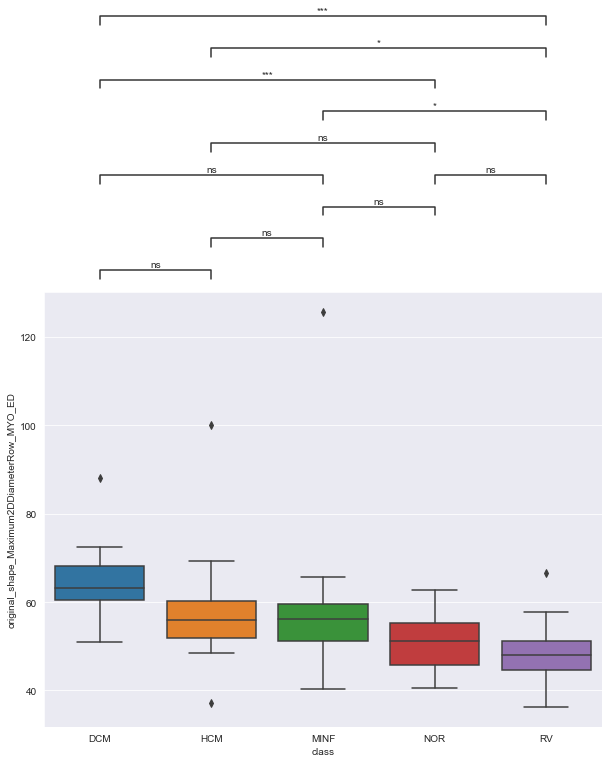

----------   original_shape_Maximum2DDiameterSlice_MYO_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  -5.6841  0.448 -15.0506  3.6824  False
   DCM   MINF   -4.851 0.5902 -14.2175  4.5156  False
   DCM    NOR -13.4678 0.0012 -22.8343 -4.1012   True
   DCM     RV -15.4841  0.001 -24.8506 -6.1175   True
   HCM   MINF   0.8331    0.9  -8.5334 10.1997  False
   HCM    NOR  -7.7837 0.1505 -17.1502  1.5829  False
   HCM     RV     -9.8 0.0356 -19.1665 -0.4335   True
  MINF    NOR  -8.6168 0.0868 -17.9833  0.7498  False
  MINF     RV -10.6331 0.0178 -19.9996 -1.2666   True
   NOR     RV  -2.0163    0.9 -11.3829  7.3502  False
-----------------------------------------------------


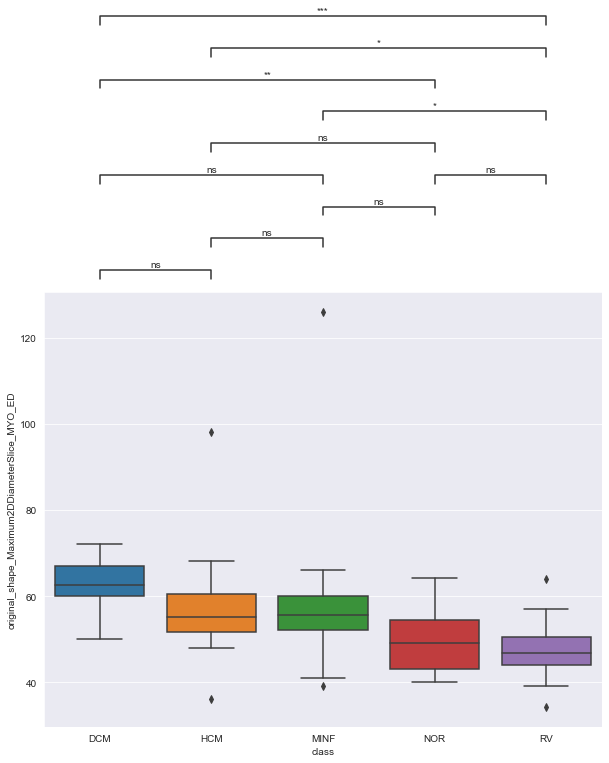

----------   original_shape_Maximum3DDiameter_MYO_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  -6.9449 0.2754 -16.6151  2.7253  False
   DCM   MINF  -6.4209 0.3539 -16.0911  3.2493  False
   DCM    NOR -14.7175  0.001 -24.3877 -5.0473   True
   DCM     RV -15.7635  0.001 -25.4337 -6.0933   True
   HCM   MINF    0.524    0.9  -9.1462 10.1942  False
   HCM    NOR  -7.7727 0.1757 -17.4429  1.8976  False
   HCM     RV  -8.8187 0.0912 -18.4889  0.8515  False
  MINF    NOR  -8.2966 0.1279 -17.9668  1.3736  False
  MINF     RV  -9.3426 0.0636 -19.0128  0.3276  False
   NOR     RV   -1.046    0.9 -10.7162  8.6242  False
-----------------------------------------------------


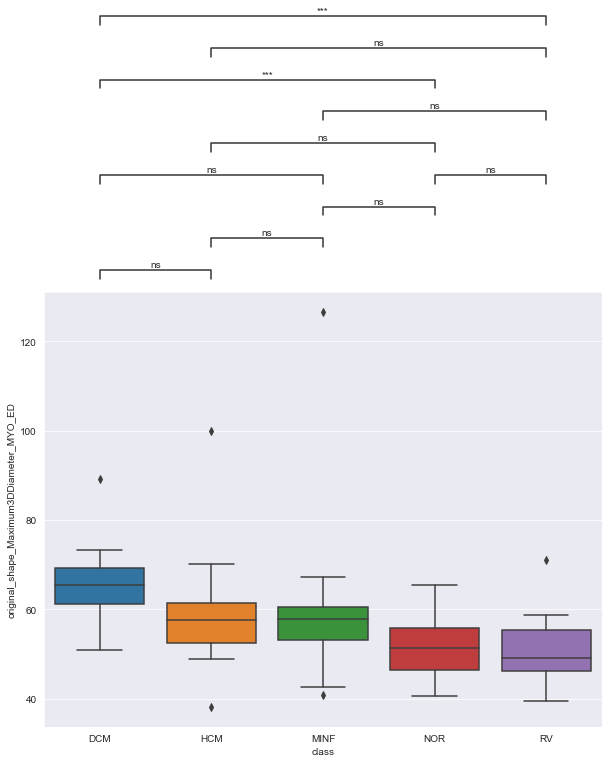

----------   original_shape_MeshVolume_MYO_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   DCM    HCM  1229.3354   0.69  -1478.688 3937.3588  False
   DCM   MINF -1010.0854 0.8164 -3718.1088  1697.938  False
   DCM    NOR  -2651.775  0.058 -5359.7984   56.2484  False
   DCM     RV  -2618.825 0.0632 -5326.8484   89.1984  False
   HCM   MINF -2239.4208 0.1541 -4947.4443  468.6026  False
   HCM    NOR -3881.1104 0.0012 -6589.1338 -1173.087   True
   HCM     RV -3848.1604 0.0014 -6556.1838 -1140.137   True
  MINF    NOR -1641.6896  0.449  -4349.713 1066.3338  False
  MINF     RV -1608.7396 0.4695  -4316.763 1099.2838  False
   NOR     RV      32.95    0.9 -2675.0734 2740.9734  False
-----------------------------------------------------------


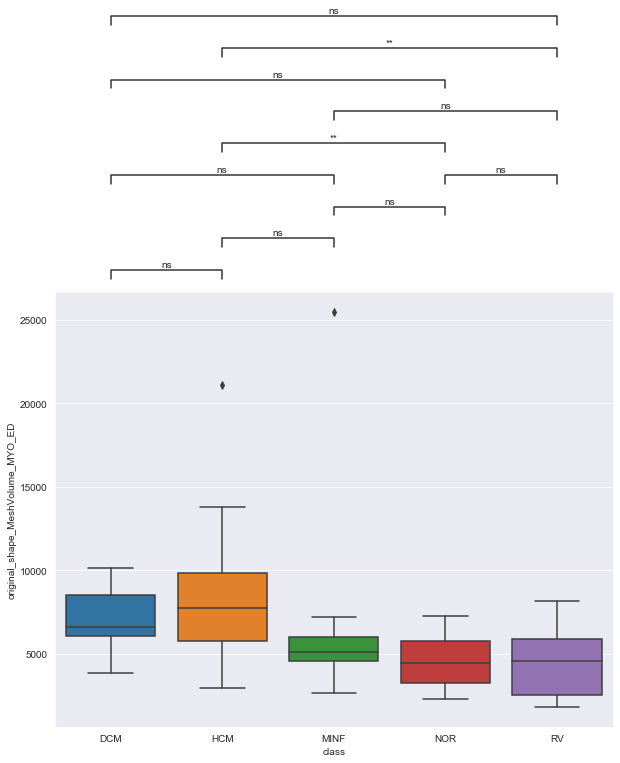

----------   original_shape_MinorAxisLength_MYO_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   DCM    HCM -12.4845  0.001 -21.0857  -3.8834   True
   DCM   MINF  -7.8572 0.0902 -16.4584    0.744  False
   DCM    NOR -16.0914  0.001 -24.6925  -7.4902   True
   DCM     RV -21.1224  0.001 -29.7236 -12.5212   True
   HCM   MINF   4.6273 0.5589  -3.9738  13.2285  False
   HCM    NOR  -3.6068  0.744  -12.208   4.9944  False
   HCM     RV  -8.6378 0.0485  -17.239  -0.0367   True
  MINF    NOR  -8.2341 0.0676 -16.8353    0.367  False
  MINF     RV -13.2652  0.001 -21.8664   -4.664   True
   NOR     RV   -5.031 0.4847 -13.6322   3.5701  False
------------------------------------------------------


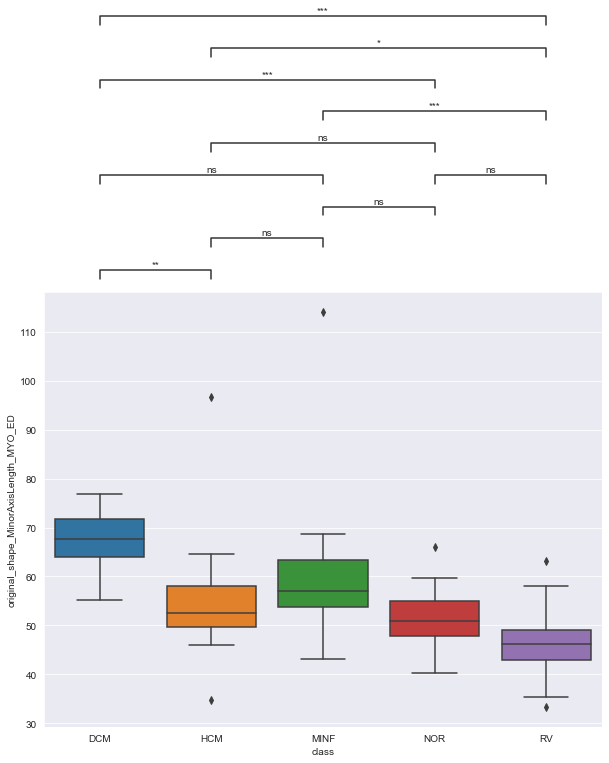

----------   original_shape_Sphericity_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0705  0.001  0.0409  0.1001   True
   DCM   MINF   0.0233 0.1925 -0.0063  0.0529  False
   DCM    NOR   0.0519  0.001  0.0223  0.0814   True
   DCM     RV   0.0334 0.0188  0.0038   0.063   True
   HCM   MINF  -0.0472  0.001 -0.0768 -0.0176   True
   HCM    NOR  -0.0187  0.408 -0.0483  0.0109  False
   HCM     RV  -0.0371 0.0065 -0.0667 -0.0075   True
  MINF    NOR   0.0285 0.0643  -0.001  0.0581  False
  MINF     RV   0.0101 0.8665 -0.0195  0.0397  False
   NOR     RV  -0.0185 0.4197 -0.0481  0.0111  False
----------------------------------------------------


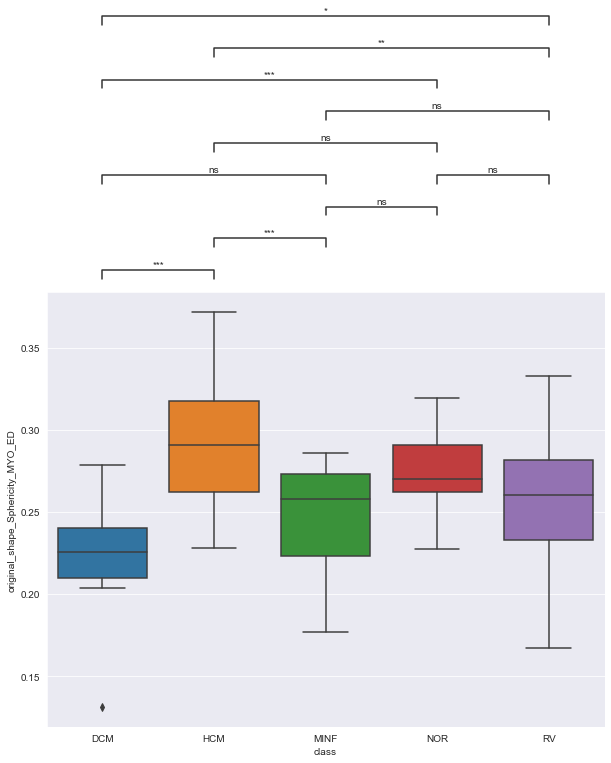

----------   original_shape_SurfaceArea_MYO_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   DCM    HCM -1317.5574 0.5151 -3645.2061  1010.0913  False
   DCM   MINF -1504.3581 0.3823 -3832.0068   823.2906  False
   DCM    NOR -3440.2944  0.001 -5767.9431 -1112.6457   True
   DCM     RV -2972.1357 0.0053 -5299.7844   -644.487   True
   HCM   MINF  -186.8007    0.9 -2514.4494   2140.848  False
   HCM    NOR  -2122.737 0.0912 -4450.3857   204.9117  False
   HCM     RV -1654.5784 0.2854 -3982.2271   673.0704  False
  MINF    NOR -1935.9363 0.1498  -4263.585   391.7124  False
  MINF     RV -1467.7776 0.4082 -3795.4264   859.8711  False
   NOR     RV   468.1586    0.9 -1859.4901  2795.8073  False
------------------------------------------------------------


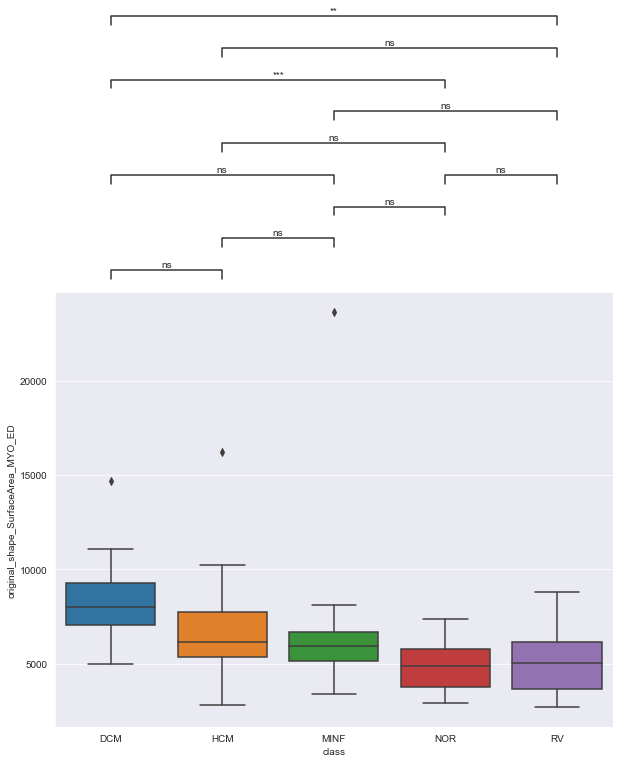

----------   original_shape_SurfaceVolumeRatio_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM  -0.3077  0.001 -0.4782 -0.1373   True
   DCM   MINF  -0.0252    0.9 -0.1957  0.1452  False
   DCM    NOR  -0.0583 0.8651 -0.2287  0.1122  False
   DCM     RV   0.0541    0.9 -0.1163  0.2246  False
   HCM   MINF   0.2825  0.001  0.1121   0.453   True
   HCM    NOR   0.2495  0.001   0.079  0.4199   True
   HCM     RV   0.3619  0.001  0.1914  0.5323   True
  MINF    NOR   -0.033    0.9 -0.2035  0.1374  False
  MINF     RV   0.0793 0.6721 -0.0911  0.2498  False
   NOR     RV   0.1124 0.3614 -0.0581  0.2828  False
----------------------------------------------------


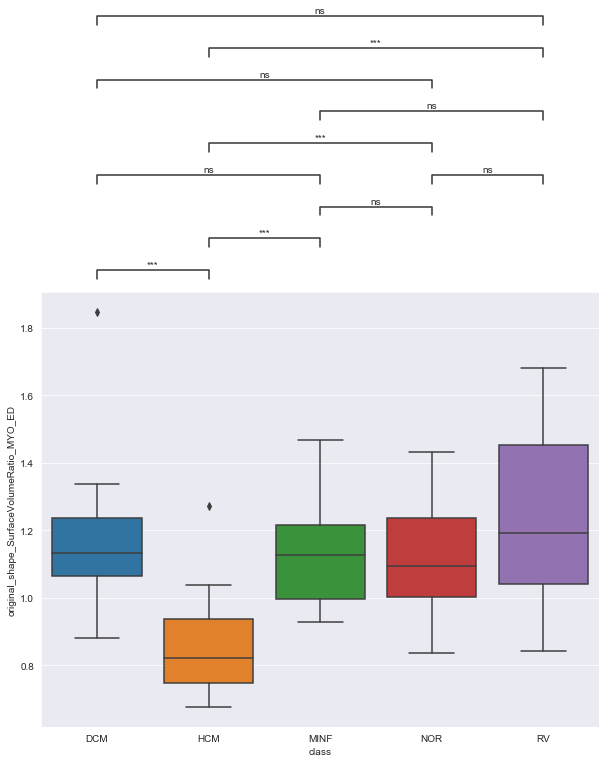

----------   original_shape_VoxelVolume_MYO_ED --------- 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower      upper    reject
----------------------------------------------------------
   DCM    HCM   1185.1 0.7171 -1529.2091  3899.4091  False
   DCM   MINF  -1042.4 0.7991 -3756.7091  1671.9091  False
   DCM    NOR -2703.45 0.0515 -5417.7591    10.8591  False
   DCM     RV -2649.25 0.0593 -5363.5591    65.0591  False
   HCM   MINF  -2227.5 0.1599 -4941.8091   486.8091  False
   HCM    NOR -3888.55 0.0012 -6602.8591 -1174.2409   True
   HCM     RV -3834.35 0.0015 -6548.6591 -1120.0409   True
  MINF    NOR -1661.05 0.4394 -4375.3591  1053.2591  False
  MINF     RV -1606.85 0.4729 -4321.1591  1107.4591  False
   NOR     RV     54.2    0.9 -2660.1091  2768.5091  False
----------------------------------------------------------


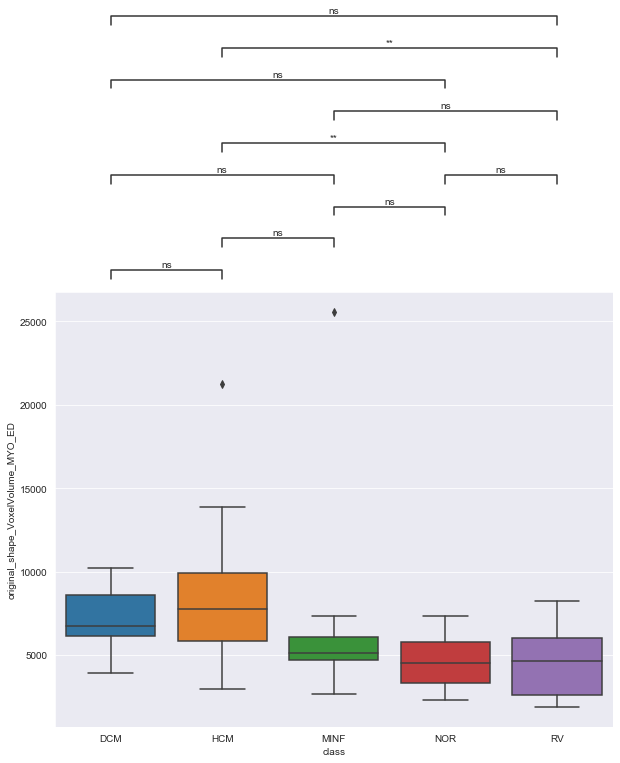

----------   original_firstorder_Kurtosis_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.7985 0.6549 -0.8775  2.4746  False
   DCM   MINF  -1.2815 0.2177 -2.9576  0.3945  False
   DCM    NOR   -0.531    0.9 -2.2071   1.145  False
   DCM     RV  -1.1956 0.2819 -2.8717  0.4804  False
   HCM   MINF    -2.08 0.0073 -3.7561  -0.404   True
   HCM    NOR  -1.3295 0.1864 -3.0056  0.3465  False
   HCM     RV  -1.9941 0.0113 -3.6702 -0.3181   True
  MINF    NOR   0.7505 0.6997 -0.9256  2.4265  False
  MINF     RV   0.0859    0.9 -1.5901   1.762  False
   NOR     RV  -0.6646 0.7797 -2.3406  1.0115  False
----------------------------------------------------


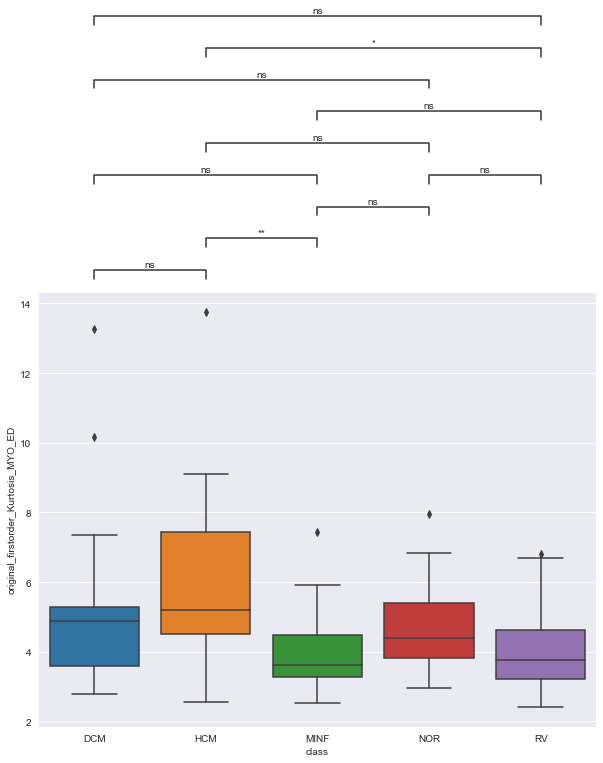

----------   original_glcm_Idmn_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0039 0.3339 -0.0019  0.0098  False
   DCM   MINF  -0.0017    0.9 -0.0076  0.0041  False
   DCM    NOR   0.0004    0.9 -0.0054  0.0062  False
   DCM     RV  -0.0038 0.3842 -0.0096  0.0021  False
   HCM   MINF  -0.0057 0.0596 -0.0115  0.0001  False
   HCM    NOR  -0.0036 0.4435 -0.0094  0.0023  False
   HCM     RV  -0.0077 0.0035 -0.0135 -0.0019   True
  MINF    NOR   0.0021 0.8277 -0.0037   0.008  False
  MINF     RV   -0.002 0.8572 -0.0079  0.0038  False
   NOR     RV  -0.0042  0.283   -0.01  0.0017  False
----------------------------------------------------


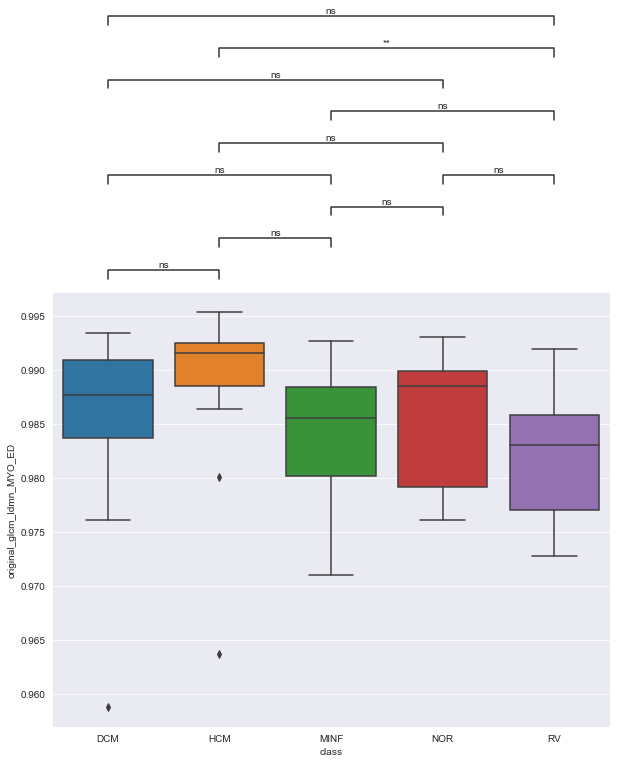

----------   original_glcm_Idn_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0103 0.2561 -0.0038  0.0244  False
   DCM   MINF  -0.0019    0.9  -0.016  0.0122  False
   DCM    NOR     -0.0    0.9 -0.0141   0.014  False
   DCM     RV  -0.0077 0.5449 -0.0218  0.0064  False
   HCM   MINF  -0.0122 0.1198 -0.0263  0.0018  False
   HCM    NOR  -0.0104 0.2521 -0.0245  0.0037  False
   HCM     RV   -0.018 0.0052 -0.0321 -0.0039   True
  MINF    NOR   0.0019    0.9 -0.0122   0.016  False
  MINF     RV  -0.0058 0.7578 -0.0199  0.0083  False
   NOR     RV  -0.0077 0.5498 -0.0217  0.0064  False
----------------------------------------------------


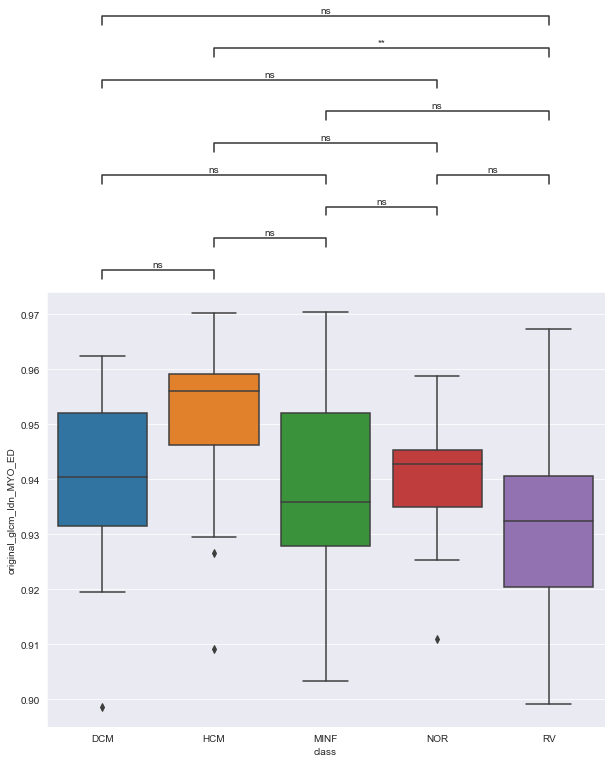

----------   original_glcm_Imc1_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   -0.036 0.2661 -0.0856 0.0136  False
   DCM   MINF  -0.0245 0.6272 -0.0741 0.0251  False
   DCM    NOR   0.0073    0.9 -0.0423 0.0569  False
   DCM     RV   0.0207 0.7478 -0.0289 0.0703  False
   HCM   MINF   0.0115    0.9 -0.0381 0.0611  False
   HCM    NOR   0.0433 0.1174 -0.0063 0.0929  False
   HCM     RV   0.0567 0.0168   0.007 0.1063   True
  MINF    NOR   0.0318   0.39 -0.0178 0.0814  False
  MINF     RV   0.0452 0.0917 -0.0044 0.0948  False
   NOR     RV   0.0134    0.9 -0.0362  0.063  False
---------------------------------------------------


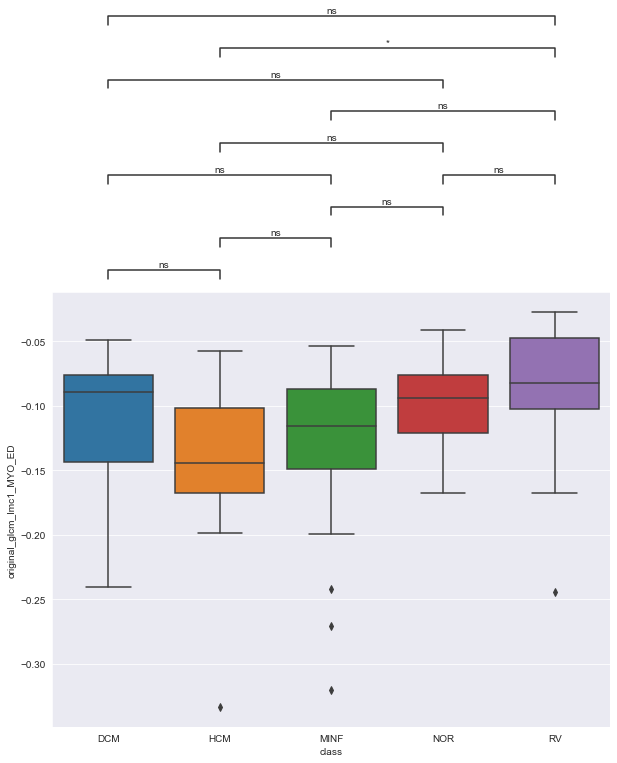

----------   original_glcm_Imc2_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.0806 0.4526 -0.0528  0.2141  False
   DCM   MINF   0.0118    0.9 -0.1217  0.1452  False
   DCM    NOR   0.0127    0.9 -0.1208  0.1462  False
   DCM     RV  -0.0754 0.5166 -0.2089  0.0581  False
   HCM   MINF  -0.0689  0.593 -0.2024  0.0646  False
   HCM    NOR   -0.068 0.6039 -0.2015  0.0655  False
   HCM     RV  -0.1561 0.0135 -0.2896 -0.0226   True
  MINF    NOR   0.0009    0.9 -0.1326  0.1344  False
  MINF     RV  -0.0872 0.3713 -0.2207  0.0463  False
   NOR     RV  -0.0881 0.3601 -0.2216  0.0454  False
----------------------------------------------------


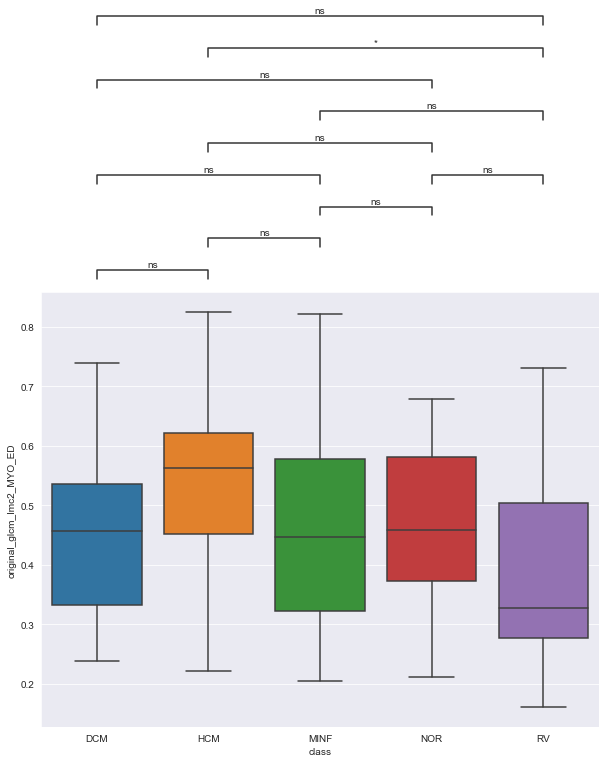

----------   original_glcm_MCC_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM    0.076 0.3821 -0.0415  0.1935  False
   DCM   MINF   0.0122    0.9 -0.1053  0.1298  False
   DCM    NOR  -0.0063    0.9 -0.1238  0.1112  False
   DCM     RV  -0.0707 0.4572 -0.1882  0.0468  False
   HCM   MINF  -0.0637 0.5522 -0.1812  0.0538  False
   HCM    NOR  -0.0823 0.3004 -0.1998  0.0353  False
   HCM     RV  -0.1466 0.0069 -0.2641 -0.0291   True
  MINF    NOR  -0.0185    0.9  -0.136   0.099  False
  MINF     RV  -0.0829 0.2926 -0.2004  0.0346  False
   NOR     RV  -0.0644 0.5435 -0.1819  0.0531  False
----------------------------------------------------


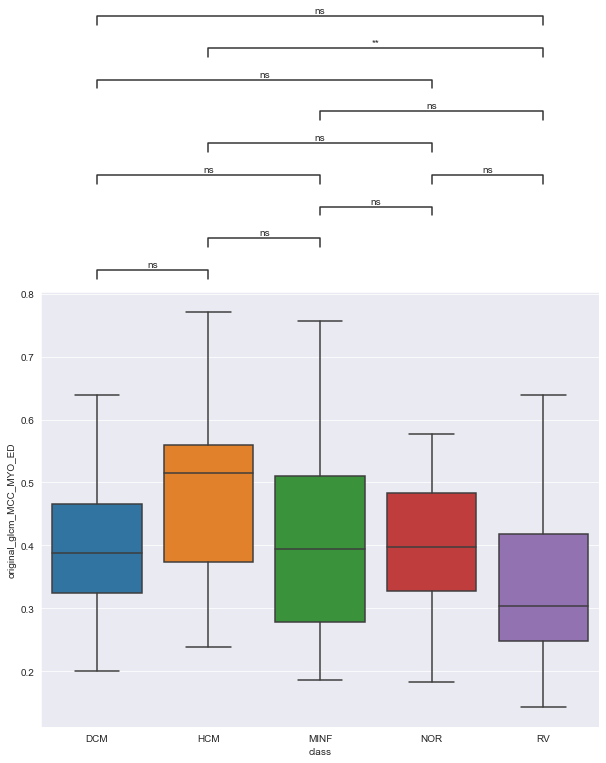

----------   original_gldm_DependenceEntropy_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.2094 0.5359 -0.1695  0.5882  False
   DCM   MINF  -0.1064    0.9 -0.4852  0.2725  False
   DCM    NOR   0.0419    0.9 -0.3369  0.4208  False
   DCM     RV  -0.2527 0.3493 -0.6315  0.1262  False
   HCM   MINF  -0.3158 0.1483 -0.6946  0.0631  False
   HCM    NOR  -0.1675 0.7086 -0.5463  0.2114  False
   HCM     RV  -0.4621 0.0088 -0.8409 -0.0832   True
  MINF    NOR   0.1483 0.7877 -0.2306  0.5271  False
  MINF     RV  -0.1463 0.7958 -0.5251  0.2326  False
   NOR     RV  -0.2946 0.2031 -0.6734  0.0843  False
----------------------------------------------------


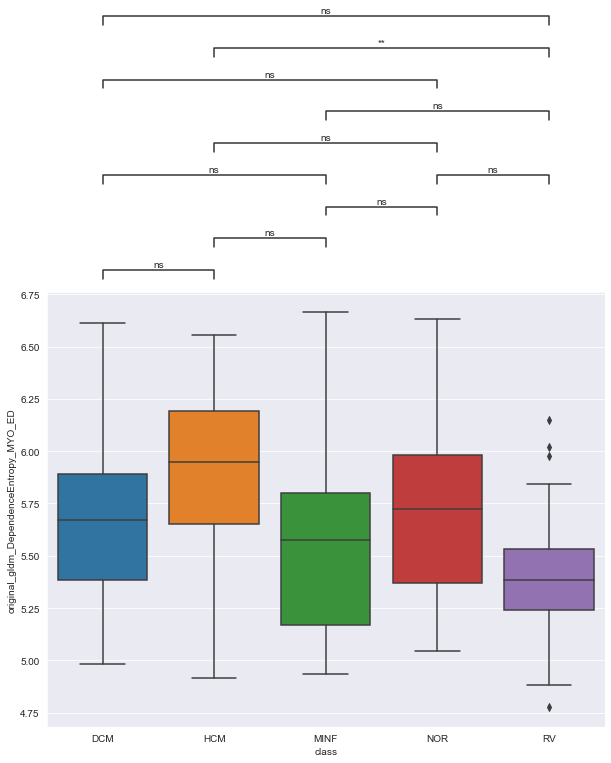

----------   original_gldm_GrayLevelNonUniformity_MYO_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   DCM    HCM   495.2591    0.9 -1060.0254 2050.5436  False
   DCM   MINF   -30.5233    0.9 -1585.8078 1524.7612  False
   DCM    NOR -1122.4843 0.2707 -2677.7688  432.8002  False
   DCM     RV  -694.1983 0.7019 -2249.4828  861.0862  False
   HCM   MINF  -525.7824 0.8709 -2081.0668 1029.5021  False
   HCM    NOR -1617.7434 0.0373 -3173.0279  -62.4589   True
   HCM     RV -1189.4574 0.2175 -2744.7419  365.8271  False
  MINF    NOR -1091.9611 0.2975 -2647.2456  463.3234  False
  MINF     RV   -663.675 0.7325 -2218.9595  891.6095  False
   NOR     RV    428.286    0.9 -1126.9985 1983.5705  False
-----------------------------------------------------------


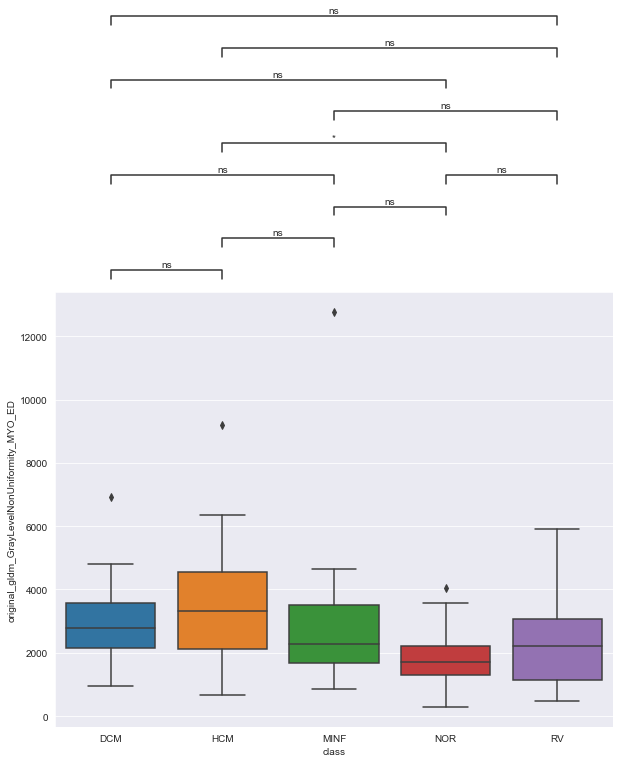

----------   original_gldm_LargeDependenceHighGrayLevelEmphasis_MYO_ED --------- 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
   DCM    HCM  645.1901 0.0114   102.4147 1187.9656   True
   DCM   MINF -113.9127    0.9  -656.6882  428.8627  False
   DCM    NOR  174.2659 0.8974  -368.5095  717.0414  False
   DCM     RV -297.0582 0.5443  -839.8337  245.7172  False
   HCM   MINF -759.1029 0.0017 -1301.8784 -216.3274   True
   HCM    NOR -470.9242 0.1211 -1013.6997   71.8513  False
   HCM     RV -942.2484  0.001 -1485.0238 -399.4729   True
  MINF    NOR  288.1787 0.5699  -254.5968  830.9541  False
  MINF     RV -183.1455 0.8719   -725.921    359.63  False
   NOR     RV -471.3242 0.1205 -1014.0996   71.4513  False
----------------------------------------------------------


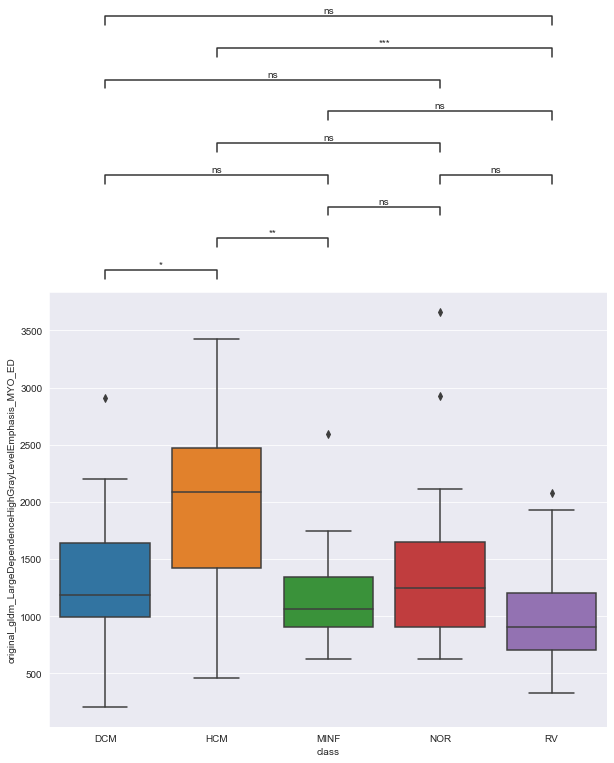

----------   original_gldm_SmallDependenceLowGrayLevelEmphasis_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM  -0.0022 0.5497 -0.0063 0.0019  False
   DCM   MINF   0.0007    0.9 -0.0033 0.0048  False
   DCM    NOR  -0.0001    0.9 -0.0041  0.004  False
   DCM     RV    0.004 0.0557 -0.0001 0.0081  False
   HCM   MINF    0.003 0.2628 -0.0011  0.007  False
   HCM    NOR   0.0021 0.5776 -0.0019 0.0062  False
   HCM     RV   0.0062  0.001  0.0021 0.0103   True
  MINF    NOR  -0.0008    0.9 -0.0049 0.0032  False
  MINF     RV   0.0032 0.1785 -0.0008 0.0073  False
   NOR     RV   0.0041  0.049     0.0 0.0081   True
---------------------------------------------------


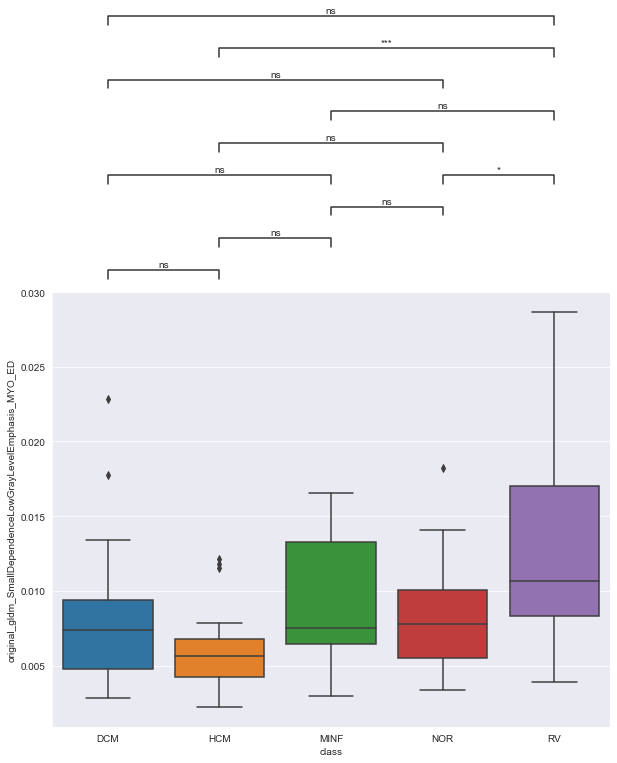

----------   original_glrlm_GrayLevelNonUniformity_MYO_ED --------- 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   DCM    HCM  -81.4156    0.9  -681.3179 518.4868  False
   DCM   MINF -256.8025 0.7304  -856.7049 343.0998  False
   DCM    NOR -689.3161 0.0159 -1289.2184 -89.4138   True
   DCM     RV -468.0545 0.2002 -1067.9568 131.8479  False
   HCM   MINF  -175.387    0.9  -775.2893 424.5154  False
   HCM    NOR -607.9005 0.0454 -1207.8029  -7.9982   True
   HCM     RV -386.6389 0.3853  -986.5412 213.2634  False
  MINF    NOR -432.5136 0.2717 -1032.4159 167.3888  False
  MINF     RV -211.2519 0.8489  -811.1543 388.6504  False
   NOR     RV  221.2616 0.8229  -378.6407  821.164  False
---------------------------------------------------------


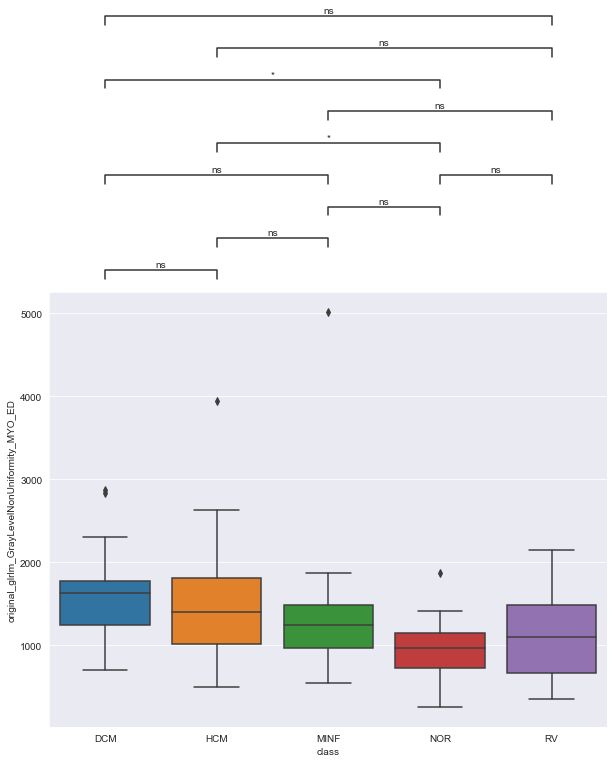

----------   original_glrlm_LongRunHighGrayLevelEmphasis_MYO_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM  29.3749  0.272 -11.3837 70.1334  False
   DCM   MINF   5.5324    0.9 -35.2261  46.291  False
   DCM    NOR  11.5471    0.9 -29.2114 52.3056  False
   DCM     RV -16.9638 0.7489 -57.7223 23.7948  False
   HCM   MINF -23.8424 0.4847  -64.601 16.9161  False
   HCM    NOR -17.8278 0.7159 -58.5863 22.9308  False
   HCM     RV -46.3386 0.0176 -87.0972 -5.5801   True
  MINF    NOR   6.0147    0.9 -34.7439 46.7732  False
  MINF     RV -22.4962 0.5371 -63.2547 18.2623  False
   NOR     RV -28.5109 0.3011 -69.2694 12.2477  False
-----------------------------------------------------


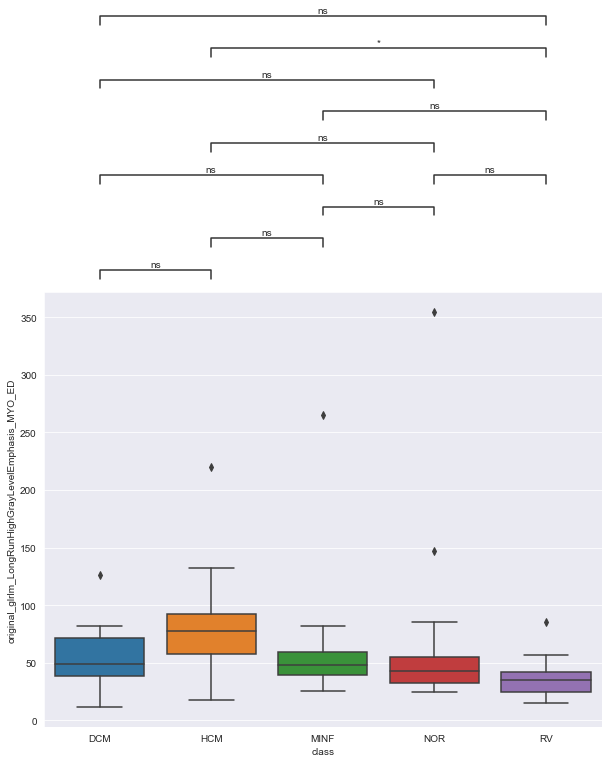

----------   original_glrlm_RunEntropy_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   DCM    HCM   0.3645  0.014  0.0515  0.6775   True
   DCM   MINF   0.0306    0.9 -0.2825  0.3436  False
   DCM    NOR   0.0988    0.9 -0.2142  0.4118  False
   DCM     RV  -0.2016 0.3862 -0.5146  0.1115  False
   HCM   MINF  -0.3339 0.0305  -0.647 -0.0209   True
   HCM    NOR  -0.2657 0.1352 -0.5787  0.0473  False
   HCM     RV  -0.5661  0.001 -0.8791  -0.253   True
  MINF    NOR   0.0682    0.9 -0.2448  0.3813  False
  MINF     RV  -0.2321 0.2451 -0.5452  0.0809  False
   NOR     RV  -0.3004 0.0666 -0.6134  0.0127  False
----------------------------------------------------


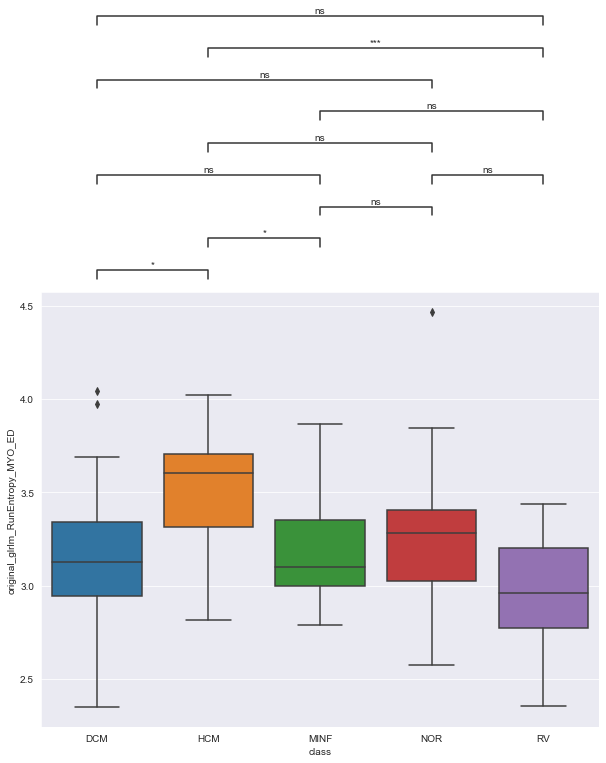

----------   original_glrlm_RunLengthNonUniformity_MYO_ED --------- 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   DCM    HCM  -414.4792 0.5004 -1134.7281  305.7697  False
   DCM   MINF  -820.5894 0.0172 -1540.8383 -100.3405   True
   DCM    NOR -1071.5088  0.001 -1791.7577 -351.2599   True
   DCM     RV -1189.4698  0.001 -1909.7187 -469.2209   True
   HCM   MINF  -406.1102 0.5185 -1126.3591  314.1387  False
   HCM    NOR  -657.0296  0.091 -1377.2785   63.2192  False
   HCM     RV  -774.9906 0.0284 -1495.2395  -54.7417   True
  MINF    NOR  -250.9195 0.8548  -971.1683  469.3294  False
  MINF     RV  -368.8804 0.5992 -1089.1293  351.3685  False
   NOR     RV   -117.961    0.9  -838.2098  602.2879  False
-----------------------------------------------------------


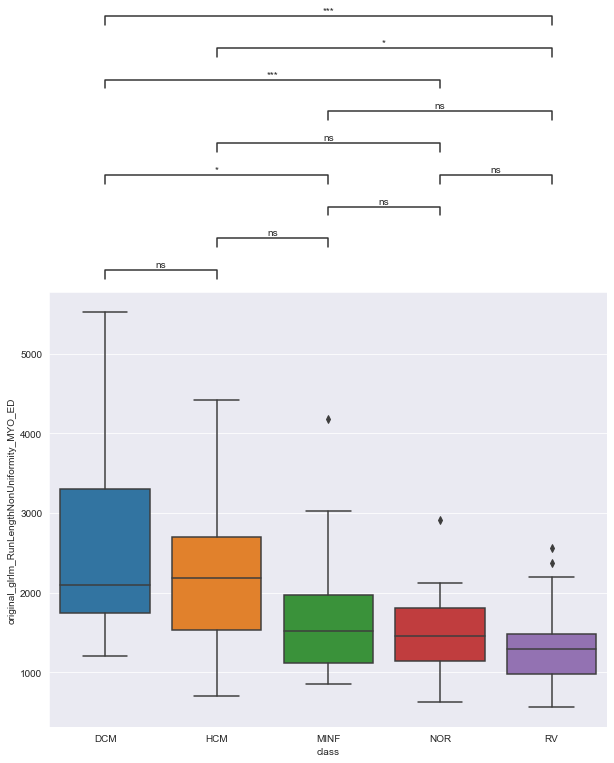

----------   original_glrlm_RunVariance_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   1.5091 0.4244 -0.9214 3.9395  False
   DCM   MINF   1.6657 0.3213 -0.7647 4.0961  False
   DCM    NOR  -0.3647    0.9 -2.7952 2.0657  False
   DCM     RV  -0.1678    0.9 -2.5982 2.2627  False
   HCM   MINF   0.1566    0.9 -2.2738 2.5871  False
   HCM    NOR  -1.8738 0.2104 -4.3042 0.5566  False
   HCM     RV  -1.6769 0.3147 -4.1073 0.7536  False
  MINF    NOR  -2.0304 0.1466 -4.4609    0.4  False
  MINF     RV  -1.8335 0.2296 -4.2639  0.597  False
   NOR     RV   0.1969    0.9 -2.2335 2.6274  False
---------------------------------------------------


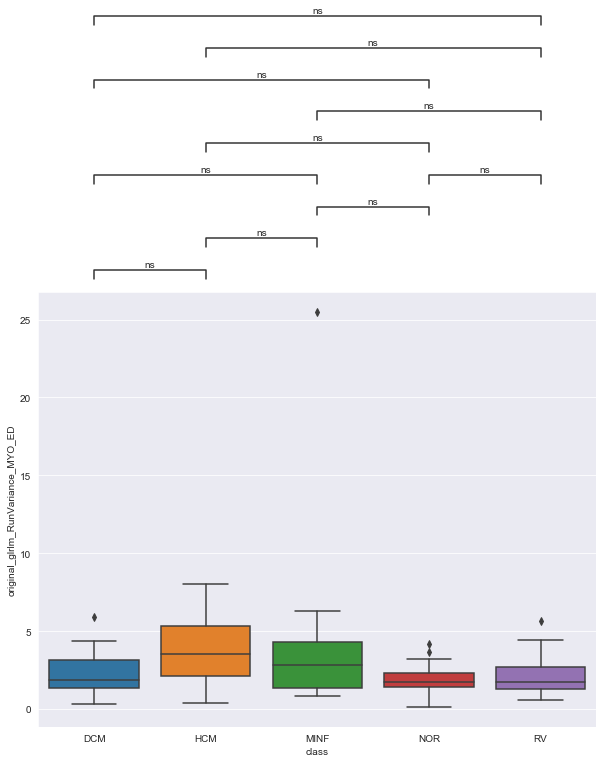

----------   original_glszm_GrayLevelNonUniformity_MYO_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   DCM    HCM -10.4819  0.391 -26.8346  5.8709  False
   DCM   MINF -19.9631 0.0087 -36.3159 -3.6103   True
   DCM    NOR    -17.4 0.0312 -33.7528 -1.0472   True
   DCM     RV -18.4087 0.0192 -34.7615 -2.0559   True
   HCM   MINF  -9.4812 0.4933  -25.834  6.8715  False
   HCM    NOR  -6.9181 0.7382 -23.2709  9.4346  False
   HCM     RV  -7.9268  0.642 -24.2796  8.4259  False
  MINF    NOR   2.5631    0.9 -13.7897 18.9159  False
  MINF     RV   1.5544    0.9 -14.7984 17.9072  False
   NOR     RV  -1.0087    0.9 -17.3615 15.3441  False
-----------------------------------------------------


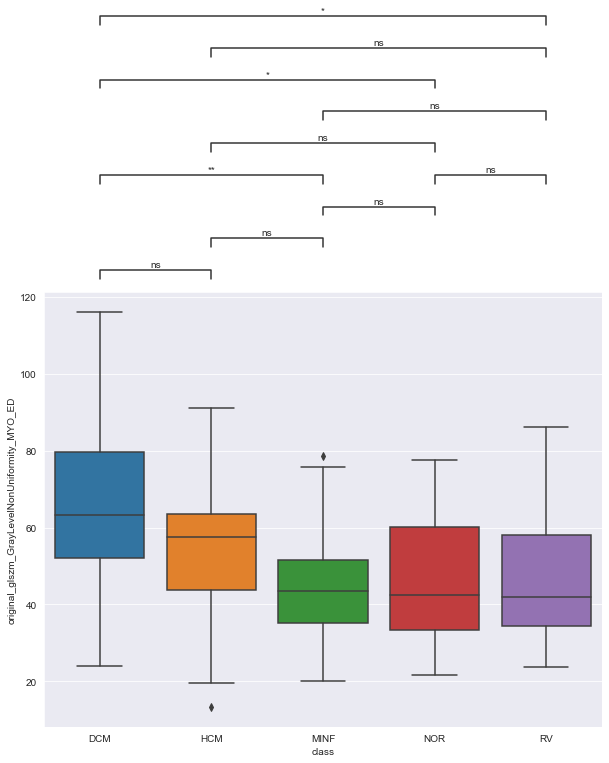

----------   original_glszm_SizeZoneNonUniformity_MYO_ED --------- 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
   DCM    HCM -25.0282    0.9 -109.2242 59.1678  False
   DCM   MINF -74.3371   0.11 -158.5331  9.8588  False
   DCM    NOR -36.2842 0.7259 -120.4801 47.9118  False
   DCM     RV -83.2405 0.0542 -167.4364  0.9555  False
   HCM   MINF  -49.309 0.4835 -133.5049  34.887  False
   HCM    NOR  -11.256    0.9  -95.4519   72.94  False
   HCM     RV -58.2123 0.3126 -142.4083 25.9837  False
  MINF    NOR   38.053 0.6931   -46.143 122.249  False
  MINF     RV  -8.9033    0.9  -93.0993 75.2926  False
   NOR     RV -46.9563 0.5281 -131.1523 37.2397  False
------------------------------------------------------


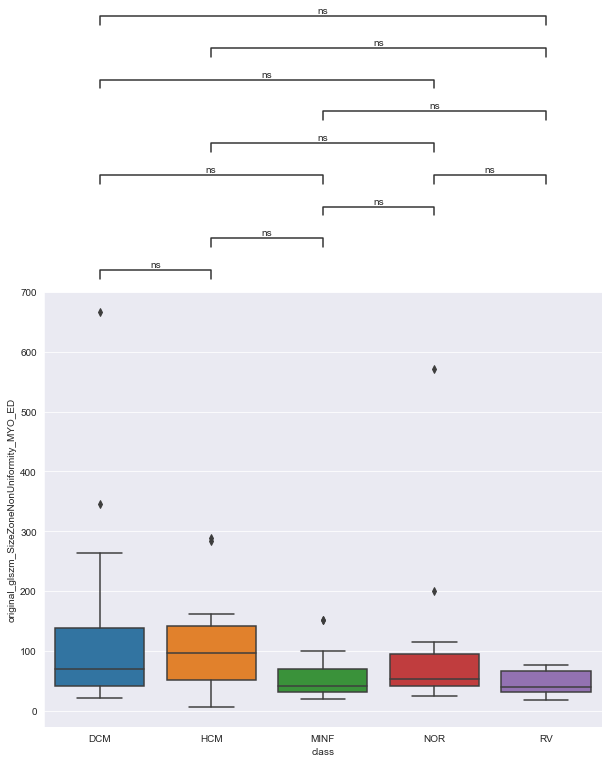

----------   original_glszm_SizeZoneNonUniformityNormalized_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0059    0.9 -0.0424 0.0542  False
   DCM   MINF  -0.0388 0.1767 -0.0871 0.0095  False
   DCM    NOR   0.0118    0.9 -0.0365 0.0601  False
   DCM     RV  -0.0269 0.5294 -0.0752 0.0214  False
   HCM   MINF  -0.0447 0.0842  -0.093 0.0036  False
   HCM    NOR   0.0059    0.9 -0.0424 0.0542  False
   HCM     RV  -0.0328 0.3313 -0.0811 0.0155  False
  MINF    NOR   0.0506 0.0355  0.0023 0.0989   True
  MINF     RV   0.0119    0.9 -0.0364 0.0602  False
   NOR     RV  -0.0387 0.1786  -0.087 0.0096  False
---------------------------------------------------


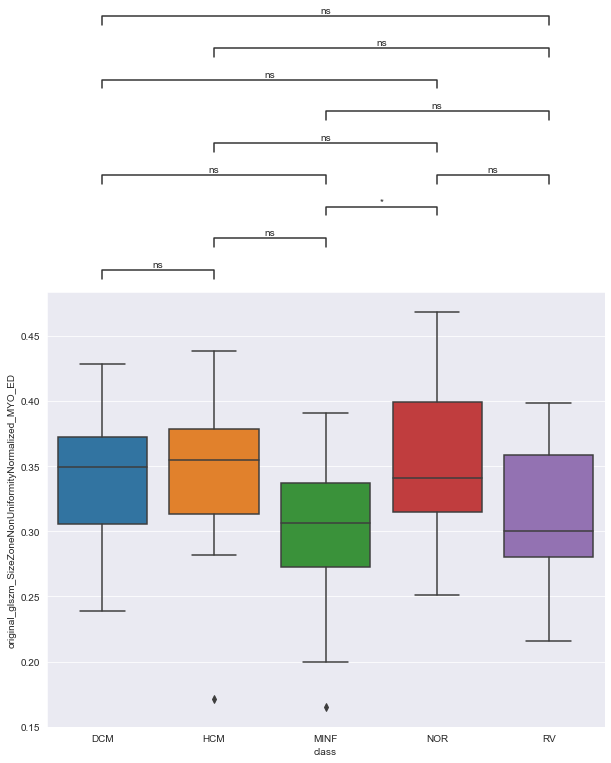

----------   original_glszm_SmallAreaEmphasis_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0041    0.9 -0.0445 0.0527  False
   DCM   MINF  -0.0386 0.1852 -0.0872   0.01  False
   DCM    NOR   0.0099    0.9 -0.0387 0.0584  False
   DCM     RV  -0.0275  0.516 -0.0761 0.0211  False
   HCM   MINF  -0.0427 0.1131 -0.0913 0.0059  False
   HCM    NOR   0.0058    0.9 -0.0428 0.0544  False
   HCM     RV  -0.0316 0.3771 -0.0802  0.017  False
  MINF    NOR   0.0485  0.051 -0.0001  0.097  False
  MINF     RV   0.0111    0.9 -0.0375 0.0597  False
   NOR     RV  -0.0373 0.2136 -0.0859 0.0113  False
---------------------------------------------------


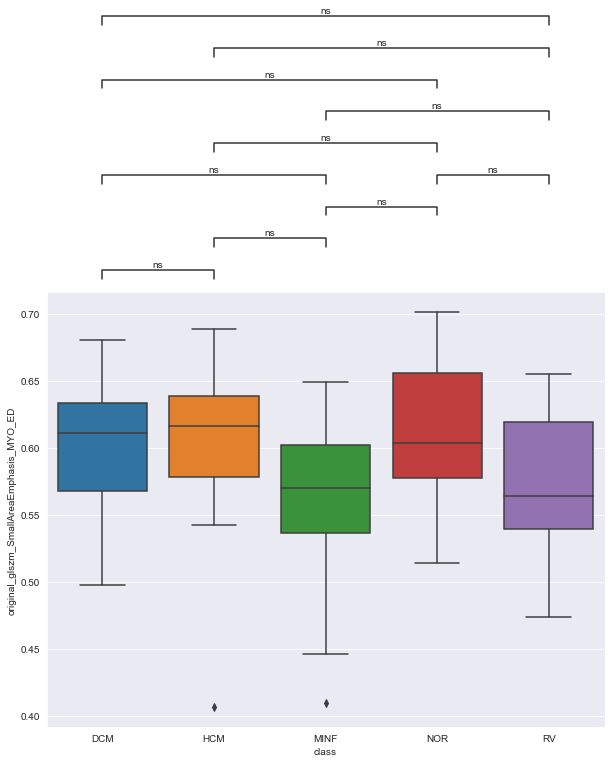

----------   original_ngtdm_Coarseness_MYO_ED --------- 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   DCM    HCM   0.0001    0.9 -0.0006 0.0007  False
   DCM   MINF   0.0005 0.1659 -0.0001 0.0012  False
   DCM    NOR   0.0009 0.0025  0.0002 0.0015   True
   DCM     RV   0.0009  0.001  0.0003 0.0016   True
   HCM   MINF   0.0005 0.2523 -0.0002 0.0011  False
   HCM    NOR   0.0008 0.0052  0.0002 0.0015   True
   HCM     RV   0.0009 0.0019  0.0003 0.0015   True
  MINF    NOR   0.0004 0.5505 -0.0003  0.001  False
  MINF     RV   0.0004 0.3732 -0.0002 0.0011  False
   NOR     RV   0.0001    0.9 -0.0006 0.0007  False
---------------------------------------------------


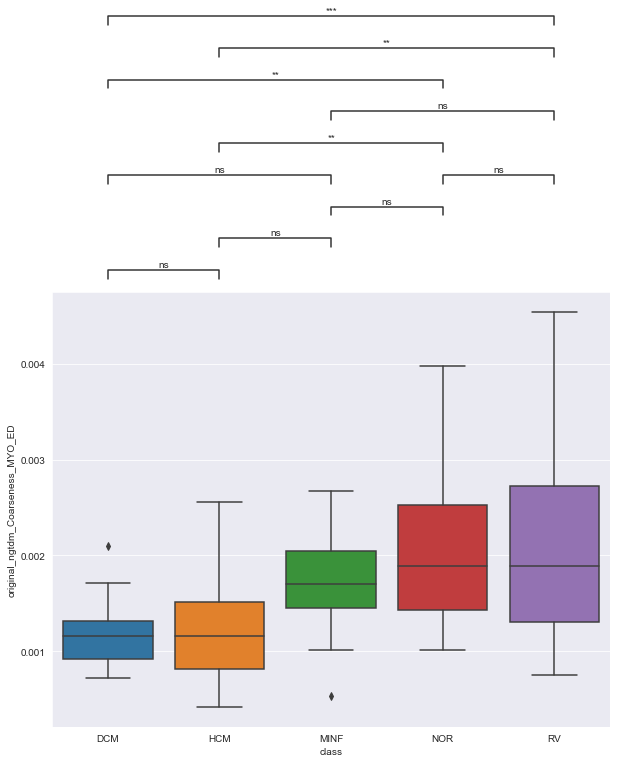

In [31]:
sns.set_style('darkgrid')
for i in features:
    print("----------  ", i, "--------- \n")
    mc = MultiComparison(df[i], df['class'])
    mc_results = mc.tukeyhsd()
    print(mc_results)
    pvalues = mc_results.pvalues.tolist()
    
    #Plot Creatjk 
    x = df['class']
    y = df[i]
    

    
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(data=df, x=x, y=y)

    ax, test_results = add_stat_annotation(ax, data=df, x=x, y=y, perform_stat_test=False,
                                       pvalues = pvalues,
                                   box_pairs=box_paris, text_format='star', loc='outside', verbose=0)
    plt.show()
    

---

#### Difference between DCM and MINF

In [32]:
cont=0
for i in features:
    #print("----------  ", i, "--------- \n")
    mc = MultiComparison(df[i], df['class'])
    mc_results = mc.tukeyhsd()
    hyp_HCM_MINF = mc_results.reject[1]
    

    if hyp_HCM_MINF == True:
        cont = cont+1
        print(i)

        
print(cont)
    

original_glszm_GrayLevelNonUniformity_LV_ED
original_shape_MeshVolume_RV_ED
original_shape_MinorAxisLength_RV_ED
original_shape_VoxelVolume_RV_ED
original_gldm_DependenceNonUniformity_RV_ED
original_glrlm_RunLengthNonUniformity_RV_ED
original_glszm_GrayLevelNonUniformity_RV_ED
original_glszm_SizeZoneNonUniformity_RV_ED
original_glrlm_RunLengthNonUniformity_MYO_ED
original_glszm_GrayLevelNonUniformity_MYO_ED
10


#### Difference between DCM and HCM

In [43]:
cont=0
for i in features:
    #print("----------  ", i, "--------- \n")
    mc = MultiComparison(df[i], df['class'])
    mc_results = mc.tukeyhsd()
    hyp_DCM_HCM = mc_results.reject[0]
    

    if hyp_DCM_HCM == True:
        cont = cont+1
        print(i)

        
print(cont)

original_shape_MajorAxisLength_RV_ED
original_shape_Maximum2DDiameterColumn_RV_ED
original_shape_Maximum2DDiameterRow_RV_ED
original_shape_Maximum2DDiameterSlice_RV_ED
original_shape_Maximum3DDiameter_RV_ED
original_shape_MeshVolume_RV_ED
original_shape_MinorAxisLength_RV_ED
original_shape_SurfaceArea_RV_ED
original_shape_SurfaceVolumeRatio_RV_ED
original_shape_VoxelVolume_RV_ED
original_shape_MajorAxisLength_MYO_ED
original_shape_MinorAxisLength_MYO_ED
original_shape_Sphericity_MYO_ED
original_shape_SurfaceVolumeRatio_MYO_ED
original_gldm_LargeDependenceHighGrayLevelEmphasis_MYO_ED
original_glrlm_RunEntropy_MYO_ED
16


16 features truly different from these diseases, the Random Forrest Model does not make mistakes between theses classes

#### Difference between NOR vs DCM and NORvsMINF

In [44]:
cont=0
cont_2 = 0
for i in features:
    #print("----------  ", i, "--------- \n")
    mc = MultiComparison(df[i], df['class'])
    mc_results = mc.tukeyhsd()
    hyp_NOR_DCM = mc_results.reject[2]
    hyp_NOR_MINF = mc_results.reject[-3]

    if hyp_NOR_DCM == True:
        cont = cont+1
        
    if hyp_NOR_MINF == True:
        cont_2 = cont_2+1
        

print("NORvsDCM: ", cont)
print("NORvsMINF: ", cont_2)

NORvsDCM:  22
NORvsMINF:  5


After the first approach of Multiclass Classification, we spot the models misclassifying samples between this classes, so this information can become handy.

* It is important to notice that it is very little training data

In [47]:
## create counters:
counter_list = []
for x in np.arange(10):
    string = 'cont'+ str(x)
    counter_list.append(string)

In [54]:
counter_list[0] = 0
counter_list[1] = 0
counter_list[2] = 0
counter_list[3] = 0
counter_list[4] = 0
counter_list[5] = 0
counter_list[6] = 0
counter_list[7] = 0
counter_list[8] = 0
counter_list[9] = 0

for i in features:
    #print("----------  ", i, "--------- \n")
    mc = MultiComparison(df[i], df['class'])
    mc_results = mc.tukeyhsd()
    hyp_DCM_HCM = mc_results.reject[0]
    hyp_DCM_MINF = mc_results.reject[1]
    hyp_NOR_DCM = mc_results.reject[2]
    hyp_DCM_RV = mc_results.reject[3]
    hyp_HCM_MINF = mc_results.reject[4]
    hyp_HCM_NOR = mc_results.reject[5]
    hyp_HCM_RV = mc_results.reject[6]
    hyp_MINF_NOR = mc_results.reject[7]
    hyp_MINF_RV = mc_results.reject[8]
    hyp_NOR_RV = mc_results.reject[9]
    

    if hyp_DCM_HCM == True:
        counter_list[0] +=1 
        
    if hyp_DCM_MINF == True:
        counter_list[1] +=1 
        
    if hyp_NOR_DCM == True:
        counter_list[2] +=1 
        
    if hyp_DCM_RV == True:
        counter_list[3] +=1 
        
    if hyp_HCM_MINF == True:
        counter_list[4] +=1 

    if hyp_HCM_NOR == True:
        counter_list[5] +=1 
        
    if hyp_HCM_RV == True:
        counter_list[6] +=1 
        
    if hyp_MINF_NOR == True:
        counter_list[7] +=1 
    
    if hyp_MINF_RV == True:
        counter_list[8] +=1 
        
    if hyp_NOR_RV == True:
        counter_list[9] +=1 

    

In [66]:
count= 0
for item,i in box_paris:
    print(item, " ", i, "--", counter_list[count])
    count +=1 

DCM   HCM -- 16
DCM   MINF -- 5
DCM   NOR -- 22
DCM   RV -- 31
HCM   MINF -- 8
HCM   NOR -- 6
HCM   RV -- 29
MINF   NOR -- 5
MINF   RV -- 23
NOR   RV -- 12
